### Import 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pickle
import plot_functions as pf
import importlib
import copy
import pandas as pd
import scipy.stats as spstat 
import scipy.optimize as sciopt
from scipy.interpolate import interp1d
from importlib import reload

# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='times')

## Load Results from Homogenization

In [2]:
results_box_in_a_box_2d = pickle.load(file=open('./../results/homogenization_box_in_a_box_2d.pcl', 'rb'))
results_diagonal_box_2d = pickle.load(file=open('./../results/homogenization_diagonal_box_in_box_2d.pcl', 'rb'))
results_four_boxes_in_a_box_2d = pickle.load(file=open('./../results/homogenization_four_boxes_in_a_box_2d.pcl', 'rb'))
results_crossing_channels_2d = pickle.load(file=open('./../results/homogenization_crossing_channels_2d.pcl', 'rb'))
results_straight_channel_2d = pickle.load(file=open('./../results/homogenization_straight_channel_2d.pcl', 'rb'))
results_diagonal_channels_2d = pickle.load(file=open('./../results/homogenization_diagonal_channels_2d.pcl', 'rb'))
results_vertical_filaments_2d = pickle.load(file=open('./../results/homogenization_vertical_filaments_2d.pcl', 'rb'))
results_circle_in_a_box_2d = pickle.load(file=open('./../results/homogenization_circle_in_a_box_2d.pcl', 'rb'))

results_perturbed_channel_2d = pickle.load(file=open('./../results/homogenization_perturbed_channel_2d.pcl', 'rb'))

results2d = (results_box_in_a_box_2d + results_diagonal_box_2d + results_four_boxes_in_a_box_2d 
            + results_crossing_channels_2d + results_straight_channel_2d + results_diagonal_channels_2d+
            results_vertical_filaments_2d + results_circle_in_a_box_2d)
results3d = pickle.load(open('./../results/homogenization_results_3d_diss.pcl', 'rb'))
results = results3d + results2d + results_perturbed_channel_2d

mesh_diagonal = {'box_in_a_box_2d': 'right',
    'four_boxes_in_a_box_2d': 'right',
    'crossing_channels_2d': 'right',
    'diagonal_box_in_box_2d': 'crossed',
    'straight_channel_2d': 'right',
    'diagonal_channels_2d': 'crossed',
    'perturbed_channel_2d': 'right',
    'vertical_filaments_2d': 'right',
    'circle_in_a_box_2d': 'crossed',
    'box_in_a_box_3d': '3d',
    'extended_box_3d': '3d',
    'crossing_filaments_3d': '3d',
    'actin_cytosceleton_3d': '3d',
}

In [3]:
print(results_box_in_a_box_2d[-1])
len(results_perturbed_channel_2d)

['box_in_a_box_2d', 100.0, 1.0, 252, 252, 0, array([[ 5.22764090e-01, -4.20784237e-17],
       [-2.62100027e-17,  5.22764090e-01]]), array([[6.76693851e+00, 5.41468150e-04],
       [5.41468150e-04, 6.76693851e+00]]), array([[5.82519042e-02, 5.46937526e-06],
       [5.46937526e-06, 5.82519042e-02]]), 0.10802469135802469, 252.0, 238.0, '2019-08-16T20:44:50.846440', 'pourosity_vs_correction_tensors']


960

In [4]:
# count number of results
# should be 234 for 3D geometries
# and 714 for 2D geometries
geometries2D = ['box_in_a_box_2d', 'four_boxes_in_a_box_2d', 'crossing_channels_2d', 'diagonal_box_in_box_2d',
              'straight_channel_2d', 'diagonal_channels_2d',
              'perturbed_channel_2d',
              'vertical_filaments_2d', 'circle_in_a_box_2d']

geometries3D = ['box_in_a_box_3d',  'extended_box_3d', 'crossing_filaments_3d', 'actin_cytosceleton_3d']
geometries = geometries2D + geometries3D
total_geoms = 0
total_tensor_entries = 0
for gm in geometries:
    i = 0
    for r in results:
        if gm == r[0]:
            i += 1
    total_geoms += i
    
    if gm in geometries2D:
        total_tensor_entries += (3*4*i)
    elif gm in geometries3D:
        total_tensor_entries += (3*9*i)
    else: 
        raise Exception()
    
    print(gm , i)
print('total geoms: ', total_geoms)
print('total tensor entries: ', total_tensor_entries)

box_in_a_box_2d 714
four_boxes_in_a_box_2d 408
crossing_channels_2d 714
diagonal_box_in_box_2d 714
straight_channel_2d 612
diagonal_channels_2d 714
perturbed_channel_2d 960
vertical_filaments_2d 408
circle_in_a_box_2d 714
box_in_a_box_3d 234
extended_box_3d 234
crossing_filaments_3d 234
actin_cytosceleton_3d 234
total geoms:  6894
total tensor entries:  96768


## Results Dataframe
Create a pandas dataframe and collect all results that were loaded above in this datafram

In [5]:
raise Exception('dataframe already computed')

# id, dim, eps_l, eps_s, res_x, res_y, res_z, 
# porosity, domain_size, solid_scale, date, experiment
# d11, d12, d13, d21, d22, d23, d31, d32, d33
# e11, e12, e13, e21, e22, e23, e31, e32, e33
# m11, m12, m13, m21, m22, m23, m31, m32, m33

#results_list = [gm, geom.eps_l, geom.eps_s, geom.res, geom.res_y, ## 0-5
# geom.res_z, diffusion_tensor, permittivity_tensor, ## 6 -8
# pourosity, geom.domain_size, geom.solid_scale, date, experiment]  ## 9-13

#D = r[6][(0,0)]
#P = r[7][(0,0)]
#M = r[8][(0,0)]

keys = ['id', 'dim', 'eps_l', 'eps_s', 'res_x', 'res_y', 'res_z', 
    'porosity', 'domain_size_x', 'domain_size_y', 'solid_scale', 'date', 'experiment',
    'd11', 'd12', 'd13', 'd21', 'd22', 'd23', 'd31', 'd32', 'd33',     
    'e11', 'e12', 'e13', 'e21', 'e22', 'e23', 'e31', 'e32', 'e33',
    'm11', 'm12', 'm13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33']

results_df = pd.DataFrame(columns=keys)

for r in results_perturbed_channel_2d:
    row_data = [r[0], 2, r[1], r[2], r[3], r[4], r[5],
               r[9], r[10][0], r[10][1], r[10][0], r[12], r[13],  # set solid scale to domain_size_x (constant -> arbitrary)
               r[6][(0,0)], r[6][(0,1)], np.nan, r[6][(1,0)], 
               r[6][(1,1)], np.nan, np.nan,np.nan,np.nan,   
               r[7][(0,0)], r[7][(0,1)], np.nan, r[7][(1,0)], 
               r[7][(1,1)], np.nan, np.nan,np.nan,np.nan,   
               r[8][(0,0)], r[8][(0,1)], np.nan, r[8][(1,0)], 
               r[8][(1,1)], np.nan, np.nan,np.nan,np.nan ,  
               ]
    
    tmp_df = pd.DataFrame([row_data], columns=keys)
    results_df = pd.concat([results_df, tmp_df])

for r in results2d:
    row_data = [r[0], 2, r[1], r[2], r[3], r[4], r[5],
               r[9], r[10], r[10], r[11], r[12], r[13],
               r[6][(0,0)], r[6][(0,1)], np.nan, r[6][(1,0)], 
               r[6][(1,1)], np.nan, np.nan,np.nan,np.nan,   
               r[7][(0,0)], r[7][(0,1)], np.nan, r[7][(1,0)], 
               r[7][(1,1)], np.nan, np.nan,np.nan,np.nan,   
               r[8][(0,0)], r[8][(0,1)], np.nan, r[8][(1,0)], 
               r[8][(1,1)], np.nan, np.nan,np.nan,np.nan ,  
               ]       
    tmp_df = pd.DataFrame([row_data], columns=keys)
    #results_df.append(tmp_df)
    results_df = pd.concat([results_df, tmp_df])
    
for r in results3d:
    row_data = [r[0], 3, r[1], r[2], r[3], r[4], r[5],
               r[9], r[10], r[10], r[11], r[12], r[13],
               r[6][(0,0)], r[6][(0,1)], r[6][(0,2)], r[6][(1,0)], 
               r[6][(1,1)], r[6][(1,2)], r[6][(2,0)], r[6][(2,1)], r[6][(2,2)],      
               r[7][(0,0)], r[7][(0,1)], r[7][(0,2)], r[7][(1,0)], 
               r[7][(1,1)], r[7][(1,2)], r[7][(2,0)], r[7][(2,1)], r[7][(2,2)],   
               r[8][(0,0)], r[8][(0,1)], r[8][(0,2)], r[8][(1,0)], 
               r[8][(1,1)], r[8][(1,2)], r[8][(2,0)], r[8][(2,1)], r[8][(2,2)],
               ]
    
    tmp_df = pd.DataFrame([row_data], columns=keys)
    results_df = pd.concat([results_df, tmp_df])
    


print(results_df)
pickle.dump(results_df, open('./../results/results_df.pcl', 'wb'))

Exception: dataframe already computed

## Load the results dataframe
If it is already computed and saved on disk, just load the dataframe instead of computing it again

In [6]:
results_df = pickle.load(open('./../results/results_df.pcl', 'rb'))
results_df.reset_index(drop=True)
print(np.unique(results_df.loc[:, ['id']].values))
print(np.unique(results_df.loc[:, ['experiment']].values))
print()

#results_df.loc[results_df['experiment']=='verify_method',]
np.unique(results_df.loc[results_df['id']=='perturbed_channel_2d',['experiment']].values)

['actin_cytosceleton_3d' 'box_in_a_box_2d' 'box_in_a_box_3d'
 'circle_in_a_box_2d' 'crossing_channels_2d' 'crossing_filaments_3d'
 'diagonal_box_in_box_2d' 'diagonal_channels_2d' 'extended_box_3d'
 'four_boxes_in_a_box_2d' 'perturbed_channel_2d' 'straight_channel_2d'
 'vertical_filaments_2d']
['pourosity_vs_correction_tensors' 'verify_method']



array(['verify_method'], dtype=object)

## Regression data - Dataframe
To visualize the results perform a linear regression on the results stored in the "results-data frame". 
For the linear regression regress the tensor values on against the number of finite elements/volumes used by the solver in a log log plot.
Save the reslts from the regression in a new dateframe:

keys = ['id', 'dim', 'eps_l', 'eps_s', 'experiment', 'tensor_comp', 'scale_ratio',
        'offset', 'r', 'p', 'slope', 'intercept', 'stderr', 'porosity']

In [7]:
def regress(x, y):

    def r_value(x0):
        lr = spstat.linregress(np.log10(x), np.log10(np.abs(np.array(y)-x0)))
        return lr.rvalue
    ropt = sciopt.minimize_scalar(r_value, method='bounded', bounds=[0.0,2*np.max(y) ] )
    y_opt = ropt.x
    lr = spstat.linregress(np.log10(x), np.log10(np.abs(y_opt-np.array(y))))
        
    
    r_value = lr.rvalue
    p_value = lr.pvalue
    slope = lr.slope
    intercept = lr.intercept
    stderr = lr.stderr
    #int_stderr = lr.intercept_stderr
    # print(r_value, p_value, slope, intercept, stderr)
    return y_opt, r_value, p_value, slope, intercept, stderr
    
    """
    >>> # Two-sided inverse Students t-distribution
    >>> # p - probability, df - degrees of freedom
    >>> from scipy.stats import t
    >>> tinv = lambda p, df: abs(t.ppf(p/2, df))

    >>>

    >>> ts = tinv(0.05, len(x)-2)
    >>> print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
    slope (95%): 1.944864 +/- 0.950885
    >>> print(f"intercept (95%): {res.intercept:.6f}"
    ...       f" +/- {ts*res.intercept_stderr:.6f}")
    intercept (95%): 0.268578 +/- 0.488822
    """

def get_regression_vals(gid, eps_l, experiment, sr, tensor_id, eps_s=1.):
    indexer = np.all(
        (results_df['id']==gid, 
        results_df['eps_l']==eps_l, # results_df['eps_s']==eps_s,
        results_df['experiment']==experiment, results_df['eps_s']==eps_s, 
        results_df['solid_scale'] / results_df['domain_size_x'] == sr
                     ), 
                     axis=0) 

    dim = np.unique(results_df.loc[indexer, ['dim']].values)[0]
    resx_vals = results_df.loc[indexer, ['res_x']].values
    resy_vals = results_df.loc[indexer, ['res_y']].values
    resz_vals = results_df.loc[indexer, ['res_z']].values


    if dim == 3:          
        num_cells = resx_vals * resy_vals * resz_vals * 6.  #*pourosity                   
    elif dim == 2:     
        if mesh_diagonal[gid] == 'crossed':
            num_cells = resx_vals * resy_vals * 4.
        if mesh_diagonal[gid] == 'right':
            num_cells = resx_vals * resy_vals * 2.

    tensor_vals = results_df.loc[indexer, [tensor_id]].values

    # check porosities
    porosities = results_df.loc[indexer, ['porosity']].values

    if np.any(np.abs(porosities - porosities[0]) > 1.e-1):
        print((np.unique(porosities)))
        raise Exception('different porosities')
    
    num_cells = np.array(np.transpose(num_cells)[0], dtype=np.float)
    tensor_vals = np.array(np.transpose(tensor_vals)[0], dtype=np.float)
    
    return num_cells, tensor_vals, np.mean(porosities)

In [8]:
indexer = np.all(
        (results_df['id']=='box_in_a_box_2d', 
        results_df['experiment']=='pourosity_vs_correction_tensors',), 
        axis=0) 
np.unique(results_df.loc[indexer, ['eps_l', 'eps_s']].values, axis=0)

array([[1.e-02, 1.e+00],
       [1.e-01, 1.e+00],
       [5.e-01, 1.e+00],
       [2.e+00, 1.e+00],
       [1.e+01, 1.e+00],
       [1.e+02, 1.e+00]])

In [9]:
indexer = np.all(
        (results_df['id']=='perturbed_channel_2d', 
        results_df['experiment']=='verify_method',), 
        axis=0) 
eps_l_eps_s_list=np.unique(results_df.loc[indexer, ['eps_l', 'eps_s']].values, axis=0)
for eps_l, eps_s in eps_l_eps_s_list:
    print(eps_l, eps_s)


1.0 1.0
1.0 2.0
1.0 4.0
1.0 8.0
1.0 16.0
1.0 32.0
1.0 64.0
1.0 128.0
2.0 1.0
2.0 2.0
2.0 4.0
2.0 8.0
2.0 16.0
2.0 32.0
2.0 64.0
2.0 128.0
4.0 1.0
4.0 2.0
4.0 4.0
4.0 8.0
4.0 16.0
4.0 32.0
4.0 64.0
4.0 128.0
8.0 1.0
8.0 2.0
8.0 4.0
8.0 8.0
8.0 16.0
8.0 32.0
8.0 64.0
8.0 128.0
16.0 1.0
16.0 2.0
16.0 4.0
16.0 8.0
16.0 16.0
16.0 32.0
16.0 64.0
16.0 128.0
32.0 1.0
32.0 2.0
32.0 4.0
32.0 8.0
32.0 16.0
32.0 32.0
32.0 64.0
32.0 128.0
64.0 1.0
64.0 2.0
64.0 4.0
64.0 8.0
64.0 16.0
64.0 32.0
64.0 64.0
64.0 128.0
128.0 1.0
128.0 2.0
128.0 4.0
128.0 8.0
128.0 16.0
128.0 32.0
128.0 64.0
128.0 128.0


In [10]:

raise Exception('dataframe already computed')
keys = ['id', 'dim', 'eps_l', 'eps_s', 'experiment', 'tensor_comp', 'scale_ratio',
        'offset', 'r', 'p', 'slope', 'intercept', 'stderr', 'porosity']

regression_df = pd.DataFrame(columns=keys)
    
r_list = []
    
for gid in geometries:
    
    # indices of tensor components depending of dimension of geometry
    if gid in geometries2D:
        temp_comp_list = ['11', '12', '21', '22']
        dim = 2
    elif gid in geometries3D:
        temp_comp_list = ['11', '12', '13', '21', '22', '23', '31', '32', '33']
        dim = 3
    else:
        raise Exception('unknow geometry')
     
    # experiment/simulation name
    if gid == 'perturbed_channel_2d':
        experiment = 'verify_method'
    else: 
        experiment = 'pourosity_vs_correction_tensors'  # is the case for all results except 'perturbed_channel_2d'
                                                        # for perturbed channels use 'verify_experiment' or dont use at all
    
    # first find all scale-ratios for geometry
    if gid == 'perturbed_channel_2d':
        scale_ratios = [1.]
    else:
        indexer = np.all(( 
                           results_df['experiment']==experiment, results_df['id']==gid, 
                         ), axis=0) 
        ds = results_df.loc[indexer, ['domain_size_x']].values
        ss = results_df.loc[indexer, ['solid_scale']].values
        scale_ratios = np.unique(ss/ds)   # ratio between scale factor for solid domain and domain size
    
    # find all combinations of eps_l and eps_s
    tmp_indexer = np.all(
        (results_df['id']==gid, 
        results_df['experiment']==experiment), 
        axis=0) 
    eps_l_eps_s_list = np.unique(results_df.loc[tmp_indexer, ['eps_l', 'eps_s']].values, axis=0)
    
    for ten in ['d', 'm', 'e']:
        for ten_comp in temp_comp_list:
            tensor_id = ten + ten_comp
            
            for eps_l, eps_s in eps_l_eps_s_list:

                for sr in scale_ratios:
                    
                    print('geo','tensor_id', 'eps_l', 'eps_s', 'sr')
                    print(gid, tensor_id, eps_l, eps_s, sr)

                    n_cells, ten_vals, por = get_regression_vals(gid=gid, eps_l=eps_l, experiment=experiment, 
                                                            sr=sr, tensor_id=tensor_id, eps_s=eps_s)

                    #print(type(n_cells), ten_vals)
                    
                    # some entries of tensors are zero anyway -> no regression needed
                    # some tensor values are constant
                    if np.mean(ten_vals) < 1.e-2:
                        y_opt, r_value, p_value, slope, intercept, stderr = 0., np.nan, np.nan, np.nan, np.nan, np.nan,
                    elif np.std(ten_vals) < 1.e-4:
                        y_opt, r_value, p_value, slope, intercept, stderr = np.mean(ten_vals), np.nan, np.nan, np.nan, np.nan, np.nan,
                    else: 
                        y_opt, r_value, p_value, slope, intercept, stderr = regress(n_cells, ten_vals)
            

                
                    row_data = [gid, dim, eps_l, eps_s, experiment, ten + ten_comp, sr,
                                y_opt, r_value, p_value, slope, intercept, stderr, por
                   ]

                    tmp_df = pd.DataFrame([row_data], columns=keys)
                    regression_df = pd.concat([regression_df, tmp_df])

pickle.dump(regression_df, open('./../results/regression_df.pcl', 'wb'))

Exception: dataframe already computed

## Load Regression df

In [11]:
regression_df= pickle.load(open('./../results/regression_df.pcl', 'rb'))
regression_df=regression_df.reset_index(drop=True)

In [12]:
#regression_df.loc[regression_df['id']=='perturbed_channel_2d']
regression_df.shape

(17688, 14)

## Plotdata Dataframe
Reduce the Regression results dataframe to all relevant results that are shown in figures

In [13]:
# set of shown data

shown_data = {'box_in_a_box_2d': ['11'], 
 'four_boxes_in_a_box_2d': ['11'], 
 'crossing_channels_2d': ['11'], 
 'diagonal_box_in_box_2d': ['11'],
 'straight_channel_2d': ['11','22'], 
 'diagonal_channels_2d': ['11','12'],
 'perturbed_channel_2d': ['11'],
 'vertical_filaments_2d': ['11', '22'],
 'circle_in_a_box_2d': ['11'],
 # 'box_in_a_box_3d': [], 
 'extended_box_3d': ['11', '33'], 
 'crossing_filaments_3d': ['11'], 
 'actin_cytosceleton_3d': ['11'],
}


keys = ['id', 'dim', 'eps_l', 'eps_s', 'experiment', 'tensor_comp', 'scale_ratio',
        'offset', 'r', 'p', 'slope', 'intercept', 'stderr', 'porosity']
shown_data_df= pd.DataFrame(columns=keys)

for id_n in shown_data:
    for q in ['d', 'e', 'm']:
        for comp in shown_data[id_n]:

            
            indexer = np.all((regression_df['id'] == id_n,
                             regression_df['tensor_comp'] == q+comp,),axis=0)
            
            shown_data_df = pd.concat([regression_df.loc[indexer], shown_data_df]) 

In [14]:
shown_data_df.shape

(4350, 14)

## Statistical analysis of regression fits

r^2:  0.9968397587355213  +/-  0.0167256713706554
p:  8.077106552247417e-05  +/-  0.0011615556206026618
|m2d|:  0.5013959366939937  +/-  0.08725206162339133
|m3d|:  0.2838906325671872  +/-  0.08588813186131211
0.9968397587355213


findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


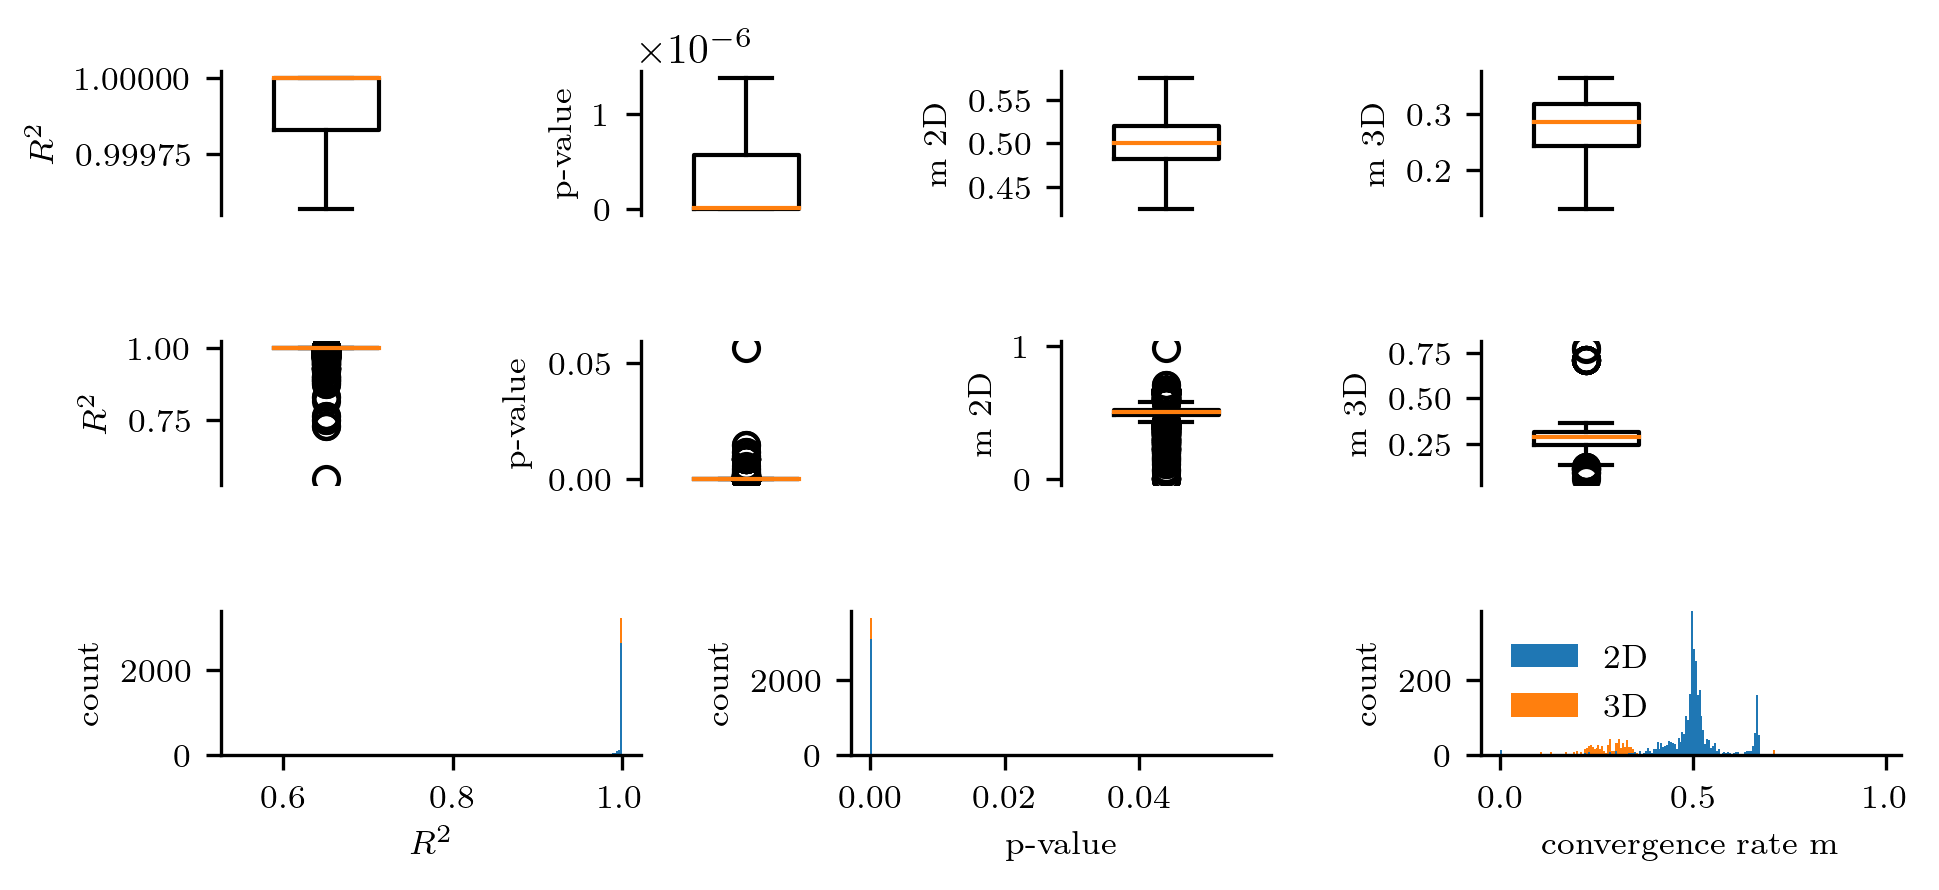

                          id         r
9766      circle_in_a_box_2d -0.740884
9767      circle_in_a_box_2d -0.874861
9768      circle_in_a_box_2d -0.853689
9769      circle_in_a_box_2d -0.867271
9771      circle_in_a_box_2d -0.935062
...                      ...       ...
3704  diagonal_box_in_box_2d -0.994468
3721  diagonal_box_in_box_2d -0.994468
3738  diagonal_box_in_box_2d -0.994468
3755  diagonal_box_in_box_2d -0.994468
3772  diagonal_box_in_box_2d -0.994468

[248 rows x 2 columns]
size of df:  (4350, 14)


<ipython-input-15-aa2b7f895b04>:99: RuntimeWarning: invalid value encountered in less
  print( shown_data_df.loc[ np.square(shown_data_df['r'].values) < 0.99 ,['id', 'r'] ])


In [15]:
r_vals2d = shown_data_df.loc[shown_data_df['dim']==2,['r']].values 
r_vals3d = shown_data_df.loc[shown_data_df['dim']==3,['r']].values 
r_vals = np.concatenate((r_vals2d, r_vals3d))
m_vals2d = shown_data_df.loc[shown_data_df['dim']==2,['slope']].values 
m_vals3d = shown_data_df.loc[shown_data_df['dim']==3,['slope']].values 
m_vals = np.concatenate((m_vals2d, m_vals3d))
p_vals2d = shown_data_df.loc[shown_data_df['dim']==2,['p']].values 
p_vals3d = shown_data_df.loc[shown_data_df['dim']==3,['p']].values 
p_vals = np.concatenate((p_vals2d, p_vals3d))

shown_data_df.loc[np.square(shown_data_df['r']) < 0.90,['id', 'r'] ]
print('r^2: ', np.nanmean(np.square(r_vals)), ' +/- ',np.nanstd(np.square(r_vals), ddof=1) )
print('p: ', np.nanmean((p_vals)), ' +/- ',np.nanstd((p_vals), ddof=1) )
print('|m2d|: ', np.nanmean(np.abs(m_vals2d)), ' +/- ',np.nanstd(np.abs(m_vals2d), ddof=1) )
print('|m3d|: ', np.nanmean(np.abs(m_vals3d)), ' +/- ',np.nanstd(np.abs(m_vals3d), ddof=1) )
print(np.nanmean(np.square(r_vals)) )

def regression_r_vals(fig, pos, r_vals, r_vals2d, r_vals3d):
    ax = fig.add_axes(pos)
    r2d = np.square(r_vals2d).flatten()
    r3d = np.square(r_vals3d).flatten()
    
    ax.hist((r2d, r3d), bins=200, histtype='bar', stacked=True,)
    
    ax.set_xlabel('$R^2$', fontsize=8)
    ax.set_ylabel('count', fontsize=8)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelsize=8)
    
def regression_m_vals(fig, pos, m_vals, m_vals2d, m_vals3d):
    ax = fig.add_axes(pos)
    
    ax.hist((np.abs(m_vals2d).flatten(), np.abs(m_vals3d).flatten()), bins=200, histtype='bar', stacked=True, label=['2D', '3D'])
    
    ax.set_xlabel('convergence rate m', fontsize=8)
    ax.set_ylabel('count', fontsize=8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.legend(fontsize=8, frameon=False)
    ax.tick_params(labelsize=8)

def regression_p_vals(fig, pos, p_vals, p_vals2d, p_vals3d):
    ax = fig.add_axes(pos)
    
    ax.hist((p_vals2d.flatten(), p_vals3d.flatten()), bins=200, histtype='bar', stacked=True,)
    ax.set_xlabel('p-value', fontsize=8)
    ax.set_ylabel('count', fontsize=8)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelsize=8)

    
def regression_stats(fig, pos, vals, ylabel='', outlier=True):
    ax = fig.add_axes(pos)
    x = np.transpose(vals)[0]
    x = x[~(np.isnan(x))]
    ax.boxplot(x, showfliers=outlier)
    
    ax.set_xlim(0.85, 1.15)
    
    ax.set_xticks([])
    
    ax.spines['bottom'].set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_ylabel(ylabel, fontsize=8)
    ax.tick_params(labelsize=8)
    
    
fig = plt.figure(dpi=300, figsize=(7,3), facecolor='white')
my = 0.07
wy = 0.3 - 2.*my
regression_r_vals(fig, [0.1, my + 0.08, 0.2, wy], r_vals, r_vals2d, r_vals3d)
regression_p_vals(fig, [0.4, my + 0.08, 0.2, wy], p_vals, p_vals2d, p_vals3d)
regression_m_vals(fig, [0.7, my + 0.08, 0.2, wy], m_vals, m_vals2d, m_vals3d)

regression_stats(fig, [0.1, 0.08 + 3*my + wy, 0.1, wy], np.square(r_vals), ylabel='$R^2$')
regression_stats(fig, [0.3, 0.08 + 3*my + wy, 0.1, wy], p_vals, ylabel='p-value')
regression_stats(fig, [0.5, 0.08 + 3*my + wy, 0.1, wy], np.abs(m_vals2d), ylabel='m 2D')
regression_stats(fig, [0.7, 0.08 + 3*my + wy, 0.1, wy], np.abs(m_vals3d), ylabel='m 3D')

regression_stats(fig, [0.1, 0.08 + 5*my + 2* wy, 0.1, wy], np.square(r_vals), outlier=False, ylabel='$R^2$')
regression_stats(fig, [0.3, 0.08 + 5*my + 2* wy, 0.1, wy], p_vals, outlier=False, ylabel='p-value')
regression_stats(fig, [0.5, 0.08 + 5*my + 2* wy, 0.1, wy], np.abs(m_vals2d), outlier=False, ylabel='m 2D')
regression_stats(fig, [0.7, 0.08 + 5*my + 2* wy, 0.1, wy], np.abs(m_vals3d), outlier=False, ylabel='m 3D')

plt.savefig('./../results/Figure6.tif')
plt.show()



#print(shown_data_df.loc[shown_data_df['p'] > 0.05,['id', 'p'] ])
print( shown_data_df.loc[ np.square(shown_data_df['r'].values) < 0.99 ,['id', 'r'] ])
#print(shown_data_df.loc[shown_data_df['m'] > 0.05,['id', 'p'] ])

print('size of df: ',shown_data_df.shape)

id                          circle_in_a_box_2d
dim                                          2
eps_l                                      0.1
eps_s                                        1
experiment     pourosity_vs_correction_tensors
tensor_comp                                m11
scale_ratio                           0.166667
offset                                0.982891
r                                    -0.740884
p                                    0.0567648
slope                                -0.411337
intercept                             -1.98037
stderr                                0.166761
porosity                              0.917474
Name: 9766, dtype: object
[  5184.  20736.  46656.  82944. 129600. 186624. 254016.] [0.98307673 0.98328044 0.9830121  0.98303823 0.98293396 0.98297837
 0.98294277]


<Figure size 1000x1000 with 0 Axes>

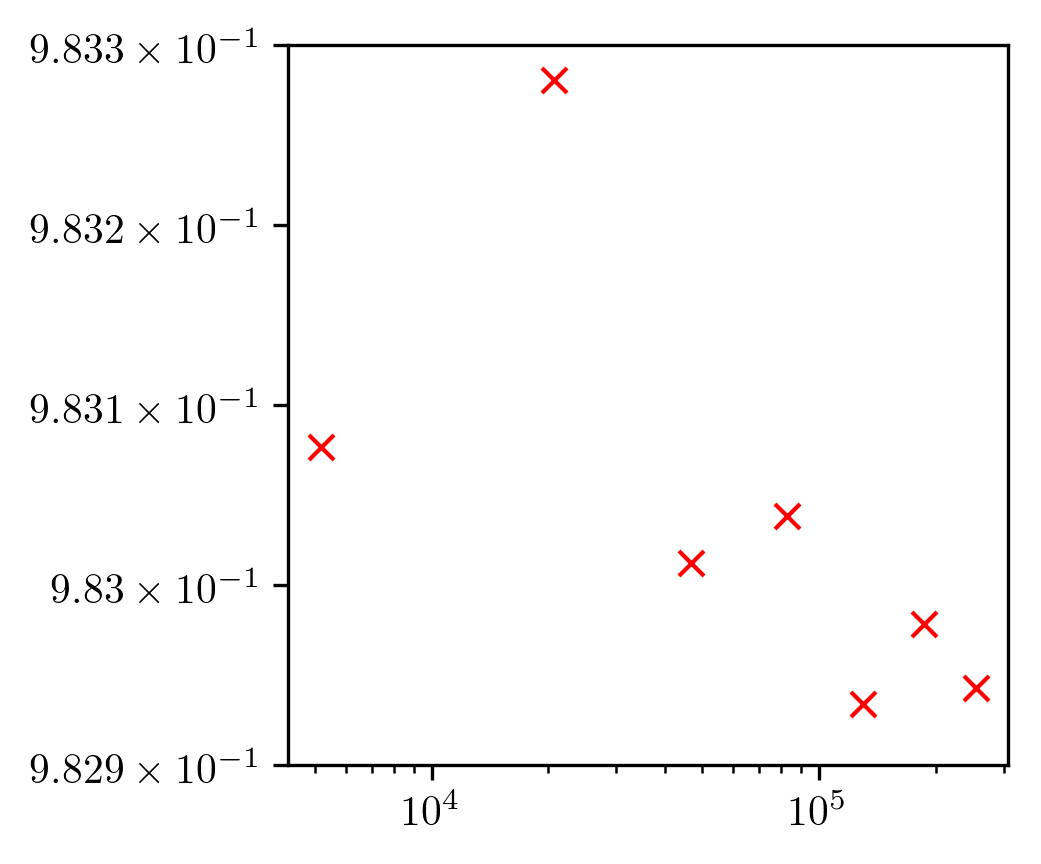

In [109]:
fig_tmp = plt.figure(figsize=(5,5), dpi=200)
pos = [0.1,0.1,0.8, 0.8]

index = 9766
print(shown_data_df.loc[index])
gid= shown_data_df.loc[index, 'id']
eps_l = shown_data_df.loc[index, 'eps_l']
experiment = shown_data_df.loc[index, 'experiment']
sr = shown_data_df.loc[index, 'scale_ratio']
tensor_id = shown_data_df.loc[index, 'tensor_comp']

n_cells, ten_vals, por = get_regression_vals(gid=gid, eps_l=eps_l, experiment=experiment, sr=sr, tensor_id=tensor_id)
print(n_cells, ten_vals)

fig = plt.figure(dpi=300, figsize=(3,3))
ax = fig.add_axes([0.1,0.1, 0.8, 0.8])

ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(n_cells, ten_vals, 'rx')
ax.set_yticks([0.9829, 0.9830, 0.9831,0.9832,0.9833])

plt.show()

#pf.plot_correction_tensor_regression_line(fig_tmp, pos, n_cells[1:], ten_vals[1:],
#                                                              title='Mobility', eps_l=0.1)

# Figure 3 (#3)

figure size [inch]:  5.7 6.08


<ipython-input-16-022277eb17d2>:109: RuntimeWarning: divide by zero encountered in double_scalars
  y = (e11_tmp[0][0] - eps_s) / (eps_l - eps_s)
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


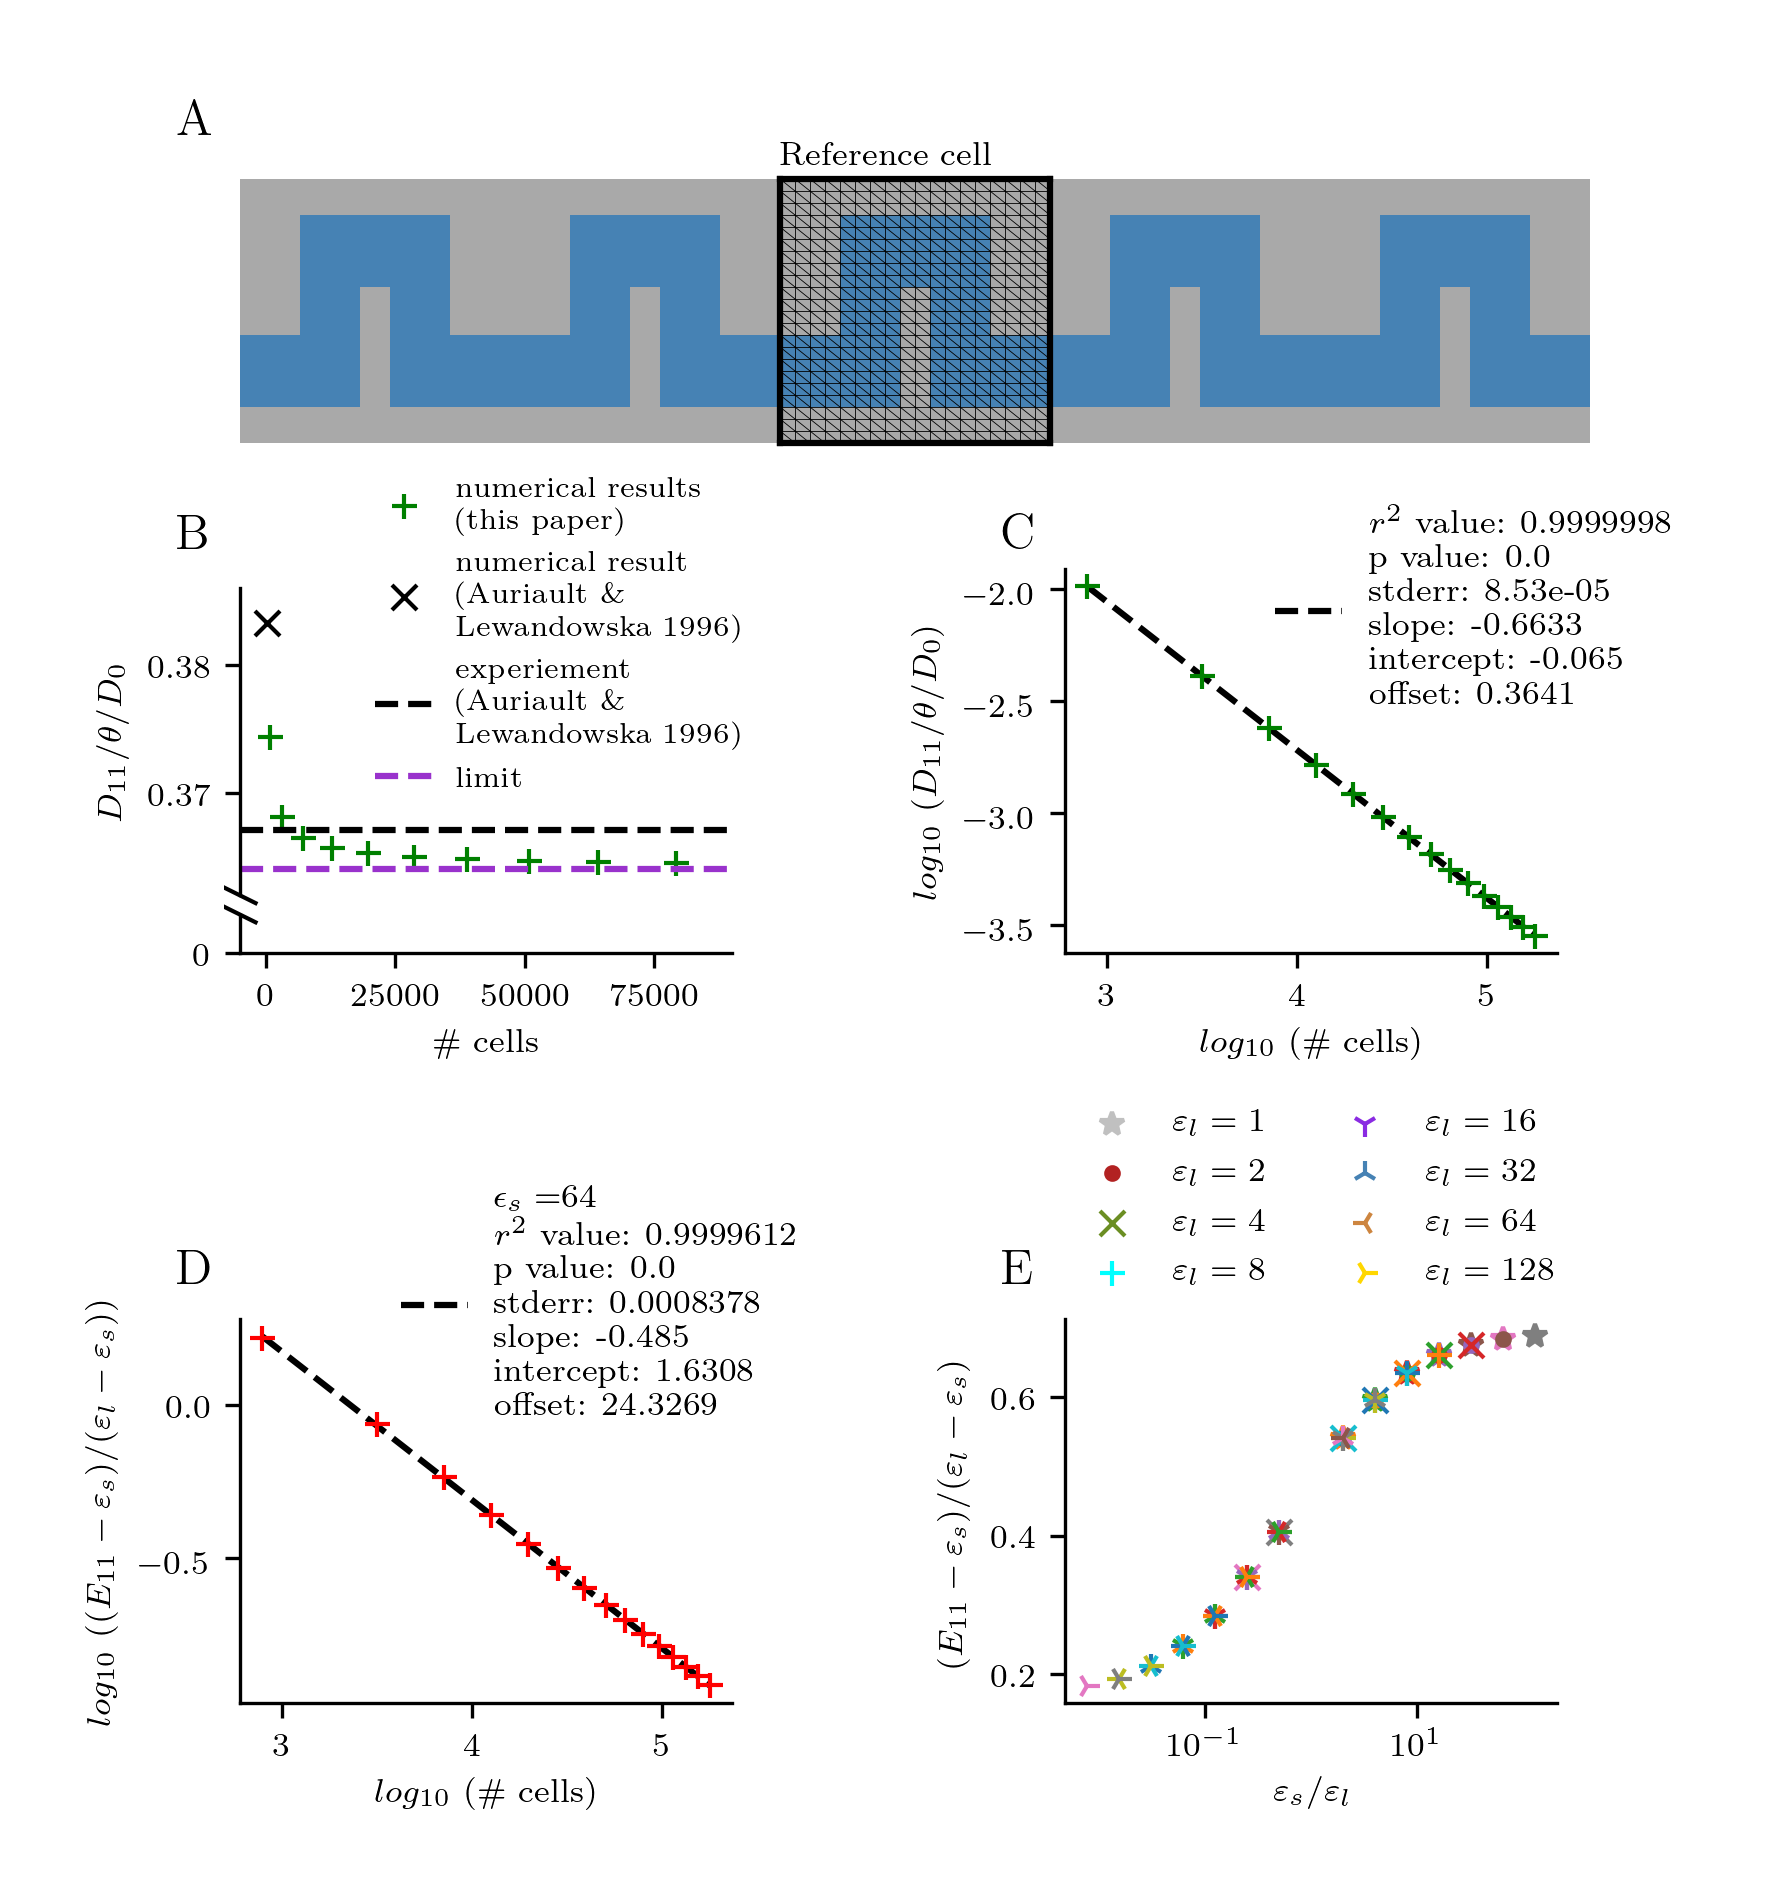

In [16]:
importlib.reload(pf)
gm = 'perturbed channel'

# margin and whitespace in inch
margin_left = .7
margin_right = 0.5
margin_top = 0.5
margin_bottom = 0.5
margin_l12 = 0.5
margin_l23 = 1.3
margin_c = 1.

# relative size of figures in a.u.
scale = .1
line1_height = 8.8 * scale
line1_width1 = 9.0 * scale 
line1_width = line1_width1 * 5

line2_height = 12 * scale
line2_width1 = (line1_width - margin_c) / 2.
line2_width2 = line2_width1

 
line3_height = line2_height
line3_width1 = line2_width1
line3_width2 = line2_width1


fig_height = line1_height + line2_height + line3_height  + margin_bottom + margin_l12 + margin_l23 + margin_top
fig_width = line1_width + margin_left + margin_right

print('figure size [inch]: ', fig_width, fig_height)
fig_supp1 = plt.figure(figsize=(fig_width, fig_height), dpi=300, facecolor='white')

##################################
# first line
pos1 = [margin_left / fig_width , 1 - (margin_top + line1_height) / fig_height, 
        line1_width1 / fig_width, line1_height / fig_height]
for i in range(5):
    postmp = copy.copy(pos1)
    postmp[0] = postmp[0] + i * line1_width1 / fig_width
    if i == 2:
        make_mesh = True
    else: make_mesh = False
    pf.plot_perturbed_channel_reference_cell(fig_supp1, postmp, make_title=False, mesh=make_mesh)
    

###########################################
# second line

# plot data for d11 component
tmp = get_regression_vals(gid='perturbed_channel_2d', eps_l=4., experiment='verify_method',
                          sr=1., tensor_id='d11', eps_s=64)

pos21 = [margin_left / fig_width , (margin_bottom + line3_height + margin_l23) / fig_height, 
        line2_width1 / fig_height, line2_height / fig_width]
#pf.plot_single_correction_tensor_vs_number_of_cells(fig_supp1, pos21, tmp['d'][0], tmp['d'][1], options=['compare_auriault'])
pf.plot_supp1b(fig_supp1, pos21, tmp[0], tmp[1])

pos22 = [(margin_left + line2_width2 + margin_c) / fig_width , (margin_bottom + line3_height + margin_l23) / fig_height, 
        line2_width2 / fig_height, line2_height / fig_width]

lim_d = pf.plot_correction_tensor_regression_line(fig_supp1, pos22, tmp[0], tmp[1], 
                                                title='Diffusion', eps_l=4, eps_s=64,
                                                  legend_loc=(0.4, 0.6), col='green')

############################
# line 3

# plot data for d11 component
tmp = get_regression_vals(gid='perturbed_channel_2d', eps_l=4., experiment='verify_method',
                          sr=1., tensor_id='e11', eps_s=64)

pos31 = [margin_left / fig_width , margin_bottom / fig_height, 
        line3_width1 / fig_height, line3_height / fig_width]

lim_p = pf.plot_correction_tensor_regression_line(fig_supp1, pos31, tmp[0], tmp[1], 
                                                title='Permittivity', eps_l=4, eps_s=64,
                                                  legend_loc=(0.3, 0.7))


pos32 = [(margin_left + line3_width2 + margin_c) / fig_width , margin_bottom / fig_height, 
        line3_width2 / fig_height, line3_height / fig_width]


markers = {1: "*", 2: ".", 4: "x", 8: "+", 16: "1", 32: "2", 64: "3", 128: "4"}
marker_colors = {1: "silver", 2: "firebrick", 4: "olivedrab", 8: "cyan", 16: "blueviolet", 
                 32: "steelblue", 64: "peru", 128: "gold"}

ax31 = fig_supp1.add_axes(pos32)

indexer = np.all(
        (shown_data_df['id']=='perturbed_channel_2d', 
        shown_data_df['experiment']=='verify_method',), 
        axis=0) 
eps_l_eps_s_list=np.unique(shown_data_df.loc[indexer, ['eps_l', 'eps_s']].values, axis=0)
for eps_l, eps_s in eps_l_eps_s_list:
    tmp_indexer = np.all(
        (shown_data_df['id']=='perturbed_channel_2d', 
        shown_data_df['experiment']=='verify_method',
        shown_data_df['eps_l']==eps_l,
        shown_data_df['eps_s']==eps_s,
        shown_data_df['tensor_comp']=='e11'
        ), 
        axis=0) 
    e11_tmp = shown_data_df.loc[tmp_indexer, ['offset']].values
    if np.size(e11_tmp)==1:
        x = eps_s / eps_l
        y = (e11_tmp[0][0] - eps_s) / (eps_l - eps_s)
        # print(e11_tmp[0][0], eps_l, eps_s)
    else:
        print(shown_data_df.loc[tmp_indexer])
        raise Exception('more than one value')

    ax31.plot(x,y, markers[eps_l])


    
ax31.set_xscale('log')
ax31.spines['top'].set_visible(False)
ax31.spines['right'].set_visible(False)
ax31.set_xlabel(r'$\varepsilon_s / \varepsilon_l$', fontsize=8)
ax31.set_ylabel(r'$(E_{11}-\varepsilon_s) /( \varepsilon_l-\varepsilon_s)$', fontsize=8)
ax31.tick_params(labelsize=8)

########################################
# lables
ax_labels = fig_supp1.add_axes([0,0,1,1])
ax_labels.set_facecolor('none')
ax_labels.set_xlim(0,1)
ax_labels.set_ylim(0,1)
ax_labels.set_xticks([])
ax_labels.set_yticks([])
ax_labels.spines['right'].set_visible(False)
ax_labels.spines['left'].set_visible(False)
ax_labels.spines['top'].set_visible(False)
ax_labels.spines['bottom'].set_visible(False)
# refernce cell
lw = 1.5
col = 'k'
ax_labels.plot([(margin_left + 2 * line1_width1) / fig_width,(margin_left + 3 * line1_width1) / fig_width],
              [1 - (margin_top + line1_height) / fig_height,1 - (margin_top + line1_height) / fig_height],
              color=col, lw=lw)
ax_labels.plot([(margin_left + 2 * line1_width1) / fig_width,(margin_left + 3 * line1_width1) / fig_width],
              [1 - margin_top  / fig_height,1 - margin_top/ fig_height],
              color=col, lw=lw)
ax_labels.plot([(margin_left + 2 * line1_width1) / fig_width,(margin_left + 2 * line1_width1) / fig_width],
              [1 - margin_top  / fig_height,1 - (margin_top + line1_height) / fig_height],
              color=col, lw=lw)
ax_labels.plot([(margin_left + 3 * line1_width1) / fig_width,(margin_left + 3 * line1_width1) / fig_width],
              [1 - margin_top  / fig_height,1 - (margin_top + line1_height) / fig_height],
              color=col, lw=lw)
ax_labels.text((margin_left + 2 * line1_width1) / fig_width, 
               1 - margin_top  / fig_height * 0.9 , 'Reference cell', color=col, fontsize=8)


patch1 = mlines.Line2D(label=r'$\varepsilon_l=1$', marker=markers[1], mfc=marker_colors[1], mec=marker_colors[1],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch2 = mlines.Line2D(label=r'$\varepsilon_l=2$', marker=markers[2], mfc=marker_colors[2], mec=marker_colors[2],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch3 = mlines.Line2D(label=r'$\varepsilon_l=4$', marker=markers[4], mfc=marker_colors[4], mec=marker_colors[4],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch4 = mlines.Line2D(label=r'$\varepsilon_l=8$', marker=markers[8], mfc=marker_colors[8], mec=marker_colors[8],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch5 = mlines.Line2D(label=r'$\varepsilon_l=16$', marker=markers[16], mfc=marker_colors[16], mec=marker_colors[16],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch6 = mlines.Line2D(label=r'$\varepsilon_l=32$', marker=markers[32], mfc=marker_colors[32], mec=marker_colors[32],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch7 = mlines.Line2D(label=r'$\varepsilon_l=64$', marker=markers[64], mfc=marker_colors[64], mec=marker_colors[64],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch8 = mlines.Line2D(label=r'$\varepsilon_l=128$', marker=markers[128], mfc=marker_colors[128], 
                       mec=marker_colors[128],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)

leg_loc = ((margin_left + line2_width2 + margin_c) / fig_width , (margin_bottom + line3_height + margin_l23 * 0.1) / fig_height)

leg = ax_labels.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
                   loc=leg_loc, fontsize=8, ncol=2 )
leg.get_frame().set_linewidth(0.0)

x1 =  0.7 * margin_left  / fig_width
x2 = (0.7 * margin_left + line3_width2 + margin_c) / fig_width
y1 =  1 - 0.7  * margin_top  / fig_height
y2 = (margin_bottom + line3_height + margin_l23 +  line2_height + 0.3  * margin_top) / fig_height
y3 = (margin_bottom + line3_height + 0.4  * margin_top) / fig_height
ax_labels.text(x1, 
              y1 , 'A', color=col, fontsize=12)
ax_labels.text( x1, 
              y2, 
               'B', color=col, fontsize=12)
ax_labels.text( x2,
              y2, 
               'C', color=col, fontsize=12)
ax_labels.text( x1, 
              y3, 
               'D', color=col, fontsize=12)
ax_labels.text(x2,
             y3, 
               'E', color=col, fontsize=12)

#plt.savefig('./../results/Figure3.pdf')
#plt.savefig('./../results/Figure3.tif')
plt.show()

# f(x) = a * x^k + b

## Visualize all 2D geometries

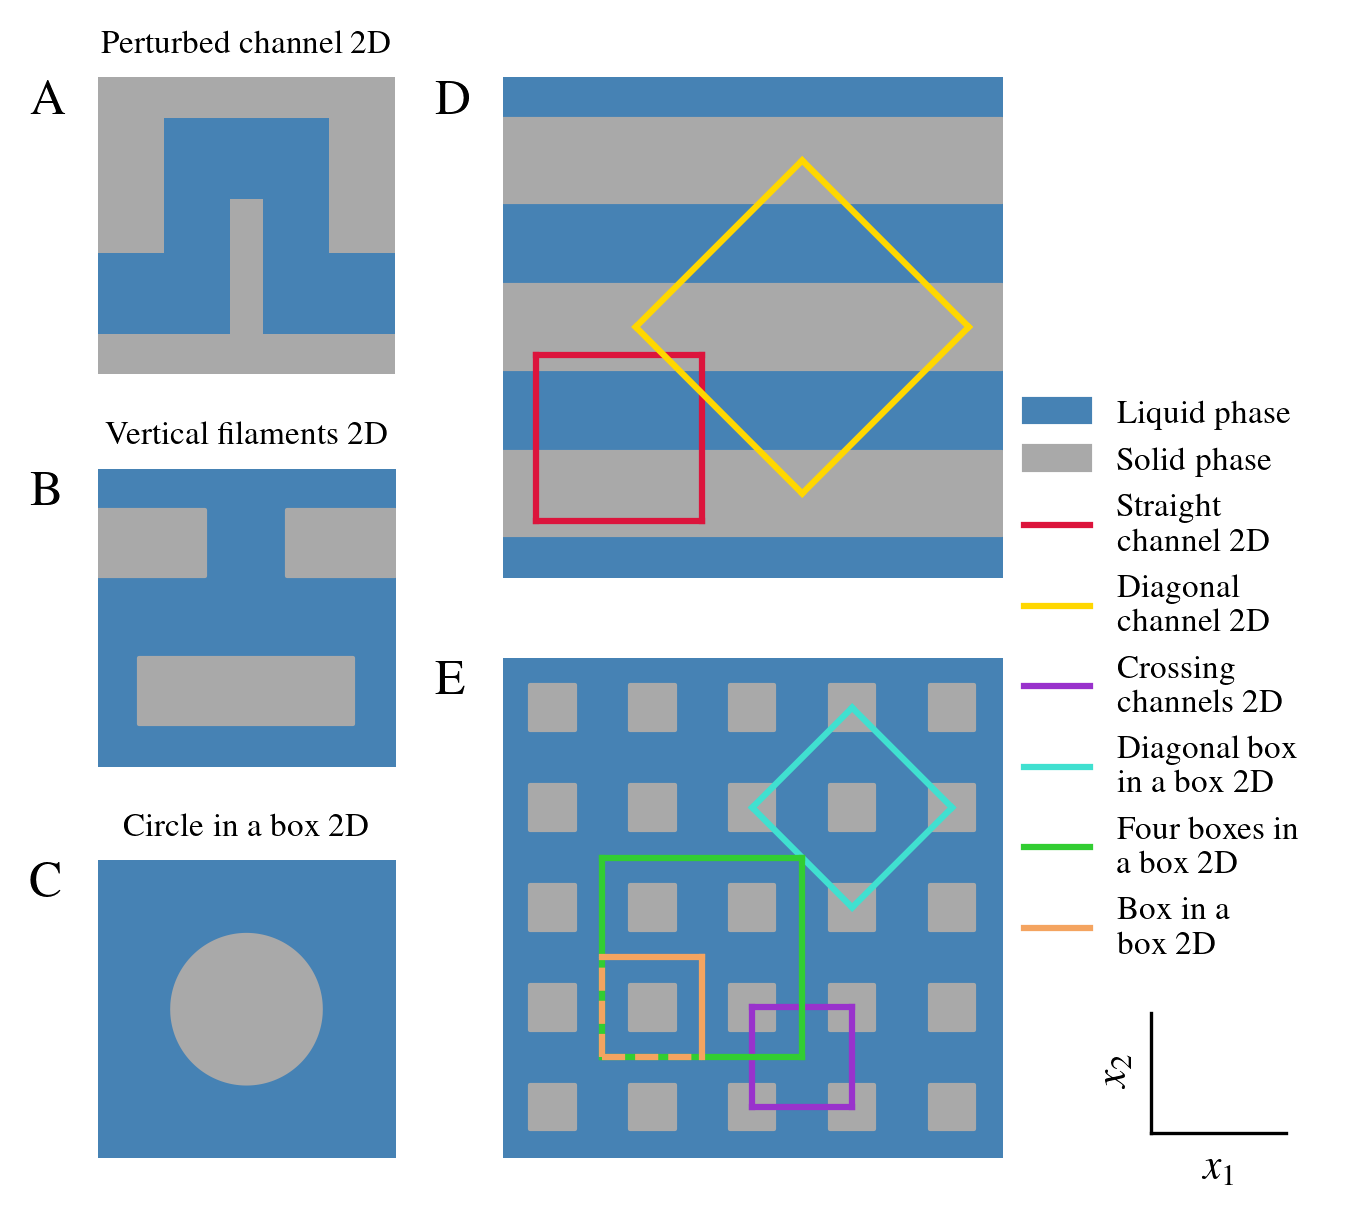

In [71]:
importlib.reload(pf)

lx = 4.5
ly = 4.


bx = 0.37
sx = 0.22

pos1 = [0.37, 0.05, bx, bx*lx/ly]
pos2 = [0.37, 0.95-bx*lx/ly, bx, bx*lx/ly]
pos3 = [0.07, 0.95-sx*lx/ly, sx, sx*lx/ly] 
pos4 = [0.07, 0.5-sx*0.5*lx/ly, sx, sx*lx/ly]
pos5 = [0.07, 0.05, sx, sx*lx/ly]

fig_0 = plt.figure(figsize=(lx,ly), dpi=300, facecolor='white')

pf.plot_different_box_reference_cells(fig_0, pos1)



pf.plot_different_channel_reference_cells(fig_0, pos2)


pf.plot_perturbed_channel_reference_cell(fig_0, pos3)


pf.plot_vertical_filaments_reference_cell(fig_0, pos4)


pf.plot_circle_in_a_box_reference_cell(fig_0, pos5)

pf.plot_2d_coordinate_system(fig_0, [0.85, 0.07, 0.1, 0.1])

steelblue_patch = mpatches.Patch(color='steelblue', label='Liquid phase')
darkgrey_patch = mpatches.Patch(color='darkgrey', label='Solid phase')

straigh_channel_line = mlines.Line2D([], [], color='crimson', label='Straight\n channel 2D')
diagonal_channels_line = mlines.Line2D([], [], color='gold', label='Diagonal\n channel 2D')

crossing_channels_line = mlines.Line2D([], [], color='darkorchid', label='Crossing\n channels 2D')
diagonal_box_line = mlines.Line2D([], [], color='turquoise', label='Diagonal box\n in a box 2D')
four_boxes_line = mlines.Line2D([], [], color='limegreen', label='Four boxes in\n a box 2D')
box_line = mlines.Line2D([], [], color='sandybrown', label='Box in a\n box 2D')

leg = fig_0.legend(handles=[steelblue_patch, darkgrey_patch, straigh_channel_line, diagonal_channels_line,
                            crossing_channels_line, diagonal_box_line, four_boxes_line, box_line],
                   loc=(0.75, 0.2), fontsize=8, )
leg.get_frame().set_linewidth(0.0)

fig_0.text(0.02, 0.92, 'A', fontsize=12)
fig_0.text(0.02, 0.5+sx*0.5*lx/ly-0.03, 'B', fontsize=12)
fig_0.text(0.02, 0.05+sx*lx/ly-0.03, 'C', fontsize=12)
fig_0.text(0.32, 0.92, 'D', fontsize=12)
fig_0.text(0.32, 0.05+bx*lx/ly-0.03, 'E', fontsize=12)

fig_0.savefig('./../results/geometries2d.pdf')
fig_0.savefig('./../results/geometries2d.tif')
plt.show()

## Functions to make theoretical predictions and test consitency of 2D results in plot below

In [17]:
def P(eps_l, eps_s, s1):
    p11 =s1*eps_l + (1-s1)*eps_s
    p12 = 0.
    p21 = 0.
    p22 = 1./((eps_s*s1+(1-s1)*eps_l)/(eps_l*eps_s))
    return np.array([[p11, p12],[p21, p22]])

def R(theta):
    """
    return 2D rotation matrix for rotation by angle theta 
    """
    return np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

def R_inv(theta):
    """
    return 2D rotation matrix for rotation by angle - theta 
    """
    return np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])

def straight_channel_theory_permittivity(eps_l, eps_s, component=''):
    p = np.linspace(0., 1., 1000, endpoint=True)
    y_data = np.zeros(1000)
    for i in range(1000):
        P_i = P(eps_l, eps_s, p[i])
        if component == '11':
            y_data[i] = P_i[0,0]
        if component == '12':
            y_data[i] = P_i[0,1]
        if component == '21':
            y_data[i] = P_i[1,0]
        if component == '22':
            y_data[i] = P_i[1,1]
    return [p, y_data]

def straight_channel_theory_diffusion(component=''):
    p = np.linspace(0., 1., 1000, endpoint=True)
    y_data = np.zeros(1000)
    for i in range(1000):
        D_i = np.array([[p[i],0.],[0., 0.]]) 
        if component == '11':
            y_data[i] = D_i[0,0]
        if component == '12':
            y_data[i] = D_i[0,1]
        if component == '21':
            y_data[i] = D_i[1,0]
        if component == '22':
            y_data[i] = D_i[1,1]
    return [p, y_data]

def diagonal_channel_theory_permittivity(eps_l, eps_s, component=''):
    p = np.linspace(0., 1., 1000, endpoint=True)
    y_data = np.zeros(1000)
    for i in range(1000):
        P_i = P(eps_l, eps_s, p[i])
        R_P = np.tensordot(R(np.pi/4.), P_i, axes=1)
        R_P_R_inv = np.tensordot(R_P, R_inv(np.pi/4.), axes=1)
        if component == '11':
            y_data[i] = R_P_R_inv[0,0]
        if component == '12':
            y_data[i] = R_P_R_inv[0,1]
        if component == '21':
            y_data[i] = R_P_R_inv[1,0]
        if component == '22':
            y_data[i] = R_P_R_inv[1,1]
    return [p, y_data]
eps_l =100.
eps_s = 1.

def diagonal_channel_theory_diffusion(component=''):
    p = np.linspace(0., 1., 1000, endpoint=True)
    y_data = np.zeros(1000)
    for i in range(1000):
        D_i = np.array([[p[i],0.],[0., 0.]])
        R_D = np.tensordot(R(np.pi/4.), D_i, axes=1)
        R_D_R_inv = np.tensordot(R_D, R_inv(np.pi/4.), axes=1)
        if component == '11':
            y_data[i] = R_D_R_inv[0,0]
        if component == '12':
            y_data[i] = R_D_R_inv[0,1]
        if component == '21':
            y_data[i] = R_D_R_inv[1,0]
        if component == '22':
            y_data[i] = R_D_R_inv[1,1]
    return [p, y_data]
    
# debug, check
##plot_diag = diagonal_channel_theory_permittivity(eps_l, eps_s, '21')
##plot_diff = diagonal_channel_theory_diffusion('21')
##plt.plot(plot_diag[0], (plot_diag[1]-eps_s)/(eps_l-eps_s))
##plt.plot(plot_diff[0], plot_diff[1])
##plt.show()


## Plot summary of the results of all 2D geometries

0.68
0.53
0.38
0.22999999999999998
0.07999999999999996


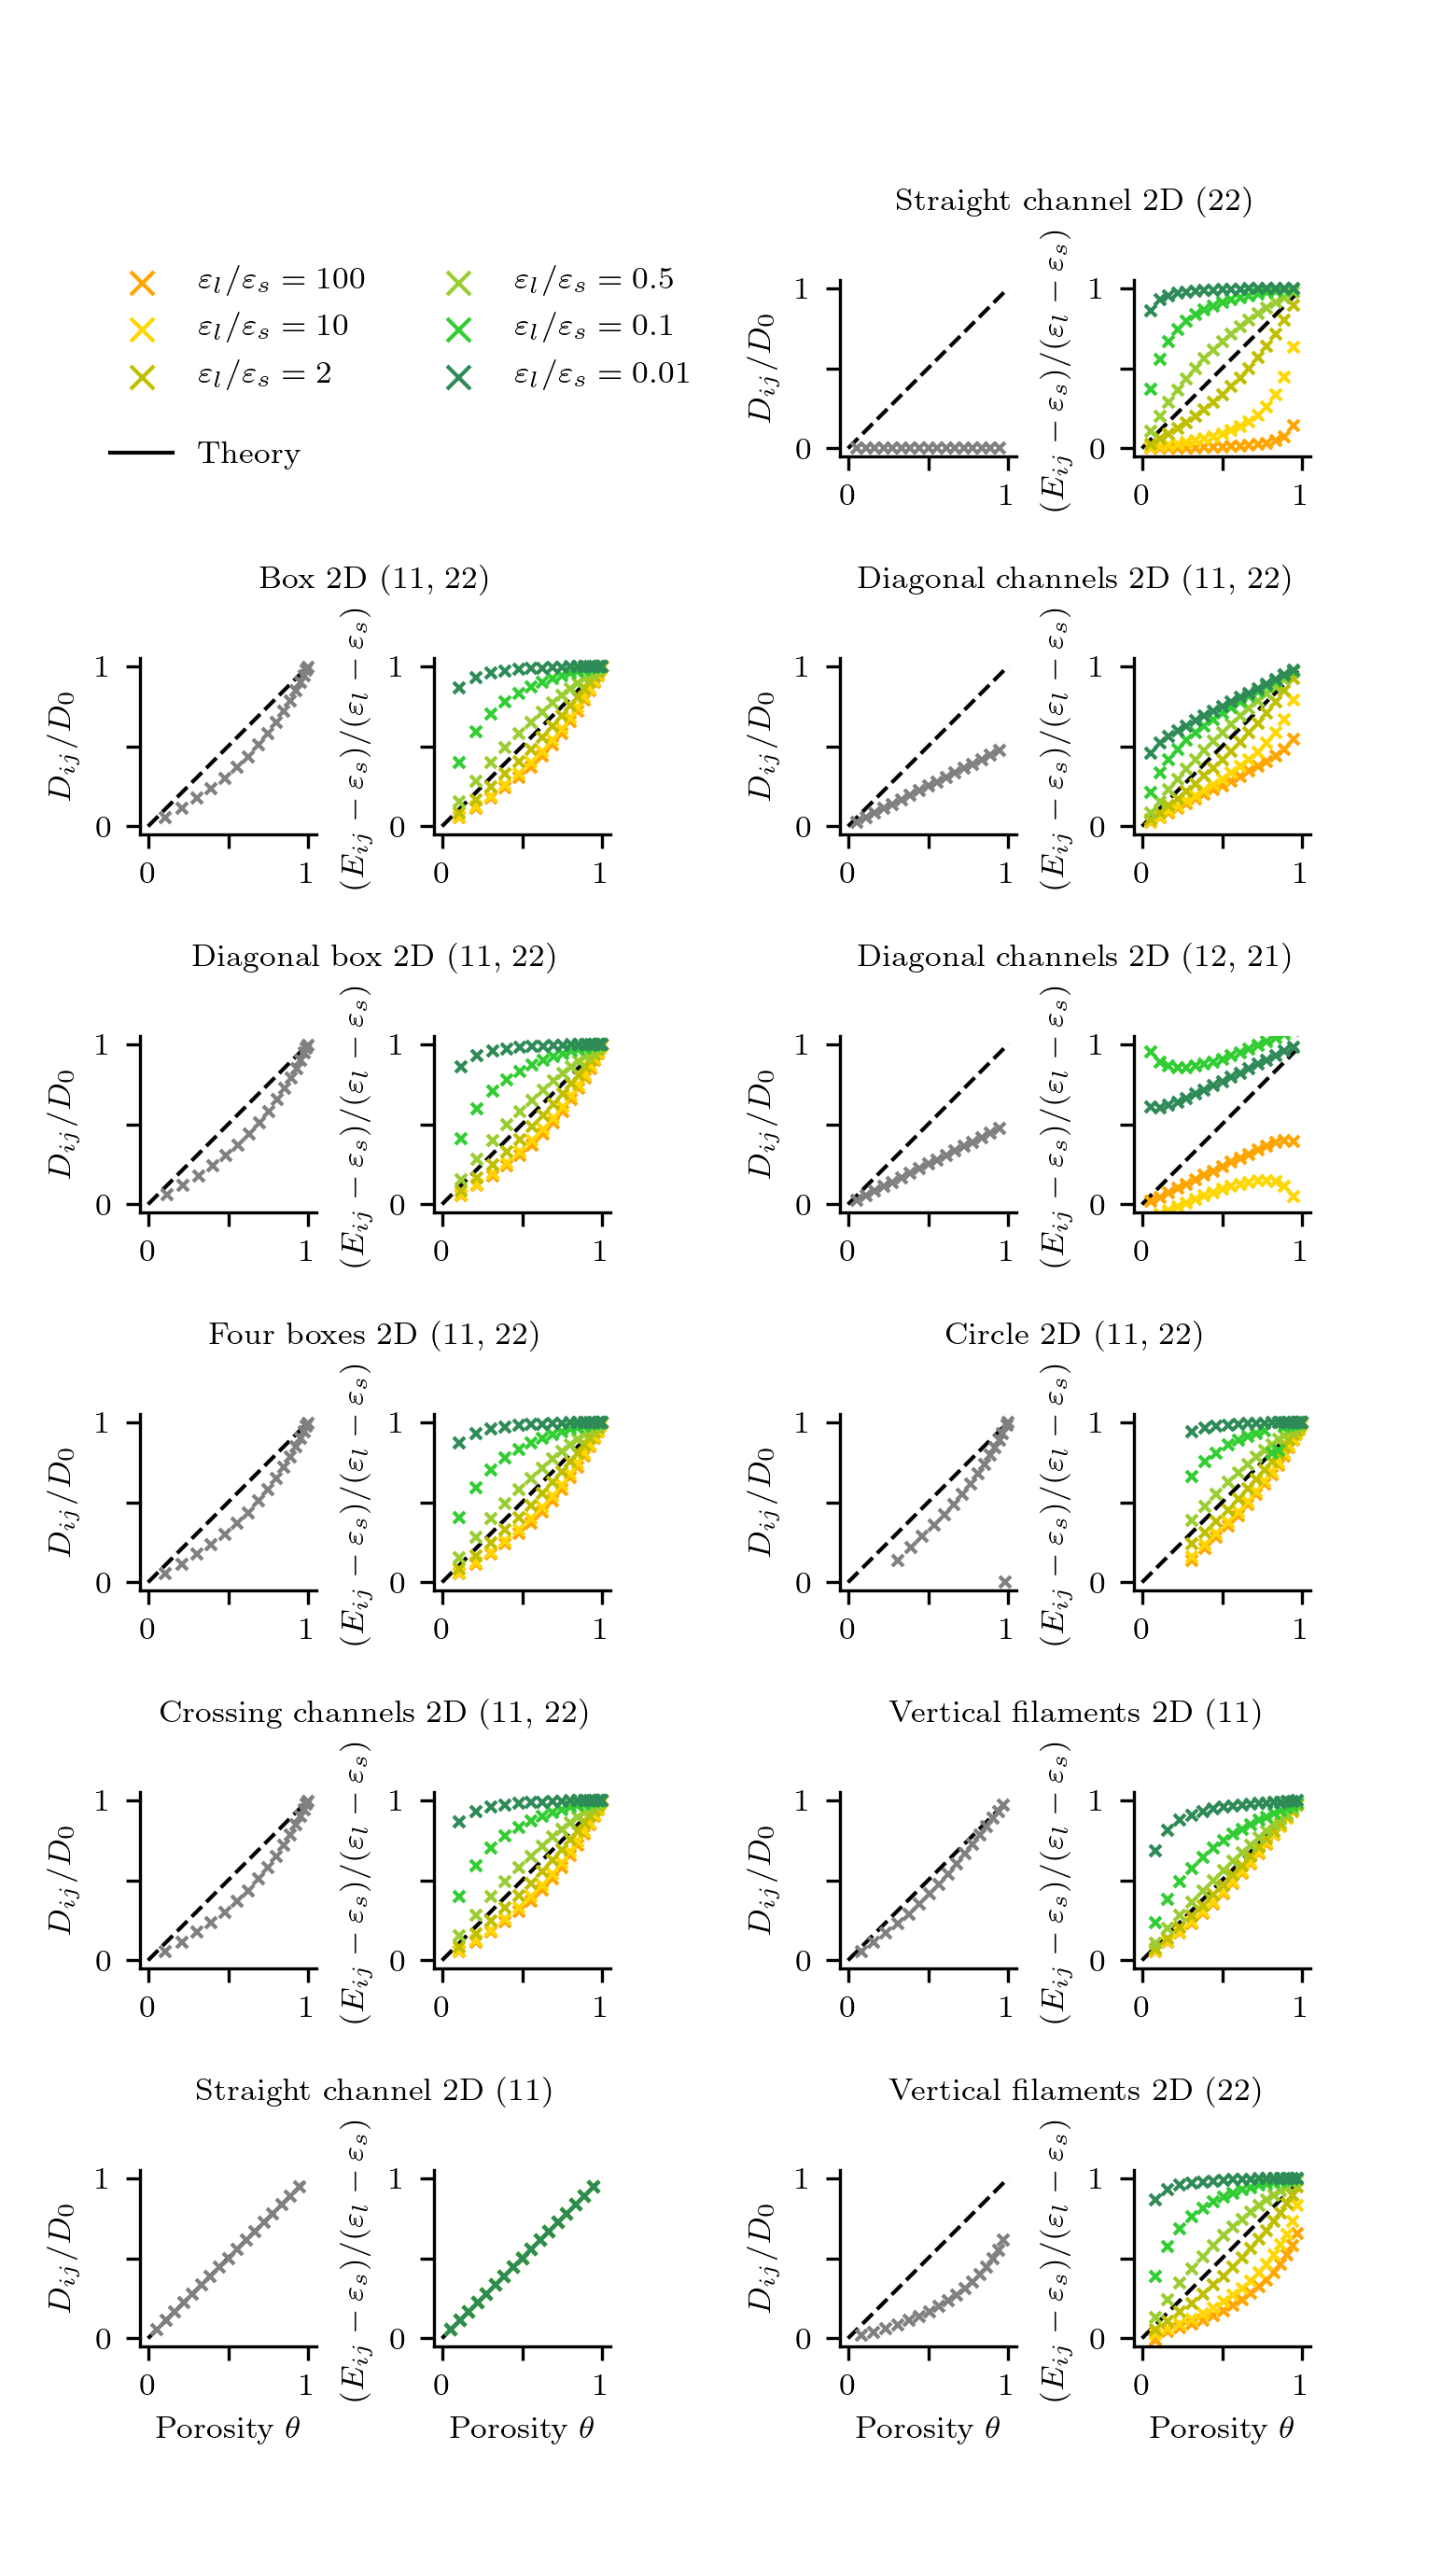

In [47]:
from plot_functions import *

def tensor_vs_porosity_subplot(fig, pos, x_data, y_data, 
                               x_ticks=[0,1], y_ticks=[0,1],
                               x_ticklabels=['0','1'], 
                               y_ticklabels=['0','1'],
                               x_label='', y_label=''):
    sub = fig.add_axes(pos)
    
    if len(x_data) == 1 and len(x_data) == 1:  # Diffusion Tensor
        colors = ['grey']
    elif len(x_data) == 6 and len(x_data) == 6:  # E or P tensor
        colors = [ 'orange', 'gold','y', 
                           'yellowgreen', 'limegreen', 'seagreen']
    else: 
        raise AssertionError('unexpected size of input data')
    # diagonal line
    sub.plot([0.,1.],[0.,1.], '--', color='black', lw=1.)
    
    for i in range(len(x_data)):
        x = x_data[i]
        y = y_data[i]
        sub.plot(x, y, 'x', c=colors[i], ms=3.)
        
    
    # style 
    sub.spines['top'].set_visible(False)
    sub.spines['right'].set_visible(False)

    sub.set_xlim([-0.05, 1.05])   
    sub.set_ylim([-0.05, 1.05])   
    
    sub.set_xticks(x_ticks)
    sub.set_yticks(y_ticks)
    
    sub.set_xticklabels(x_ticklabels, fontsize=8)
    sub.set_yticklabels(y_ticklabels, fontsize=8)
    
    sub.set_xlabel(x_label, fontsize=8)
    sub.set_ylabel(y_label, fontsize=8)
    
    return sub
    
def plot_reference_cell_tensors(fig, pos1, pos2, pos3, porosity, 
                                d_tensor, eps_tensor, m_tensor, 
                                name='ref. cell', 
                                make_xlabel=True,
                                make_ylabel=True,
                                make_xticklabels=True,
                                make_yticklabels=True,
                                display_mobility=True):
    
    # TODO MAKE TITLE
    if display_mobility == True:
        x_title = pos2[0] + 0.5 * pos2[2] # x + 0.5 * wx    
        y_title = pos2[1] + 1.25 * pos2[3] # y + 1.2 * wy
    else:
        x_title = (pos1[0] + pos1[2] + pos2[0]) / 2.
        y_title = pos2[1] + 1.4 * pos2[3] # y + 1.2 * wy
    fig.text(x_title, y_title, name, ha='center', fontsize=8)
    
    ###
    x_ticks = [0., 0.5, 1.]
    y_ticks = [0., 0.5, 1.]
    
    ###
    if make_xticklabels == True:
        x_ticklabels = ['0', '', '1']
    else : 
        x_ticklabels = ['','','']
    
    ###
    if make_yticklabels == True:
        y_ticklabels = ['0', '', '1']
    else : 
        y_ticklabels = ['','','']
    
    ###
    if make_xlabel == True:
        x_label = r'Porosity $\theta$'
    else:
        x_label = ''
    
    ###
    # diffusion tensor
    d_xvals = [porosity[0]]
    d_yvals = [d_tensor[0]]

    if make_ylabel == True:
        y_label = r'$D_{ij} / D_0$ '
    else:
        y_label = ''
    sub1 = tensor_vs_porosity_subplot(fig=fig, pos=pos1, 
                               x_data=d_xvals, 
                               y_data=d_yvals,
                               x_ticks=x_ticks, y_ticks=y_ticks,
                               x_ticklabels=x_ticklabels, 
                               y_ticklabels=y_ticklabels,
                               x_label=x_label, y_label=y_label)
    ###
    # permittivity tensor
    eps_xvals = porosity
    eps_yvals = eps_tensor
    if make_ylabel == True:
        y_label = r'($E_{ij}-\varepsilon_s$)/($\varepsilon_l - \varepsilon_s$)'#' [a. u.]'
    else:
        y_label = ''
    sub2 = tensor_vs_porosity_subplot(fig=fig, pos=pos2, 
                               x_data=eps_xvals, 
                               y_data=eps_yvals,
                               x_ticks=x_ticks, y_ticks=y_ticks,
                               x_ticklabels=x_ticklabels, 
                               y_ticklabels=y_ticklabels,
                               x_label=x_label, y_label=y_label)
    ###
    # mobility tensor
    if display_mobility == True:
        m_xvals = porosity
        m_yvals = m_tensor
        if make_ylabel == True:
            y_label = r'$M_{ij} / D_0$'
        else:
            y_label = ''
        sub3 = tensor_vs_porosity_subplot(fig=fig, pos=pos3, 
                                   x_data=m_xvals, 
                                   y_data=m_yvals,
                                   x_ticks=x_ticks, y_ticks=y_ticks,
                                   x_ticklabels=x_ticklabels, 
                                   y_ticklabels=y_ticklabels,
                                   x_label=x_label, y_label=y_label)
    
    #################
    # theory
    line_col = 'black'
    lw = .5
    zorder=100
    
    if name == 'Straight channel 2D \n(11)':

        sub1.plot(straight_channel_theory_diffusion('11')[0], straight_channel_theory_diffusion('11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(100., 1., component='11')[0],
                  straight_channel_theory_permittivity(100., 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(10., 1., component='11')[0],
                  straight_channel_theory_permittivity(10., 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(2., 1., component='11')[0],
                  straight_channel_theory_permittivity(2., 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.5, 1., component='11')[0],
                  straight_channel_theory_permittivity(0.5, 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.1, 1., component='11')[0],
                  straight_channel_theory_permittivity(0.1, 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.01, 1., component='11')[0],
                  straight_channel_theory_permittivity(0.01, 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
    if name == 'Straight channel 2D \n(22)':
        sub1.plot(straight_channel_theory_diffusion('22')[0], straight_channel_theory_diffusion('22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(100., 1., component='22')[0],
                  straight_channel_theory_permittivity(100., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(10., 1., component='22')[0],
                  straight_channel_theory_permittivity(10., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(2., 1., component='22')[0],
                  straight_channel_theory_permittivity(2., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.5, 1., component='22')[0],
                  straight_channel_theory_permittivity(0.5, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.1, 1., component='22')[0],
                  straight_channel_theory_permittivity(0.1, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.01, 1., component='22')[0],
                  straight_channel_theory_permittivity(0.01, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
   
    if name == 'Diagonal channels 2D \n(11, 22)':
        sub1.plot(diagonal_channel_theory_diffusion('22')[0], diagonal_channel_theory_diffusion('22')[1], 
                  color='lightgrey', linestyle='-', zorder=-100)
        sub2.plot(diagonal_channel_theory_permittivity(100., 1., component='22')[0],
                  diagonal_channel_theory_permittivity(100., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(10., 1., component='22')[0],
                  diagonal_channel_theory_permittivity(10., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(2., 1., component='22')[0],
                  diagonal_channel_theory_permittivity(2., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.5, 1., component='22')[0],
                  diagonal_channel_theory_permittivity(0.5, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.1, 1., component='22')[0],
                  diagonal_channel_theory_permittivity(0.1, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.01, 1., component='22')[0],
                  diagonal_channel_theory_permittivity(0.01, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
    
    if name == 'Diagonal channels 2D \n(12, 21)':
        sub1.plot(diagonal_channel_theory_diffusion('21')[0], diagonal_channel_theory_diffusion('21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(100., 1., component='21')[0],
                  diagonal_channel_theory_permittivity(100., 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(10., 1., component='21')[0],
                  diagonal_channel_theory_permittivity(10., 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(2., 1., component='21')[0],
                  diagonal_channel_theory_permittivity(2., 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.5, 1., component='21')[0],
                  diagonal_channel_theory_permittivity(0.5, 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.1, 1., component='21')[0],
                  diagonal_channel_theory_permittivity(0.1, 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.01, 1., component='21')[0],
                  diagonal_channel_theory_permittivity(0.01, 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)



file_ids = ['box_in_a_box_2d',
         'diagonal_box_in_box_2d',
         'four_boxes_in_a_box_2d',
         'crossing_channels_2d',
         'straight_channel_2d',
         'straight_channel_2d_22',
         'diagonal_channels_2d',
         'diagonal_channels_2d_12',
         # diagonal_channels_2d_21#
         # diagonal_channels_2d_22
         'circle_in_a_box_2d',
         'vertical_filaments_2d',
         'vertical_filaments_2d_22',
] 
names = [
    'Box 2D (11, 22)',
    'Diagonal box 2D (11, 22)',
     'Four boxes 2D (11, 22)',
         'Crossing channels 2D (11, 22)',
         'Straight channel 2D (11)',
         'Straight channel 2D (22)',
         'Diagonal channels 2D (11, 22)',
         'Diagonal channels 2D (12, 21)',
         # diagonal_channels_2d_21#
         # diagonal_channels_2d_22
         'Circle 2D (11, 22)',
         'Vertical filaments 2D (11)',
         'Vertical filaments 2D (22)',
]

vis_geos = [
    ['box_in_a_box_2d', '11'],
    ['diagonal_box_in_box_2d', '11'],
    ['four_boxes_in_a_box_2d', '11'],
    ['crossing_channels_2d', '11'],
    ['straight_channel_2d', '11'],
    ['straight_channel_2d', '22'],
    ['diagonal_channels_2d', '11'],
    ['diagonal_channels_2d', '12'],
    ['circle_in_a_box_2d','11'],
    ['vertical_filaments_2d','11'],
    ['vertical_filaments_2d','22'],
           ]

################################################
display_mobility = False
if display_mobility == True:
    figsize = (7.5,9.)
    wy = 0.07
    wx = 0.07 * figsize[1] / figsize[0]
    x_margin = 0.145 - wx
    y_margin = 0.08
else: 
    figsize = (5.,9.)
    wy = 0.07
    wx = 0.07 * figsize[1] / figsize[0]
    x_margin = 0.21 - wx
    y_margin = 0.08


fig = plt.figure(figsize=figsize, dpi=300, facecolor='white')

for fi in range(len(vis_geos)):
    gm = vis_geos[fi][0]  # name of refernce cell
    t_comp = vis_geos[fi][1]  # indices of component of tensor 
    
    if fi < 5:
        x1 = 0.08    
        y = 0.68 - fi * (wy + y_margin)
        print(y)
    else : 
        x1 = 0.58
        y = 0.83 - (fi-5) * (wy + y_margin)
    x2 = x1 + wx + x_margin
    x3 = x2 + wx + x_margin
    
    if fi in [4, 10]:
        make_xlabel = True
    else:
        make_xlabel = False

    pos1 = [x1, y, wx, wy]
    pos2 = [x2, y, wx, wy]
    pos3 = [x3, y, wx, wy]


    x_data  = []
    y_data_d = []
    y_data_e = []
    y_data_m = []
    
    eps_s = 1.
    for eps_l in [100, 10, 2, .5, .1, .01]:
        e_indexer = np.all(
            (shown_data_df['id']==gm, 
             shown_data_df['tensor_comp']=='e'+str(t_comp), 
             shown_data_df['eps_l']==eps_l, 
            ), 
            axis=0) 
        m_indexer = np.all(
            (shown_data_df['id']==gm, 
             shown_data_df['tensor_comp']=='m'+str(t_comp), 
             shown_data_df['eps_l']==eps_l, 
            ), 
            axis=0) 
        d_indexer = np.all(
            (shown_data_df['id']==gm, 
             shown_data_df['tensor_comp']=='d'+str(t_comp), 
             shown_data_df['eps_l']==eps_l, 
            ), 
            axis=0) 

        e_data = shown_data_df.loc[e_indexer, ['porosity', 'offset']].values
        m_data = shown_data_df.loc[m_indexer, ['porosity', 'offset']].values
        d_data = shown_data_df.loc[d_indexer, ['porosity', 'offset']].values
        xe,ye = np.transpose(e_data)
        ye = (ye - eps_s) / (eps_l - eps_s)
        xm,ym = np.transpose(m_data)
        xd,yd = np.transpose(d_data)
        yd = yd*xd # D/D0

        if not np.all(np.logical_and(xm==xd , xd==xe)):
            raise Exception()

        x_data.append(xd)
        y_data_d.append(yd)
        y_data_e.append(ye)
        y_data_m.append(ym)

    plot_reference_cell_tensors(fig, pos1, pos2, pos3, 
                                porosity=x_data, 
                                d_tensor=y_data_d, 
                                eps_tensor=y_data_e, 
                                m_tensor=y_data_m, 
                                name=names[fi], 
                                make_xlabel=make_xlabel,
                                make_ylabel=True,
                                make_xticklabels=True,
                                make_yticklabels=True,
                                display_mobility=display_mobility)

    



## FRAME
ax_annotate = fig.add_axes([0.,0.,1.,1.], zorder=10)
ax_annotate.set_facecolor('none')
ax_annotate.set_xticks([])
ax_annotate.set_yticks([])
ax_annotate.spines['top'].set_visible(False)
ax_annotate.spines['right'].set_visible(False)
ax_annotate.spines['left'].set_visible(False)
ax_annotate.spines['bottom'].set_visible(False)


import matplotlib.lines as mlines

colors = [ 'orange', 'gold','y', 
                           'yellowgreen', 'limegreen', 'seagreen']

m1 = mlines.Line2D([], [], color=colors[0], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=100$', lw=0.)
m2 = mlines.Line2D([], [], color=colors[1], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=10$', lw=0.)
m3 = mlines.Line2D([], [], color=colors[2], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=2$', lw=0.)
m4 = mlines.Line2D([], [], color=colors[3], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.5$', lw=0.)
m5 = mlines.Line2D([], [], color=colors[4], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.1$', lw=0.)
m6 = mlines.Line2D([], [], color=colors[5], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.01$', lw=0.)

black_line = mlines.Line2D([], [], color='black', marker='',markersize=10, label='Theory', lw=1.)



leg1 = ax_annotate.legend(handles=[m1,m2,m3,m4,m5,m6], loc=(0.05,0.85), frameon=False, ncol=2, fontsize=8)
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(leg1)
leg2 = ax_annotate.legend(handles=[black_line], loc=(0.05,0.82), frameon=False, ncol=1, fontsize=8)




#plt.savefig('./../results/Figure4.tif')
#plt.savefig('./../results/Figure4.pdf')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/homogenization/Figure4.png')
plt.show()



  


In [19]:

#eps_l_eps_s_list=np.unique(shown_data_df.loc[indexer, ['eps_l', 'eps_s']].values, axis=0)

x_data  = []
y_data_d = []
y_data_e = []
y_data_m = []

for eps_l in [100, 10, 2, .5, .1, .01]:
    e_indexer = np.all(
        (shown_data_df['id']=='box_in_a_box_2d', 
         shown_data_df['tensor_comp']=='e11', 
         shown_data_df['eps_l']==eps_l, 
        ), 
        axis=0) 
    m_indexer = np.all(
        (shown_data_df['id']=='box_in_a_box_2d', 
         shown_data_df['tensor_comp']=='m11', 
         shown_data_df['eps_l']==eps_l, 
        ), 
        axis=0) 
    d_indexer = np.all(
        (shown_data_df['id']=='box_in_a_box_2d', 
         shown_data_df['tensor_comp']=='d11', 
         shown_data_df['eps_l']==eps_l, 
        ), 
        axis=0) 
        
    e_data = shown_data_df.loc[e_indexer, ['porosity', 'offset']].values
    m_data = shown_data_df.loc[m_indexer, ['porosity', 'offset']].values
    d_data = shown_data_df.loc[d_indexer, ['porosity', 'offset']].values
    xe,ye = np.transpose(e_data)
    xm,ym = np.transpose(m_data)
    xd,yd = np.transpose(d_data)
    
    if not np.all(np.logical_and(xm==xd , xd==xe)):
        raise Exception()

    x_data.append(xd)
    y_data_d.append(yd)
    y_data_e.append(ye)
    y_data_m.append(ym)


# DIFFERENCE BETWEEN BOX AND CIRCLE DIFFUSION
Because of the limited resolution 3D-geometries are always build of cuboids and not of cylinders. To estimate the error that is made compare the difference between a circle and a square geometry in 2D. 

0.9560116968964426 1.0422063004857323


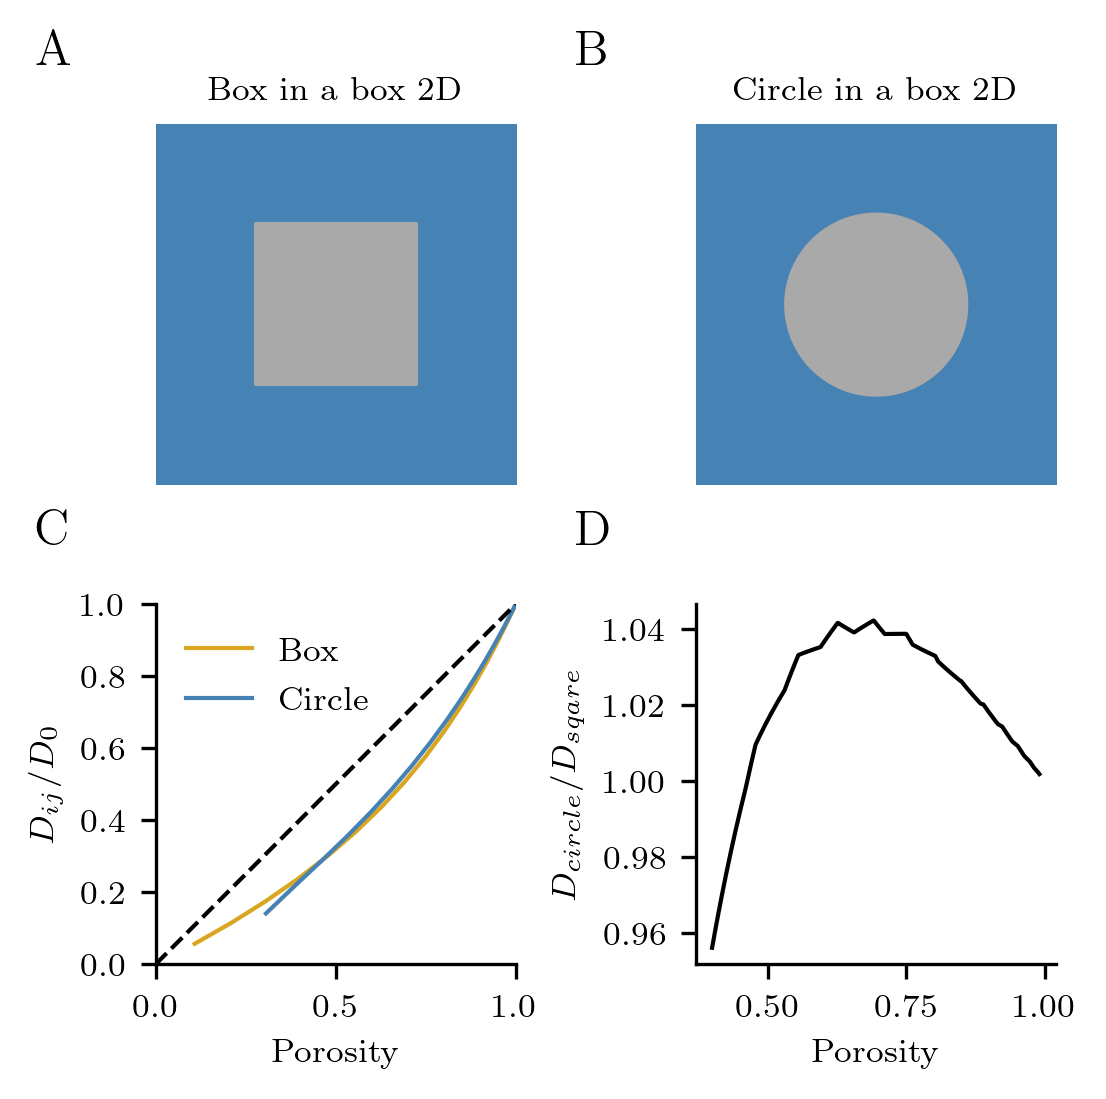

In [27]:
reload(pf)

fig = plt.figure(dpi=300, figsize=(4,4), facecolor='white')

pos1 = [0.15, 0.15, 0.3, 0.3]
pos2 = [0.15, 0.55, 0.3, 0.3]
pos3 = [0.6, 0.15, 0.3, 0.3]
pos4 = [0.6, 0.55, 0.3, 0.3]


pd_b2d = pickle.load(open('./../results/plot_data_box_in_a_box_2d.pcl', 'rb'))
pd_c2d = pickle.load(open('./../results/plot_data_circle_in_a_box_2d.pcl', 'rb'))



########
# show diffusion for circle and square in a single plot
ax1 = fig.add_axes(pos1)
ax1.plot(pd_b2d['pourosities'][0], pd_b2d['d'][0], 'r-', label='Box', c='goldenrod', lw=1.)
ax1.plot(pd_c2d['pourosities'][0], pd_c2d['d'][0], 'b-', label='Circle', c='steelblue', lw=1.)
ax1.plot([0,1],[0,1], color='black', linestyle='--', lw=1.)
ax1.set_xlabel('Porosity', fontsize=8)
ax1.set_ylabel('$D_{ij}/D_0$', fontsize=8)
ax1.set_xlim([0., 1.])
ax1.set_ylim([0., 1.])
ax1.tick_params(labelsize=8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(frameon=False, fontsize=8)

############
# show relative difference between square and circle
from scipy import interpolate
circle_spline = interpolate.interp1d(pd_c2d['pourosities'][0], pd_c2d['d'][0])
box_spline = interpolate.interp1d(pd_b2d['pourosities'][0], pd_b2d['d'][0])
ratios = []
for p_i in np.linspace(0.4, 0.99, 1000,):
    ratios.append(circle_spline(p_i)/box_spline(p_i))
print(np.min(ratios), np.max(ratios))

ax2 = fig.add_axes(pos3)
ax2.plot(np.linspace(0.4, 0.99, 1000,), ratios, c='k', lw=1.)
ax2.set_xlabel('Porosity', fontsize=8)
ax2.set_ylabel('$D_{circle} / D_{sqare}$', fontsize=8)
ax2.tick_params(labelsize=8)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


##################
# plot geometries
pf.plot_circle_in_a_box_reference_cell(fig, pos4)
pf.plot_single_box_in_a_box_reference_cell(fig, pos2)

fig.text(0.05,0.9,'A',fontsize=12)
fig.text(0.5,0.9,'B',fontsize=12)
fig.text(0.05,0.5,'C',fontsize=12)
fig.text(0.5,0.5,'D',fontsize=12)

#plt.savefig('./../results/Figure7.tif')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/homogenization/Figure5.png')
plt.show()

# ++++++++++++++++++++++++++++++++++++++++++++++++++++

In [23]:
for eps_l in [0.01, 0.1, 0.5, 2., 10, 100.]:

    geom1 = 'box_in_a_box_2d'
    geom2 = 'circle_in_a_box_2d'
    comp='m11'
    #eps_l = 10.
    inds1 = np.all( (shown_data_df['id']==geom1 , shown_data_df['eps_l']==eps_l, shown_data_df['tensor_comp']==comp), axis=0)
    inds2 = np.all( (shown_data_df['id']==geom2 , shown_data_df['eps_l']==eps_l, shown_data_df['tensor_comp']==comp), axis=0)
    print(inds)
    
    por_vals1 = np.transpose(shown_data_df.loc[inds1,['porosity']].values)[0]
    por_vals2 = np.transpose(shown_data_df.loc[inds2,['porosity']].values)[0]
    ten_vals1 = np.transpose(shown_data_df.loc[inds1,['offset']].values)[0]
    ten_vals2 = np.transpose(shown_data_df.loc[inds2,['offset']].values)[0]
    
    
    x_min = np.max([np.min(por_vals1), np.min(por_vals2)])
    x_max = np.min([np.max(por_vals1), np.max(por_vals2)])
    
    interp1 = interp1d(por_vals1, ten_vals1)
    interp2 = interp1d(por_vals2, ten_vals2)
        
    x_vals = np.linspace(x_min, x_max, 1000)
    y1 = interp1(x_vals)
    y2 = interp2(x_vals)
    plt.plot(x_vals, y1)  
    plt.plot(x_vals, y2, ls='--')
    plt.show()
    plt.plot(x_vals, (y1-y2))
    plt.ylim(0.0, 0.1)
    plt.show()

NameError: name 'inds' is not defined

['vertical_filaments_2d', 'vertical_filaments_2d_22']
vertical_filaments_2d vertical_filaments_2d
vertical_filaments_2d 0.027777777777777776 0.970679012345679


KeyboardInterrupt: 

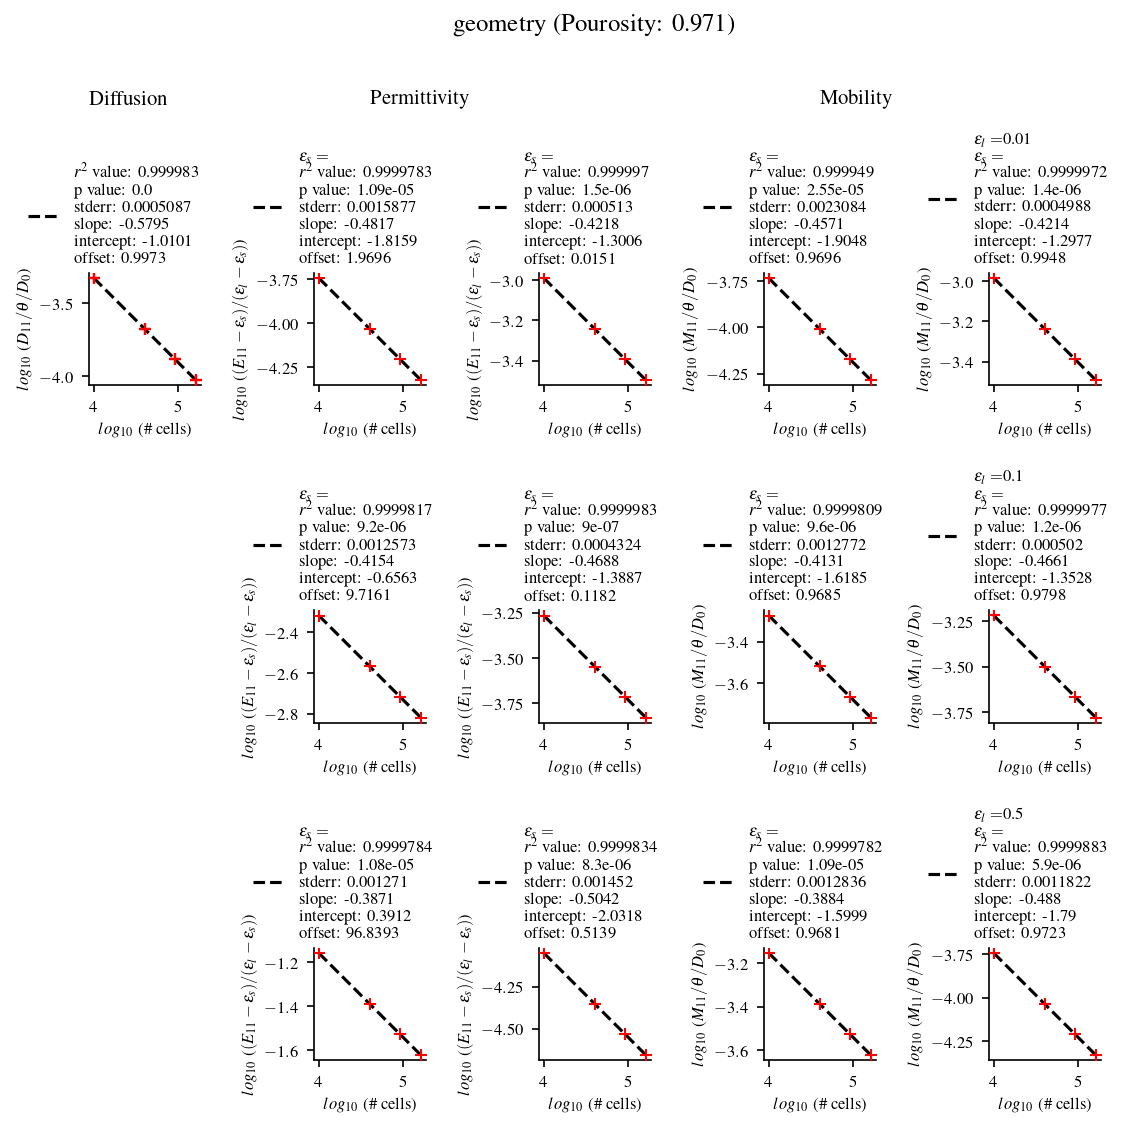

In [24]:
importlib.reload(pf)

geometries2D = ['box_in_a_box_2d', 'four_boxes_in_a_box_2d', 'crossing_channels_2d', 'diagonal_box_in_box_2d',
              'straight_channel_2d', 'diagonal_channels_2d',
              #'perturbed_channel_2d',
              'vertical_filaments_2d', 'circle_in_a_box_2d']

geometries3D = ['box_in_a_box_3d',  'extended_box_3d', 'crossing_filaments_3d', 'actin_cytosceleton_3d']

geometries =  geometries3D + geometries2D
geometries = ['vertical_filaments_2d', 'vertical_filaments_2d_22']


pourosities = {geom:[] for geom in geometries}

scale_factors = {geom:[] for geom in geometries}

plot_data = {gm: {'pourosities':[[],[],[],[],[],[]], 'd':[[],[],[],[],[],[]], 'p':[[],[],[],[],[],[]], 
                  'm':[[],[],[],[],[],[]]} 
              for gm in geometries}

print(geometries)

i = 0
for r in results:
    gm = r[0]
    if gm in geometries:
        
        pourosity = float(r[9])        
        scale_f = float( r[11]) / float(r[10])
        if np.all(np.abs(np.array(pourosities[gm]) - pourosity) > 0.00001):
            pourosities[gm].append(pourosity)
        if np.all(np.abs(np.array(scale_factors[gm]) - scale_f) > 0.00001):
            scale_factors[gm].append(scale_f)
        i = i+1
        
#print(len(pourosities['box_in_a_box_3d']))
#print(len(scale_factors['box_in_a_box_3d']))


for gm_temp in geometries :
    
    if gm_temp[-3:] in ['_12', '_22', '_21']:
        gm = gm_temp[:-3]
    else:
        gm = gm_temp
    print(gm_temp, gm)
    for scale_f in scale_factors[gm]:
    #for pourosity in pourosities[gm]:
        res_d = []
        res_p_1 = []
        res_p_2 = []
        res_p_3 = []
        res_p_4 = []
        res_p_5 = []
        res_p_6 = []
        res_m_1 = []
        res_m_2 = []
        res_m_3 = []
        res_m_4 = []
        res_m_5 = []
        res_m_6 = []
        y_data_d = []
        y_data_p_1 = []
        y_data_p_2 = []
        y_data_p_3 = []
        y_data_p_4 = []
        y_data_p_5 = []
        y_data_p_6 = []   
        y_data_m_1 = []
        y_data_m_2 = []
        y_data_m_3 = []
        y_data_m_4 = []
        y_data_m_5 = []
        y_data_m_6 = []    
        for r in results:
            if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors' and r[11]/r[10]== scale_f:        
                pourosity = r[9]
                if gm in geometries3D:
                    num_cells_liquid = r[3]*r[3]*r[3]*6*pourosity
                    
                elif gm in geometries2D:
                    num_cells_liquid = r[3]*r[3]*2*pourosity

                if gm == gm_temp:
                    D = r[6][(0,0)]
                    P = r[7][(0,0)]
                    M = r[8][(0,0)]
                elif gm_temp[-3:] == '_22':
                    D = r[6][(1,1)]
                    P = r[7][(1,1)]
                    M = r[8][(1,1)]
                elif gm_temp[-3:] == '_12':
                    D = r[6][(0,1)]
                    P = r[7][(0,1)]
                    M = r[8][(0,1)]
                elif gm_temp[-3:] == '_21':
                    D = r[6][(1,0)]
                    P = r[7][(1,0)]
                    M = r[8][(1,0)]
                
                eps_l = r[1]
                
                y_data_d.append(D)
                res_d.append(num_cells_liquid)
                if eps_l == 100.:
                    y_data_p_1.append(P)                    
                    res_p_1.append(num_cells_liquid)
                    y_data_m_1.append(M)                    
                    res_m_1.append(num_cells_liquid)
                elif eps_l == 10.:
                    y_data_p_2.append(P)
                    res_p_2.append(num_cells_liquid)
                    y_data_m_2.append(M)
                    res_m_2.append(num_cells_liquid)
                elif eps_l == 2.:
                    y_data_p_3.append(P)
                    res_p_3.append(num_cells_liquid)
                    y_data_m_3.append(M)
                    res_m_3.append(num_cells_liquid)
                elif eps_l == .5:
                    y_data_p_4.append(P)
                    res_p_4.append(num_cells_liquid)
                    y_data_m_4.append(M)
                    res_m_4.append(num_cells_liquid)
                elif eps_l == .1:
                    y_data_p_5.append(P)
                    res_p_5.append(num_cells_liquid)
                    y_data_m_5.append(M)
                    res_m_5.append(num_cells_liquid)
                elif eps_l == .01:
                    y_data_p_6.append(P)
                    res_p_6.append(num_cells_liquid)
                    y_data_m_6.append(M)
                    res_m_6.append(num_cells_liquid)
        
        #plt.plot(res_m_4, y_data_m_4,'x')
        #plt.title(scale_f)
        #plt.show()

        y_size = 0.1
        x_size = 0.1

        pos_d   = [0.05, 0.65, x_size, y_size]
        pos_p_1 = [0.25, 0.05, x_size, y_size]
        pos_p_2 = [0.25, 0.35, x_size, y_size]
        pos_p_3 = [0.25, 0.65, x_size, y_size]
        pos_p_4 = [0.45, 0.05, x_size, y_size]
        pos_p_5 = [0.45, 0.35, x_size, y_size]
        pos_p_6 = [0.45, 0.65, x_size, y_size]
        pos_m_1 = [0.65, 0.05, x_size, y_size]
        pos_m_2 = [0.65, 0.35, x_size, y_size]
        pos_m_3 = [0.65, 0.65, x_size, y_size]
        pos_m_4 = [0.85, 0.05, x_size, y_size]
        pos_m_5 = [0.85, 0.35, x_size, y_size]
        pos_m_6 = [0.85, 0.65, x_size, y_size]

        fig_tmp = plt.figure(figsize=(7.5,  7.5), dpi=150)
        print(gm, scale_f, pourosity)

        lim_d = pf.plot_correction_tensor_regression_line(fig_tmp, pos_d, res_d, y_data_d, title='Diffusion')

        lim_p_100 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_p_1, res_p_1, y_data_p_1, 
                                                              title='Permittivity', eps_l=100.)
        lim_p_10 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_p_2, res_p_2, y_data_p_2, 
                                                             title='Permittivity', eps_l=10.)
        lim_p_2 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_p_3, res_p_3, y_data_p_3,
                                                            title='Permittivity', eps_l=2.)
        lim_p_05 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_p_4, res_p_4, y_data_p_4,
                                                             title='Permittivity', eps_l=0.5)
        lim_p_01 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_p_5, res_p_5, y_data_p_5, 
                                                             title='Permittivity', eps_l=0.1)
        lim_p_001 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_p_6, res_p_6, y_data_p_6,
                                                              title='Permittivity', eps_l=0.01)

        lim_m_100 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_m_1, res_m_1, y_data_m_1, 
                                                              title='Mobility', eps_l=100.)
        lim_m_10 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_m_2, res_m_2, y_data_m_2, 
                                                             title='Mobility', eps_l=10.)
        lim_m_2 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_m_3, res_m_3, y_data_m_3,
                                                            title='Mobility', eps_l=2.)
        lim_m_05 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_m_4, res_m_4, y_data_m_4,
                                                             title='Mobility', eps_l=0.5)
        lim_m_01 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_m_5, res_m_5, y_data_m_5, 
                                                             title='Mobility', eps_l=0.1)
        lim_m_001 = pf.plot_correction_tensor_regression_line(fig_tmp, pos_m_6, res_m_6, y_data_m_6,
                                                              title='Mobility', eps_l=0.01)

        fig_tmp.text(0.05, 0.9, 'Diffusion', fontsize=10)
        fig_tmp.text(0.3, 0.9, 'Permittivity', fontsize=10)
        fig_tmp.text(0.7, 0.9, 'Mobility', fontsize=10)

        fig_tmp.suptitle('geometry'+ ' (Pourosity: ' + str(np.round(pourosity,3)) + ')')
        fig_tmp.savefig('./../results/reg_lines_3d/' + gm_temp + '_'+str(np.round(pourosity,3))+'.png')
        plt.close()


        plot_data[gm_temp]['pourosities'][0].append(pourosity)
        plot_data[gm_temp]['pourosities'][1].append(pourosity)
        plot_data[gm_temp]['pourosities'][2].append(pourosity)
        plot_data[gm_temp]['pourosities'][3].append(pourosity)
        plot_data[gm_temp]['pourosities'][4].append(pourosity)
        plot_data[gm_temp]['pourosities'][5].append(pourosity)
        plot_data[gm_temp]['d'][0].append(lim_d*pourosity)
        plot_data[gm_temp]['p'][0].append((lim_p_100-1.)/(100.-1.))
        plot_data[gm_temp]['p'][1].append((lim_p_10-1.)/(10.-1.))
        plot_data[gm_temp]['p'][2].append((lim_p_2-1.)/(2.-1.))
        plot_data[gm_temp]['p'][3].append((lim_p_05-1.)/(0.5-1.))
        plot_data[gm_temp]['p'][4].append((lim_p_01-1.)/(0.1-1.))
        plot_data[gm_temp]['p'][5].append((lim_p_001-1.)/(0.01-1.))
        plot_data[gm_temp]['m'][0].append(lim_m_100)
        plot_data[gm_temp]['m'][1].append(lim_m_10)
        plot_data[gm_temp]['m'][2].append(lim_m_2)
        plot_data[gm_temp]['m'][3].append(lim_m_05)
        plot_data[gm_temp]['m'][4].append(lim_m_01)
        plot_data[gm_temp]['m'][5].append(lim_m_001)
        

print('all data sorted')

In [9]:
# For geometries straight_channel_2d, diagonal_channels_2d and circle_in_a_box_2d use max resolution 
# instead of limit values for tensors geometries
geometries = ['straight_channel_2d', 'straight_channel_2d_22', 
              'diagonal_channels_2d', 'diagonal_channels_2d_22',
              'diagonal_channels_2d_21','diagonal_channels_2d_12',
              'circle_in_a_box_2d']

pourosities = {geom:[] for geom in geometries}

scale_factors = {geom:[] for geom in geometries}

max_res = {geom:0 for geom in geometries}

plot_data = {gm: {'pourosities':[[],[],[],[],[],[]], 'd':[[],[],[],[],[],[]], 'p':[[],[],[],[],[],[]], 
                  'm':[[],[],[],[],[],[]]} 
              for gm in geometries}

print(geometries)

i = 0
for r in results:
    gm = r[0]
    if gm in geometries:
        
        pourosity = float(r[9])        
        scale_f = float( r[11]) / float(r[10])
        if np.all(np.abs(np.array(pourosities[gm]) - pourosity) > 0.00001):
            pourosities[gm].append(pourosity)
        if np.all(np.abs(np.array(scale_factors[gm]) - scale_f) > 0.00001):
            scale_factors[gm].append(scale_f)
        if r[3] > max_res[gm]:
            max_res[gm] = r[3]
        i = i+1
#print(pourosities)
#print(scale_factors)
print(max_res)

for gm_temp in geometries :
    
    if gm_temp[-3:] in ['_12', '_22', '_21']:
        gm = gm_temp[:-3]
    else:
        gm = gm_temp
    print(gm_temp, gm)
    for scale_f in scale_factors[gm]:
    #for pourosity in pourosities[gm]:
        for r in results:
            if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors' and r[11]/r[10]== scale_f and r[3]==max_res[gm]:        
                pourosity = r[9]


                if gm == gm_temp:
                    D = r[6][(0,0)]
                    P = r[7][(0,0)]
                    M = r[8][(0,0)]
                elif gm_temp[-3:] == '_22':
                    D = r[6][(1,1)]
                    P = r[7][(1,1)]
                    M = r[8][(1,1)]
                elif gm_temp[-3:] == '_12':
                    D = r[6][(0,1)]
                    P = r[7][(0,1)]
                    M = r[8][(0,1)]
                elif gm_temp[-3:] == '_21':
                    D = r[6][(1,0)]
                    P = r[7][(1,0)]
                    M = r[8][(1,0)]
                
                eps_l = r[1]
                
                lim_d=D

                if eps_l == 100.:
                    lim_p_100=P                  

                    lim_m_100=M               

                elif eps_l == 10.:
                    lim_p_10=P  

                    lim_m_10=M

                elif eps_l == 2.:
                    lim_p_2=P  

                    lim_m_2=M

                elif eps_l == .5:
                    lim_p_05=P  

                    lim_m_05=M

                elif eps_l == .1:
                    lim_p_01=P  

                    lim_m_01=M

                elif eps_l == .01:
                    lim_p_001=P  

                    lim_m_001=M

        plot_data[gm_temp]['pourosities'][0].append(pourosity)
        plot_data[gm_temp]['pourosities'][1].append(pourosity)
        plot_data[gm_temp]['pourosities'][2].append(pourosity)
        plot_data[gm_temp]['pourosities'][3].append(pourosity)
        plot_data[gm_temp]['pourosities'][4].append(pourosity)
        plot_data[gm_temp]['pourosities'][5].append(pourosity)
        plot_data[gm_temp]['d'][0].append(lim_d*pourosity)
        plot_data[gm_temp]['p'][0].append((lim_p_100-1.)/(100.-1.))
        plot_data[gm_temp]['p'][1].append((lim_p_10-1.)/(10.-1.))
        plot_data[gm_temp]['p'][2].append((lim_p_2-1.)/(2.-1.))
        plot_data[gm_temp]['p'][3].append((lim_p_05-1.)/(0.5-1.))
        plot_data[gm_temp]['p'][4].append((lim_p_01-1.)/(0.1-1.))
        plot_data[gm_temp]['p'][5].append((lim_p_001-1.)/(0.01-1.))
        plot_data[gm_temp]['m'][0].append(lim_m_100)
        plot_data[gm_temp]['m'][1].append(lim_m_10)
        plot_data[gm_temp]['m'][2].append(lim_m_2)
        plot_data[gm_temp]['m'][3].append(lim_m_05)
        plot_data[gm_temp]['m'][4].append(lim_m_01)
        plot_data[gm_temp]['m'][5].append(lim_m_001)
        

print('all data sorted')

['straight_channel_2d', 'straight_channel_2d_22', 'diagonal_channels_2d', 'diagonal_channels_2d_22', 'diagonal_channels_2d_21', 'diagonal_channels_2d_12', 'circle_in_a_box_2d']
{'straight_channel_2d': 252, 'straight_channel_2d_22': 0, 'diagonal_channels_2d': 252, 'diagonal_channels_2d_22': 0, 'diagonal_channels_2d_21': 0, 'diagonal_channels_2d_12': 0, 'circle_in_a_box_2d': 252}
straight_channel_2d straight_channel_2d
straight_channel_2d_22 straight_channel_2d
diagonal_channels_2d diagonal_channels_2d
diagonal_channels_2d_22 diagonal_channels_2d
diagonal_channels_2d_21 diagonal_channels_2d
diagonal_channels_2d_12 diagonal_channels_2d
circle_in_a_box_2d circle_in_a_box_2d
all data sorted


In [46]:
for geom in geometries:
    pickle.dump(plot_data[geom], open('./../results/plot_data_'+geom+'.pcl', 'wb'))
    print(geom)


#print(plot_data['circle_in_a_box_2d']['m'][3])


vertical_filaments_2d
vertical_filaments_2d_22


0.68
0.53
0.38
0.22999999999999998
0.07999999999999996


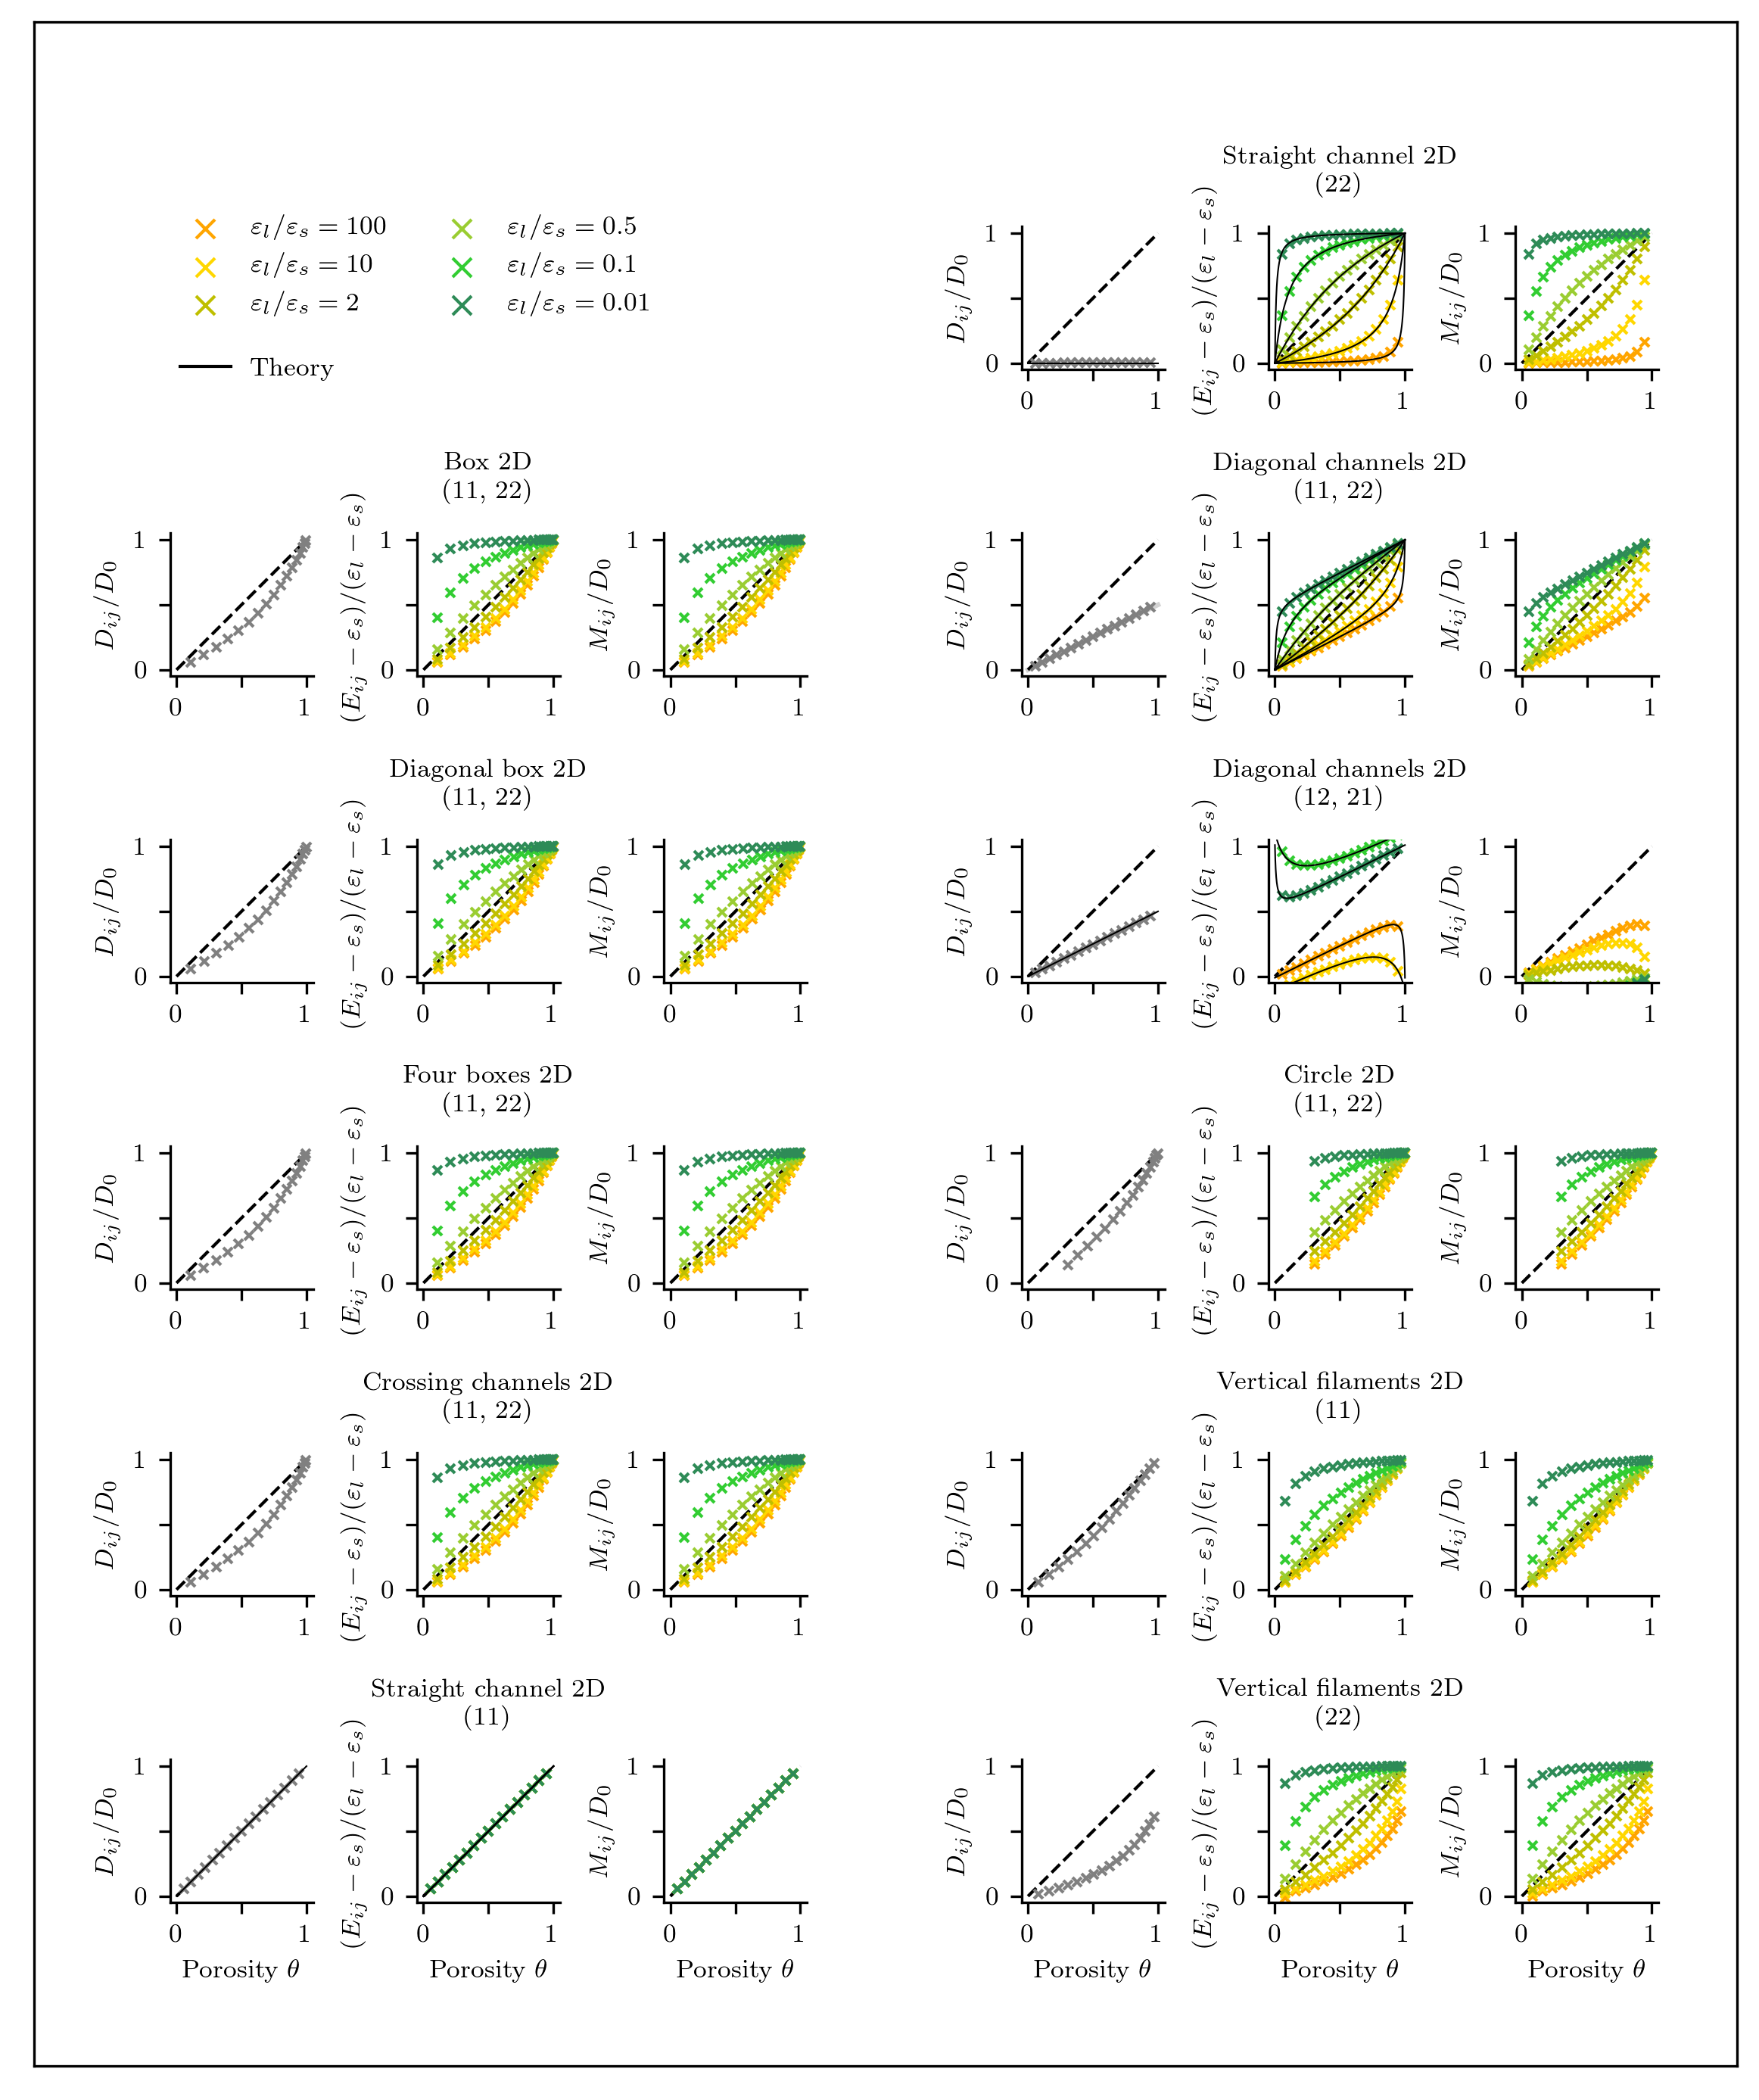

In [34]:
from plot_functions import *

def tensor_vs_porosity_subplot(fig, pos, x_data, y_data, 
                               x_ticks=[0,1], y_ticks=[0,1],
                               x_ticklabels=['0','1'], 
                               y_ticklabels=['0','1'],
                               x_label='', y_label=''):
    sub = fig.add_axes(pos)
    
    if len(x_data) == 1 and len(x_data) == 1:  # Diffusion Tensor
        colors = ['grey']
    elif len(x_data) == 6 and len(x_data) == 6:  # E or P tensor
        colors = [ 'orange', 'gold','y', 
                           'yellowgreen', 'limegreen', 'seagreen']
    else: 
        raise AssertionError('unexpected size of input data')
    # diagonal line
    sub.plot([0.,1.],[0.,1.], '--', color='black', lw=1.)
    
    for i in range(len(x_data)):
        x = x_data[i]
        y = y_data[i]
        sub.plot(x, y, 'x', c=colors[i], ms=3.)
        
    
    # style 
    sub.spines['top'].set_visible(False)
    sub.spines['right'].set_visible(False)

    sub.set_xlim([-0.05, 1.05])   
    sub.set_ylim([-0.05, 1.05])   
    
    sub.set_xticks(x_ticks)
    sub.set_yticks(y_ticks)
    
    sub.set_xticklabels(x_ticklabels, fontsize=8)
    sub.set_yticklabels(y_ticklabels, fontsize=8)
    
    sub.set_xlabel(x_label, fontsize=8)
    sub.set_ylabel(y_label, fontsize=8)
    
    return sub
    
def plot_reference_cell_tensors(fig, pos1, pos2, pos3, porosity, 
                                d_tensor, eps_tensor, m_tensor, 
                                name='ref. cell', 
                                make_xlabel=True,
                                make_ylabel=True,
                                make_xticklabels=True,
                                make_yticklabels=True):
    
    # TODO MAKE TITLE
    x_title = pos2[0] + 0.5 * pos2[2] # x + 0.5 * wx
    y_title = pos2[1] + 1.25 * pos2[3] # y + 1.2 * wy
    fig.text(x_title, y_title, name, ha='center', fontsize=8)
    
    ###
    x_ticks = [0., 0.5, 1.]
    y_ticks = [0., 0.5, 1.]
    
    ###
    if make_xticklabels == True:
        x_ticklabels = ['0', '', '1']
    else : 
        x_ticklabels = ['','','']
    
    ###
    if make_yticklabels == True:
        y_ticklabels = ['0', '', '1']
    else : 
        y_ticklabels = ['','','']
    
    ###
    if make_xlabel == True:
        x_label = r'Porosity $\theta$'
    else:
        x_label = ''
    
    ###
    # diffusion tensor
    d_xvals = [porosity[0]]
    d_yvals = [d_tensor[0]]
    if make_ylabel == True:
        y_label = r'$D_{ij} / D_0$ '
    else:
        y_label = ''
    sub1 = tensor_vs_porosity_subplot(fig=fig, pos=pos1, 
                               x_data=d_xvals, 
                               y_data=d_yvals,
                               x_ticks=x_ticks, y_ticks=y_ticks,
                               x_ticklabels=x_ticklabels, 
                               y_ticklabels=y_ticklabels,
                               x_label=x_label, y_label=y_label)
    ###
    # permittivity tensor
    eps_xvals = porosity
    eps_yvals = eps_tensor
    if make_ylabel == True:
        y_label = r'($E_{ij}-\varepsilon_s$)/($\varepsilon_l - \varepsilon_s$)'#' [a. u.]'
    else:
        y_label = ''
    sub2 = tensor_vs_porosity_subplot(fig=fig, pos=pos2, 
                               x_data=eps_xvals, 
                               y_data=eps_yvals,
                               x_ticks=x_ticks, y_ticks=y_ticks,
                               x_ticklabels=x_ticklabels, 
                               y_ticklabels=y_ticklabels,
                               x_label=x_label, y_label=y_label)
    ###
    # diffusion tensor
    m_xvals = porosity
    m_yvals = m_tensor
    if make_ylabel == True:
        y_label = r'$M_{ij} / D_0$'
    else:
        y_label = ''
    sub3 = tensor_vs_porosity_subplot(fig=fig, pos=pos3, 
                               x_data=m_xvals, 
                               y_data=m_yvals,
                               x_ticks=x_ticks, y_ticks=y_ticks,
                               x_ticklabels=x_ticklabels, 
                               y_ticklabels=y_ticklabels,
                               x_label=x_label, y_label=y_label)
    
    #################
    # theory
    line_col = 'black'
    lw = .5
    zorder=100
    
    if name == 'Straight channel 2D \n(11)':

        sub1.plot(straight_channel_theory_diffusion('11')[0], straight_channel_theory_diffusion('11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(100., 1., component='11')[0],
                  straight_channel_theory_permittivity(100., 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(10., 1., component='11')[0],
                  straight_channel_theory_permittivity(10., 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(2., 1., component='11')[0],
                  straight_channel_theory_permittivity(2., 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.5, 1., component='11')[0],
                  straight_channel_theory_permittivity(0.5, 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.1, 1., component='11')[0],
                  straight_channel_theory_permittivity(0.1, 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.01, 1., component='11')[0],
                  straight_channel_theory_permittivity(0.01, 1., component='11')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
    if name == 'Straight channel 2D \n(22)':
        sub1.plot(straight_channel_theory_diffusion('22')[0], straight_channel_theory_diffusion('22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(100., 1., component='22')[0],
                  straight_channel_theory_permittivity(100., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(10., 1., component='22')[0],
                  straight_channel_theory_permittivity(10., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(2., 1., component='22')[0],
                  straight_channel_theory_permittivity(2., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.5, 1., component='22')[0],
                  straight_channel_theory_permittivity(0.5, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.1, 1., component='22')[0],
                  straight_channel_theory_permittivity(0.1, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(straight_channel_theory_permittivity(0.01, 1., component='22')[0],
                  straight_channel_theory_permittivity(0.01, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
   
    if name == 'Diagonal channels 2D \n(11, 22)':
        sub1.plot(diagonal_channel_theory_diffusion('22')[0], diagonal_channel_theory_diffusion('22')[1], 
                  color='lightgrey', linestyle='-', zorder=-100)
        sub2.plot(diagonal_channel_theory_permittivity(100., 1., component='22')[0],
                  diagonal_channel_theory_permittivity(100., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(10., 1., component='22')[0],
                  diagonal_channel_theory_permittivity(10., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(2., 1., component='22')[0],
                  diagonal_channel_theory_permittivity(2., 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.5, 1., component='22')[0],
                  diagonal_channel_theory_permittivity(0.5, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.1, 1., component='22')[0],
                  diagonal_channel_theory_permittivity(0.1, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.01, 1., component='22')[0],
                  diagonal_channel_theory_permittivity(0.01, 1., component='22')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
    
    if name == 'Diagonal channels 2D \n(12, 21)':
        sub1.plot(diagonal_channel_theory_diffusion('21')[0], diagonal_channel_theory_diffusion('21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(100., 1., component='21')[0],
                  diagonal_channel_theory_permittivity(100., 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(10., 1., component='21')[0],
                  diagonal_channel_theory_permittivity(10., 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(2., 1., component='21')[0],
                  diagonal_channel_theory_permittivity(2., 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.5, 1., component='21')[0],
                  diagonal_channel_theory_permittivity(0.5, 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.1, 1., component='21')[0],
                  diagonal_channel_theory_permittivity(0.1, 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)
        sub2.plot(diagonal_channel_theory_permittivity(0.01, 1., component='21')[0],
                  diagonal_channel_theory_permittivity(0.01, 1., component='21')[1], 
                  color=line_col, linestyle='-', zorder=zorder, lw=lw)


    
################################################
fig = plt.figure(figsize=(7.5,9.), dpi=300)


file_ids = ['box_in_a_box_2d',
         'diagonal_box_in_box_2d',
         'four_boxes_in_a_box_2d',
         'crossing_channels_2d',
         'straight_channel_2d',
         'straight_channel_2d_22',
         'diagonal_channels_2d',
         'diagonal_channels_2d_12',
         # diagonal_channels_2d_21#
         # diagonal_channels_2d_22
         'circle_in_a_box_2d',
         'vertical_filaments_2d',
         'vertical_filaments_2d_22',
] 
names = [
    'Box 2D \n(11, 22)',
    'Diagonal box 2D \n(11, 22)',
     'Four boxes 2D \n(11, 22)',
         'Crossing channels 2D \n(11, 22)',
         'Straight channel 2D \n(11)',
         'Straight channel 2D \n(22)',
         'Diagonal channels 2D \n(11, 22)',
         'Diagonal channels 2D \n(12, 21)',
         # diagonal_channels_2d_21#
         # diagonal_channels_2d_22
         'Circle 2D \n(11, 22)',
         'Vertical filaments 2D \n(11)',
         'Vertical filaments 2D \n(22)',
]

for fi, gm in enumerate(file_ids): 

    
    wy = 0.07
    wx = 0.07 * 9. / 7.5
    x_margin = 0.145 - wx
    y_margin = 0.08
    if fi < 5:
        x1 = 0.08    
        y = 0.68 - fi * (wy + y_margin)
        print(y)
    else : 
        x1 = 0.58
        y = 0.83 - (fi-5) * (wy + y_margin)
    x2 = x1 + wx + x_margin
    x3 = x2 + wx + x_margin
    
    if fi in [4, 10]:
        make_xlabel = True
    else:
        make_xlabel = False

    pos1 = [x1, y, wx, wy]
    pos2 = [x2, y, wx, wy]
    pos3 = [x3, y, wx, wy]
    

    plot_data = pickle.load(open('./../results/plot_data_' + gm + '.pcl', 'rb'))
    x_data = plot_data['pourosities']
    y_data_1 = plot_data['d']
    y_data_2 = plot_data['p']
    y_data_3 = plot_data['m']

    plot_reference_cell_tensors(fig, pos1, pos2, pos3, 
                                porosity=x_data, 
                                d_tensor=y_data_1, 
                                eps_tensor=y_data_2, 
                                m_tensor=y_data_3, 
                                name=names[fi], 
                                make_xlabel=make_xlabel,
                                make_ylabel=True,
                                make_xticklabels=True,
                                make_yticklabels=True)

    
## annotation
ax_annotate = fig.add_axes([0.,0.,1.,1.], zorder=10)
ax_annotate.set_facecolor('none')
ax_annotate.set_xticks([])
ax_annotate.set_yticks([])





import matplotlib.lines as mlines

colors = [ 'orange', 'gold','y', 
                           'yellowgreen', 'limegreen', 'seagreen']

m1 = mlines.Line2D([], [], color=colors[0], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=100$', lw=0.)
m2 = mlines.Line2D([], [], color=colors[1], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=10$', lw=0.)
m3 = mlines.Line2D([], [], color=colors[2], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=2$', lw=0.)
m4 = mlines.Line2D([], [], color=colors[3], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.5$', lw=0.)
m5 = mlines.Line2D([], [], color=colors[4], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.1$', lw=0.)
m6 = mlines.Line2D([], [], color=colors[5], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.01$', lw=0.)

black_line = mlines.Line2D([], [], color='black', marker='',markersize=10, label='Theory', lw=1.)



leg1 = ax_annotate.legend(handles=[m1,m2,m3,m4,m5,m6], loc=(0.08,0.85), frameon=False, ncol=2, fontsize=8)
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(leg1)
leg2 = ax_annotate.legend(handles=[black_line], loc=(0.08,0.82), frameon=False, ncol=1, fontsize=8)


plt.savefig('./../results/Figure4.png')
plt.savefig('./../results/Figure4.pdf')
plt.show()



  


In [73]:
################################################
fig = plt.figure(figsize=(7.5,3.3), dpi=300)

file_ids = [
    'extended_box_3d',
    'extended_box_3d',
    'crossing_filaments_3d',
    'actin_cytosceleton_3d',
] 
names = [
    'Bundles \n(11, 22)',
    'Bundles \n(33)',
    'Crosslinked \n(11, 22, 33)',
    'Cytoskeleton \n(11, 22, 33)',
]

for fi, gm in enumerate(file_ids): 

    wx = 0.1
    wy = wx * 7.5 / 3.3
    x_margin = 0.16 - wx
    y_margin = 0.19

    
    if fi < 2:
        x1 = 0.05    
        y = 0.61 - fi * (wy + y_margin)
        print(y)
    else : 
        x1 = 0.56
        y = 0.61 - (fi-2) * (wy + y_margin)
    x2 = x1 + wx + x_margin
    x3 = x2 + wx + x_margin
    
    if fi in [4, 10]:
        make_xlabel = True
    else:
        make_xlabel = False

    pos1 = [x1, y, wx, wy]
    pos2 = [x2, y, wx, wy]
    pos3 = [x3, y, wx, wy]
    

    plot_data = pickle.load(open('./../results/plot_data_' + gm + '.pcl', 'rb'))
    x_data = plot_data['pourosities']
    y_data_1 = plot_data['d']
    y_data_2 = plot_data['p']
    y_data_3 = plot_data['m']

    plot_reference_cell_tensors(fig, pos1, pos2, pos3, 
                                porosity=x_data, 
                                d_tensor=y_data_1, 
                                eps_tensor=y_data_2, 
                                m_tensor=y_data_3, 
                                name=names[fi], 
                                make_xlabel=make_xlabel,
                                make_ylabel=True,
                                make_xticklabels=True,
                                make_yticklabels=True)

    
## annotation
ax_annotate = fig.add_axes([0.,0.,1.,1.], zorder=10)
ax_annotate.set_facecolor('none')
ax_annotate.set_xticks([])
ax_annotate.set_yticks([])





import matplotlib.lines as mlines

colors = [ 'orange', 'gold','y', 
                           'yellowgreen', 'limegreen', 'seagreen']

m1 = mlines.Line2D([], [], color=colors[0], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=100$', lw=0.)
m2 = mlines.Line2D([], [], color=colors[1], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=10$', lw=0.)
m3 = mlines.Line2D([], [], color=colors[2], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=2$', lw=0.)
m4 = mlines.Line2D([], [], color=colors[3], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.5$', lw=0.)
m5 = mlines.Line2D([], [], color=colors[4], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.1$', lw=0.)
m6 = mlines.Line2D([], [], color=colors[5], marker='x',markersize=6, label=r'$\varepsilon_l / \varepsilon_s=0.01$', lw=0.)

leg = ax_annotate.legend(handles=[m1,m2,m3,m4,m5,m6], loc=(0.08,0.02), frameon=False, ncol=6, fontsize=8)


plt.savefig('./../results/Figure5.png')
plt.savefig('./../results/Figure5.pdf')
plt.show()



0.61


NameError: name 'plot_reference_cell_tensors' is not defined

<Figure size 2250x990 with 0 Axes>

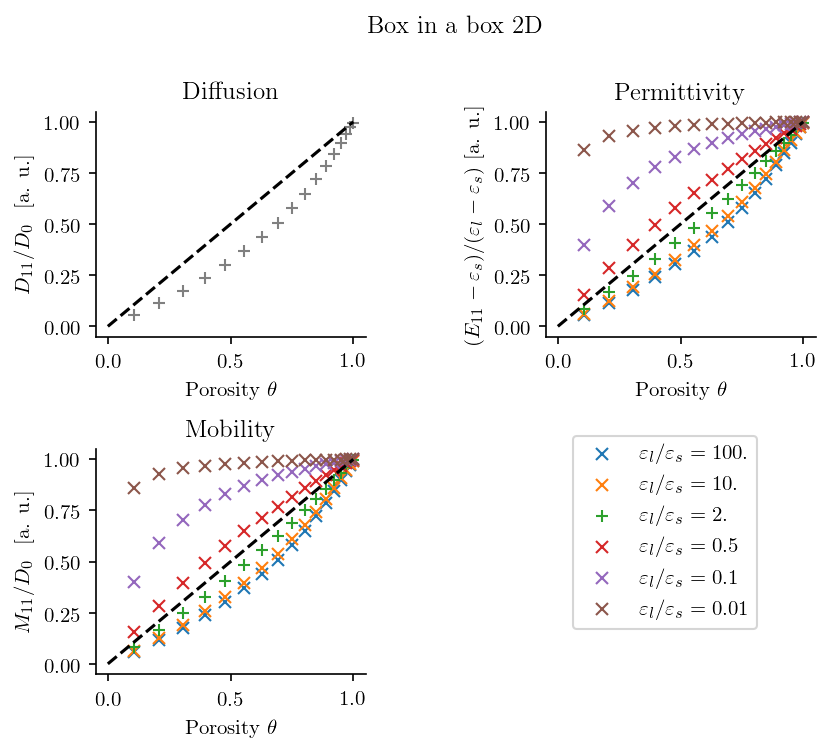

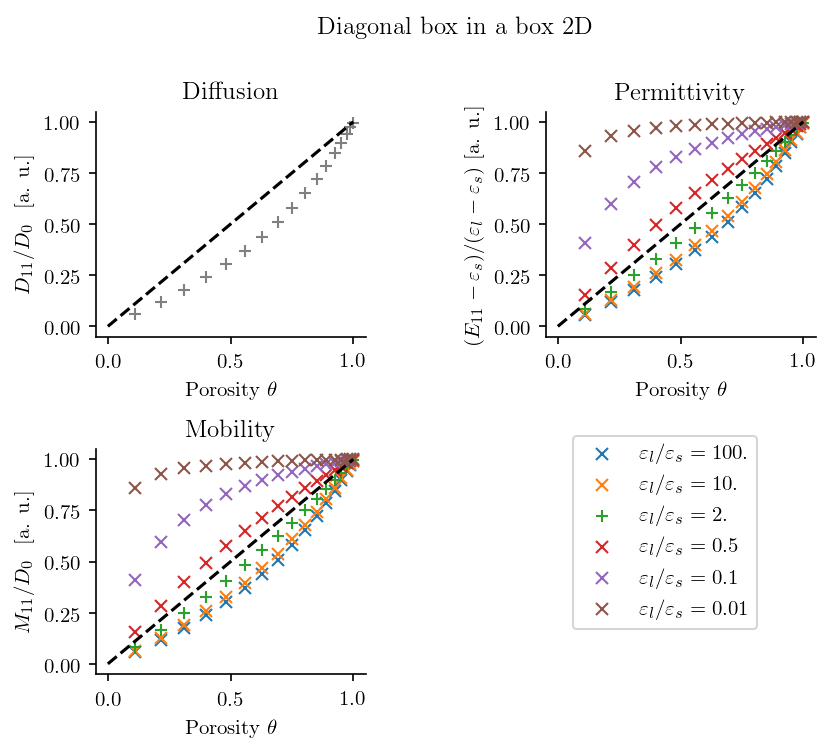

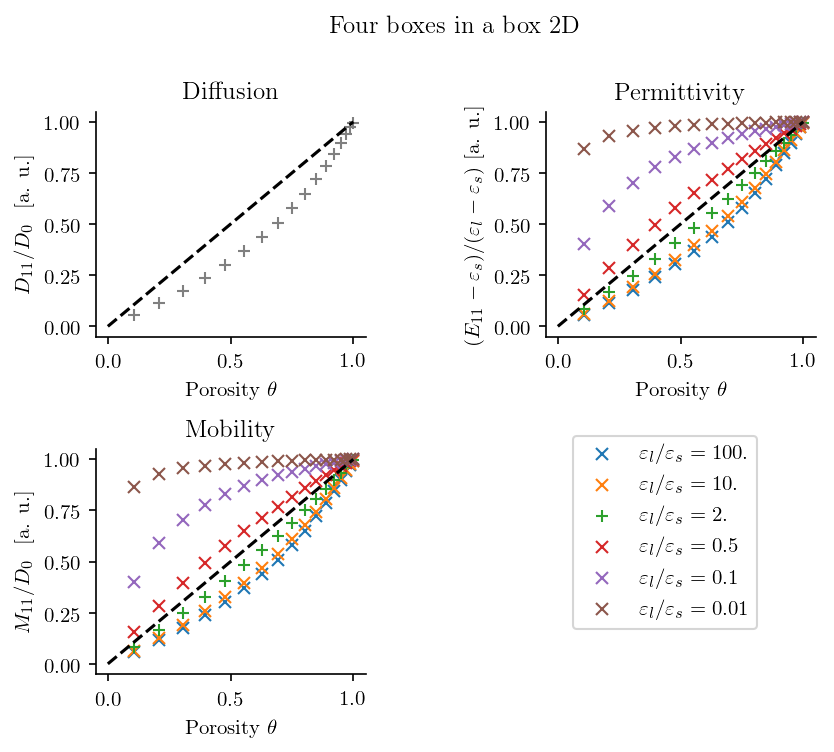

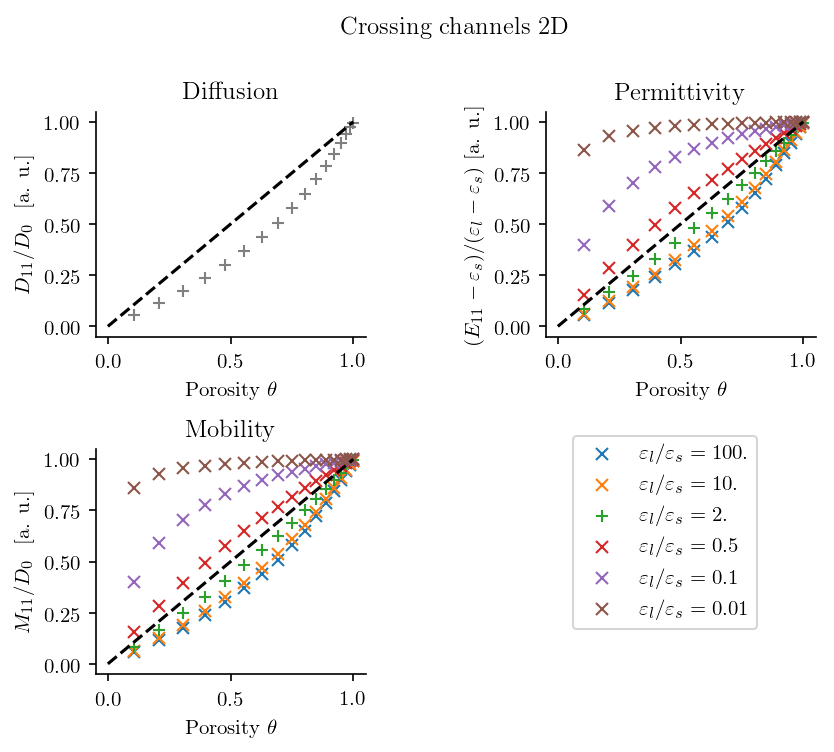

In [12]:
importlib.reload(pf)
pos1 = [0.1, 0.55, 0.3, 0.3]
pos2 = [0.6, 0.55, 0.3, 0.3]
pos3 = [0.1, 0.1, 0.3, 0.3]
pos_legend = (0.1, -1.3)

fig_2D_res_1 = plt.figure(figsize=(6.,  5.), dpi=150)

gm = 'box_in_a_box_2d'
plot_data = pickle.load(open('./../results/plot_data_box_in_a_box_2d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_1, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Box in a box 2D', pos_legend=pos_legend)
plt.savefig('./../results/box_in_a_box_2d_11.eps')
plt.show()

fig_2D_res_2 = plt.figure(figsize=(6.,  5.), dpi=150)

gm = 'diagonal_box_in_box_2d'
plot_data = pickle.load(open('./../results/plot_data_diagonal_box_in_box_2d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_2, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Diagonal box in a box 2D', pos_legend=pos_legend)
plt.savefig('./../results/diagonal_box_in_a_box_2d_11.eps')
plt.show()

fig_2D_res_3 = plt.figure(figsize=(6.,  5.), dpi=150)

gm = 'four_boxes_in_a_box_2d'
plot_data = pickle.load(open('./../results/plot_data_four_boxes_in_a_box_2d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_3, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Four boxes in a box 2D', pos_legend=pos_legend)
plt.savefig('./../results/four_boxes_in_a_box_2d_11.eps')

plt.show()

fig_2D_res_4 = plt.figure(figsize=(6.,  5.), dpi=150)

gm = 'crossing_channels_2d'
plot_data = pickle.load(open('./../results/plot_data_crossing_channels_2d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_4, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Crossing channels 2D', pos_legend=pos_legend)
plt.savefig('./../results/crossing_channels_2d_11.eps')
plt.show()

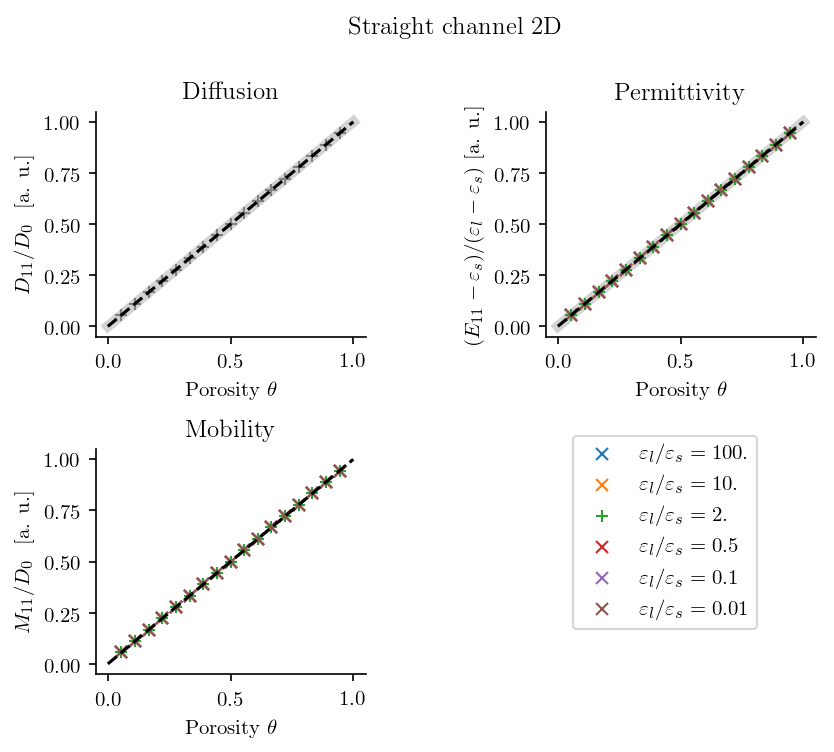

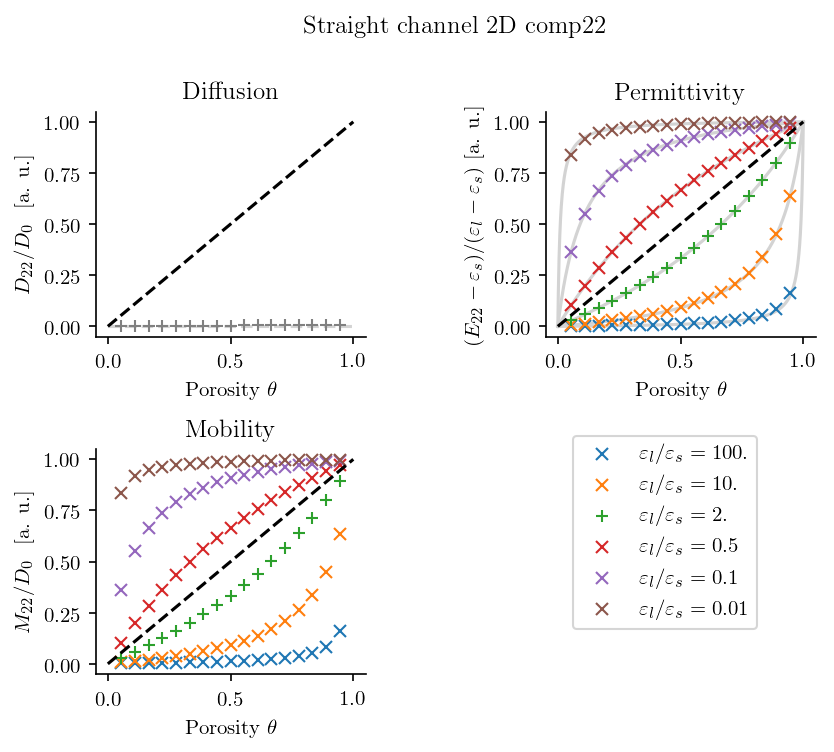

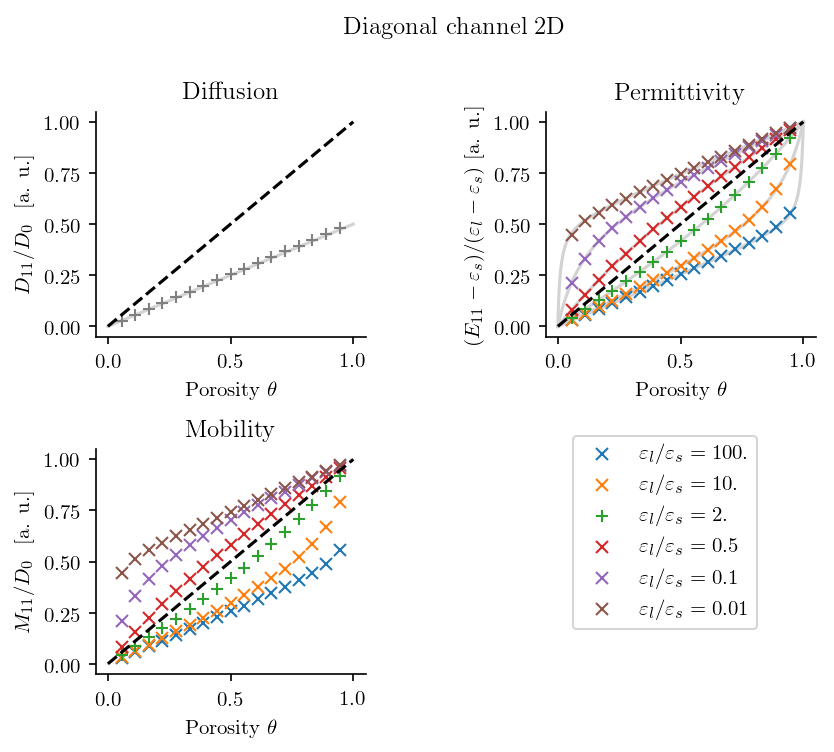

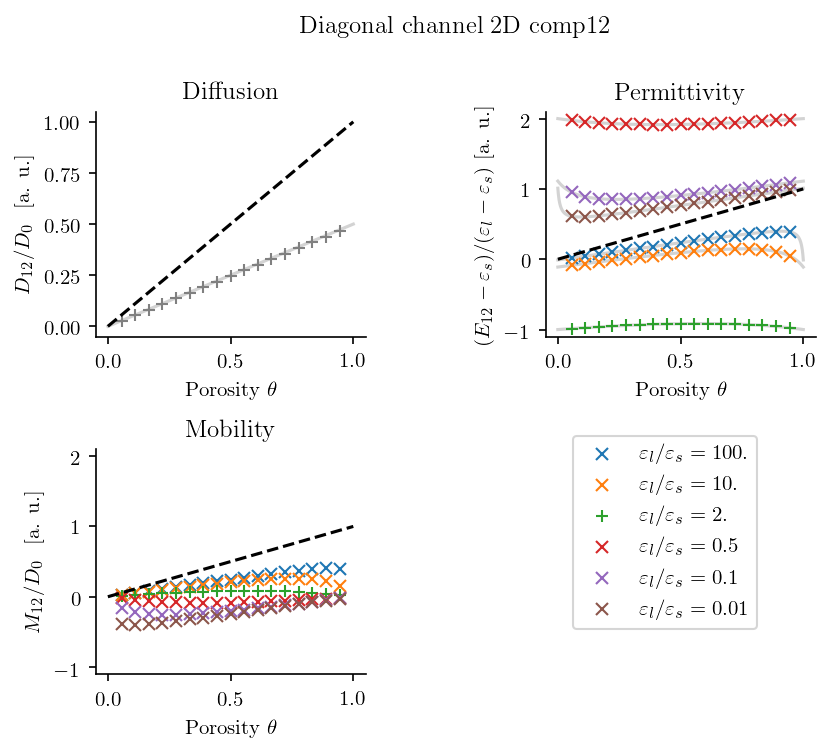

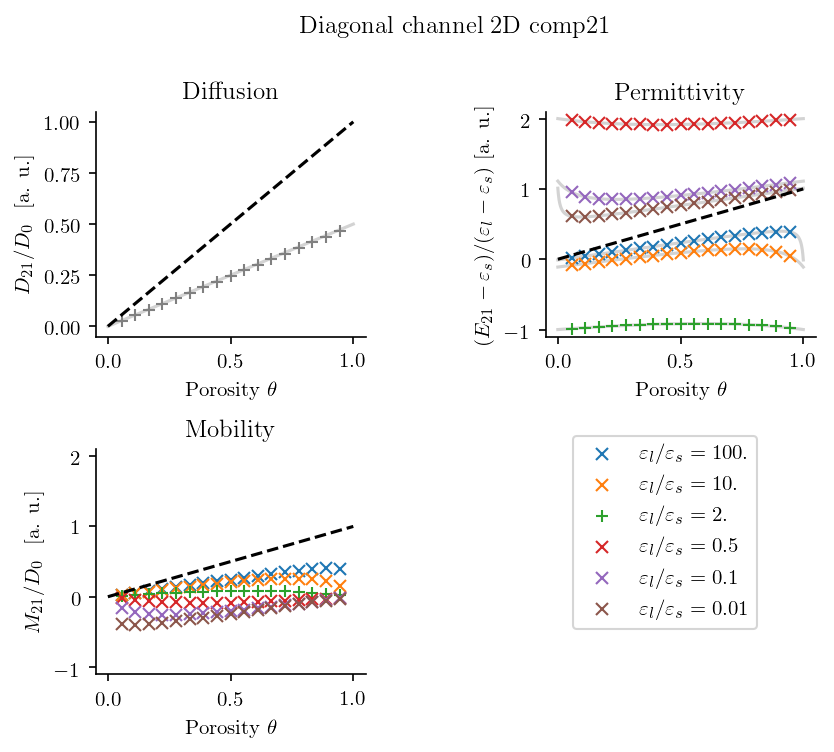

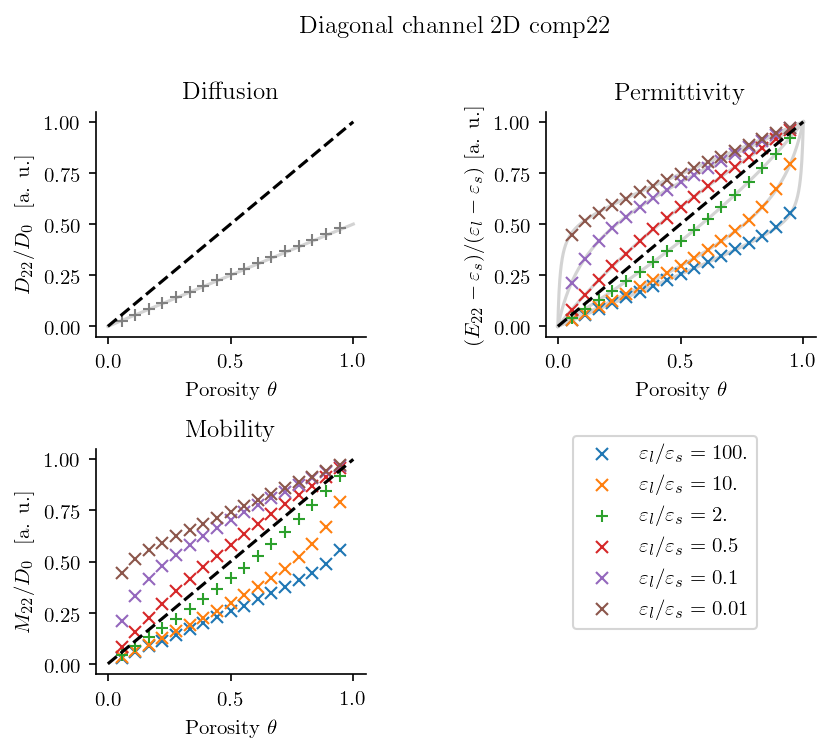

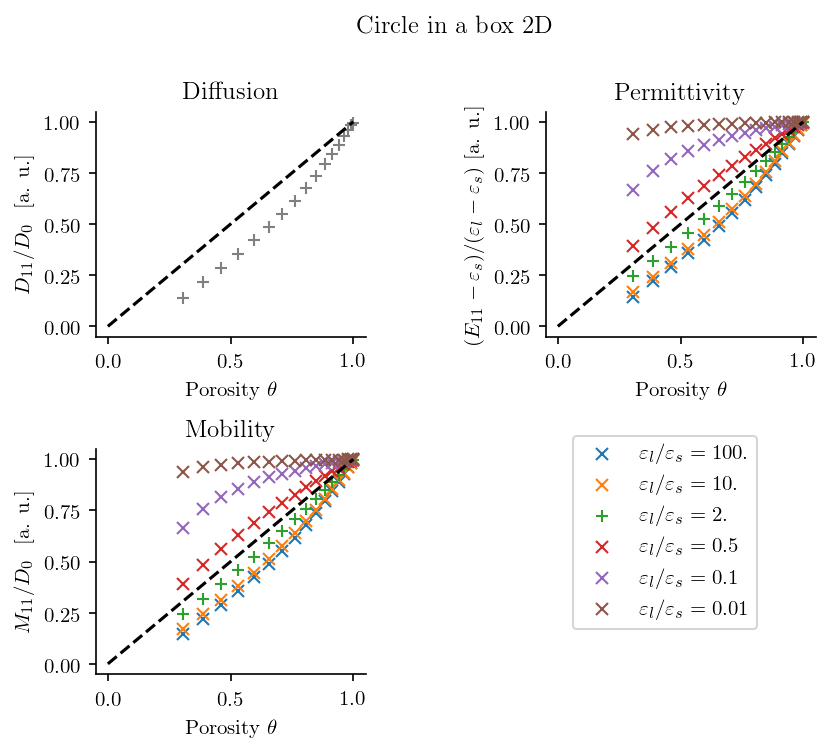

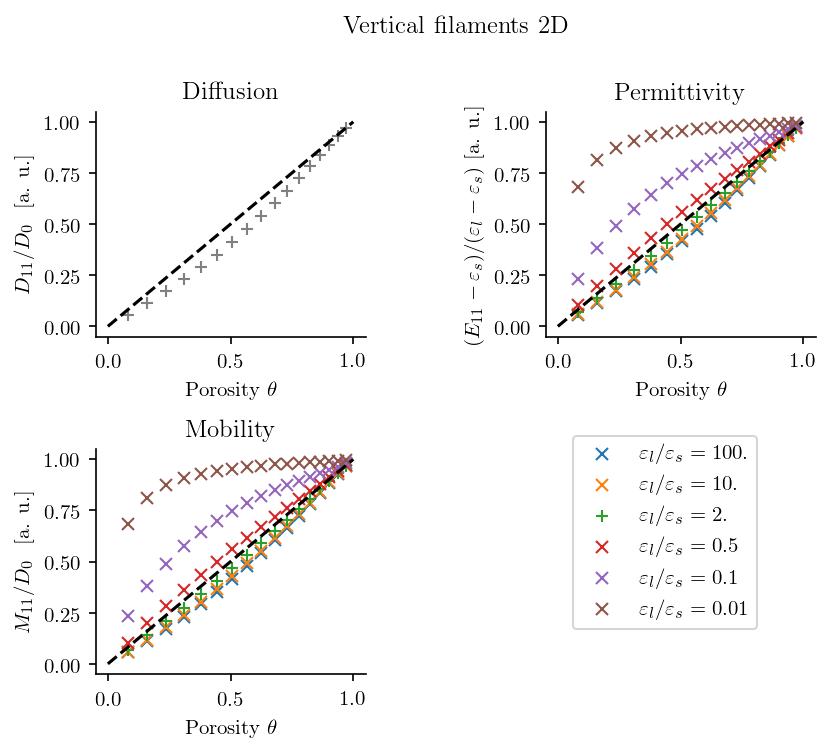

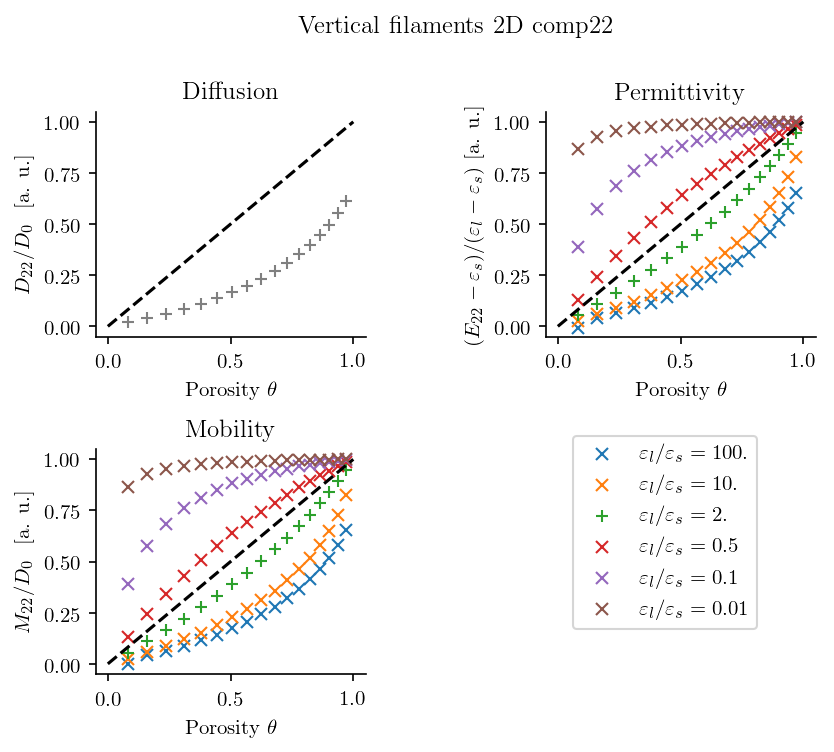

In [177]:
importlib.reload(pf)
pos1 = [0.1, 0.55, 0.3, 0.3]
pos2 = [0.6, 0.55, 0.3, 0.3]
pos3 = [0.1, 0.1, 0.3, 0.3]
pos_legend = (0.1, -1.3)

fig_2D_res_5 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_straight_channel_2d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_5, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Straight channel 2D', pos_legend=pos_legend, component='11')
plt.savefig('./../results/straight_channel_2d_11.eps')
plt.show()


fig_2D_res_6 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_straight_channel_2d_22.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_6, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Straight channel 2D comp22', pos_legend=pos_legend, component='22')
plt.savefig('./../results/straight_channel_2d_22.eps')
plt.show()

fig_2D_res_7 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_diagonal_channels_2d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

sub_temp = pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_7, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Diagonal channel 2D', pos_legend=pos_legend, component='11')

plt.savefig('./../results/diagonal_channel_2d_11.eps')
plt.show()



fig_2D_res_8 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_diagonal_channels_2d_12.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_8, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Diagonal channel 2D comp12', pos_legend=pos_legend, component='12')
plt.savefig('./../results/diagonal_channel_2d_12.eps')

plt.show()


fig_2D_res_9 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_diagonal_channels_2d_21.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_9, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Diagonal channel 2D comp21', pos_legend=pos_legend, component='21')
plt.savefig('./../results/diagonal_channel_2d_21.eps')

plt.show()


fig_2D_res_10 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_diagonal_channels_2d_22.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_10, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Diagonal channel 2D comp22', pos_legend=pos_legend, component='22')
plt.savefig('./../results/diagonal_channel_2d_22.eps')

plt.show()


fig_2D_res_11 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_circle_in_a_box_2d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_11, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Circle in a box 2D', pos_legend=pos_legend)
plt.savefig('./../results/circle_in_a_box_2d_11.eps')

plt.show()

fig_2D_res_12 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_vertical_filaments_2d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_12, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Vertical filaments 2D', pos_legend=pos_legend)
plt.savefig('./../results/vertical_filaments_2d_11.eps')

plt.show()

fig_2D_res_13 = plt.figure(figsize=(6.,  5.), dpi=150)

plot_data = pickle.load(open('./../results/plot_data_vertical_filaments_2d_22.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_2D_res_13, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Vertical filaments 2D comp22', pos_legend=pos_legend, component='22')

plt.savefig('./../results/vertical_filaments_2d_22.eps')

plt.show()

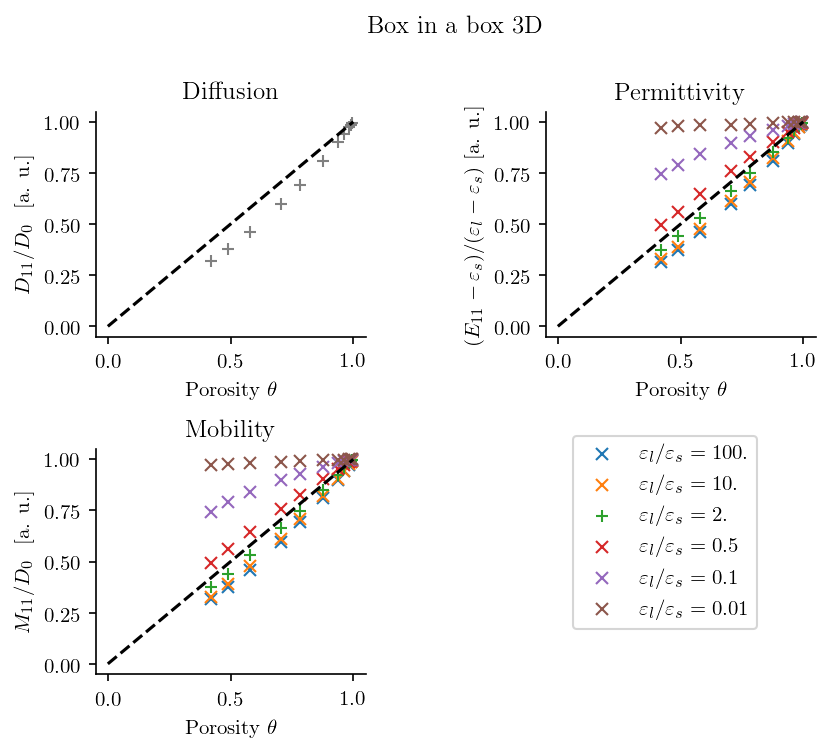

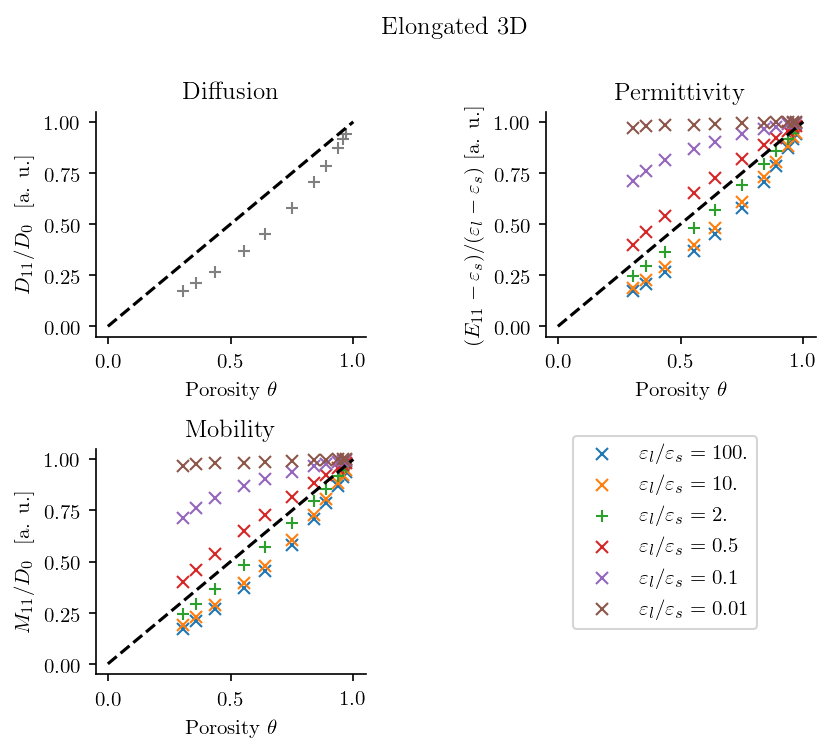

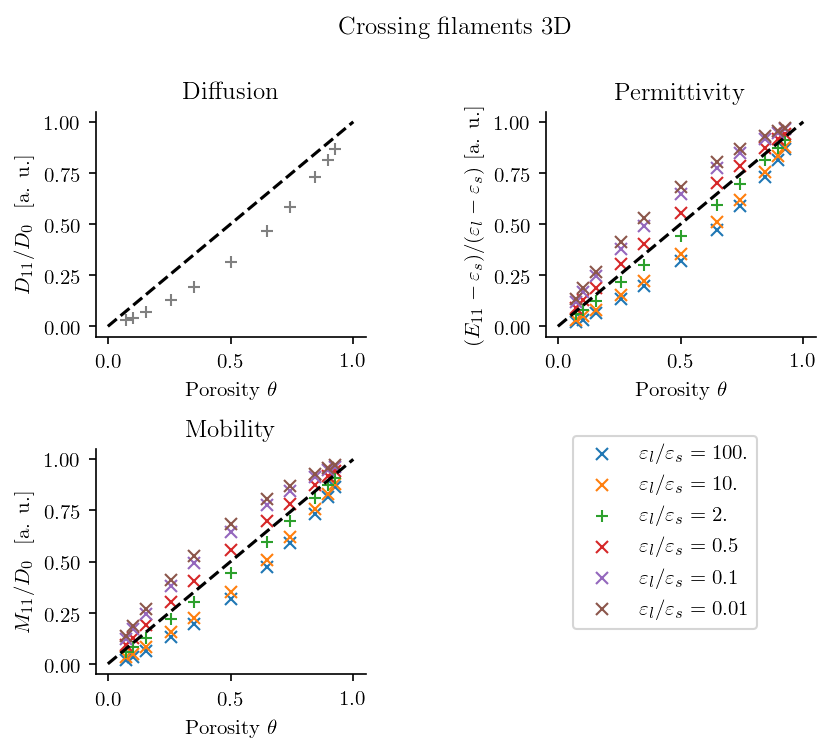

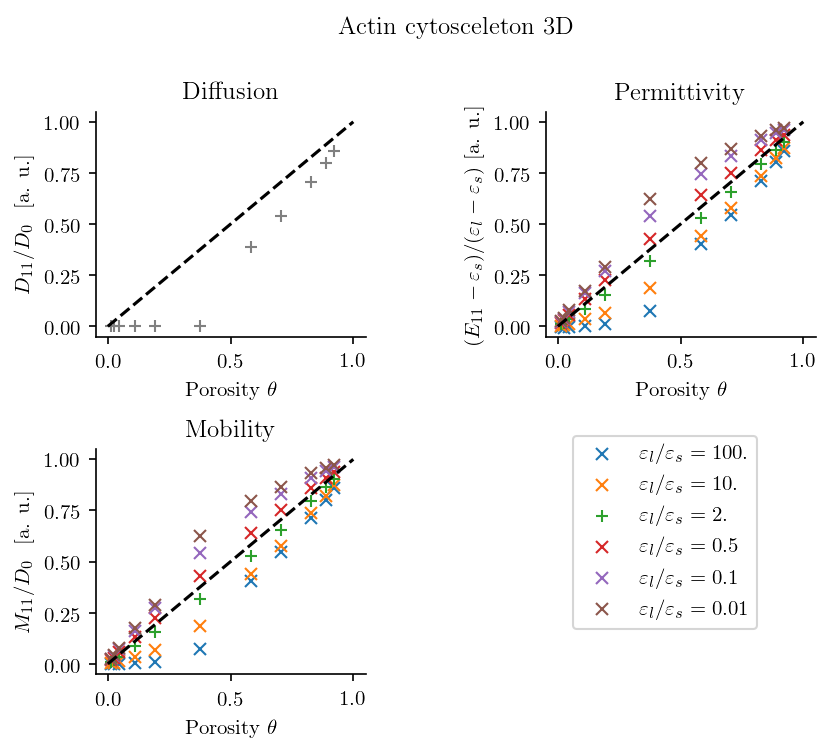

In [179]:
importlib.reload(pf)
pos1 = [0.1, 0.55, 0.3, 0.3]
pos2 = [0.6, 0.55, 0.3, 0.3]
pos3 = [0.1, 0.1, 0.3, 0.3]
pos_legend = (0.1, -1.3)



fig_3D_res_1 = plt.figure(figsize=(6.,  5.), dpi=150)

gm = 'box_in_a_box_3d'
plot_data = pickle.load(open('./../results/plot_data_box_in_a_box_3d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_3D_res_1, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Box in a box 3D', pos_legend=pos_legend)
plt.savefig('./../results/box_in_a_box_3d_11.eps')
plt.show()


fig_3D_res_2 = plt.figure(figsize=(6.,  5.), dpi=150)

gm = 'extended_box_3d'
plot_data = pickle.load(open('./../results/plot_data_extended_box_3d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_3D_res_2, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Elongated 3D', pos_legend=pos_legend)
plt.savefig('./../results/elongated_box_3d_11.eps')

plt.show()

fig_3D_res_3 = plt.figure(figsize=(6.,  5.), dpi=150)

gm = 'crossing_filaments_3d'
plot_data = pickle.load(open('./../results/plot_data_crossing_filaments_3d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_3D_res_3, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Crossing filaments 3D', pos_legend=pos_legend)
plt.savefig('./../results/crossing_filaments_3d_11.eps')

plt.show()

fig_3D_res_4 = plt.figure(figsize=(6.,  5.), dpi=150)

gm = 'actin_cytosceleton_3d'
plot_data = pickle.load(open('./../results/plot_data_actin_cytosceleton_3d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors_with_mobility(fig_3D_res_4, pos1, pos2, pos3, 
                                        x_data, y_data_1, x_data, y_data_2, x_data, y_data_3, 
                                        title='Actin cytosceleton 3D', pos_legend=pos_legend)
plt.savefig('./../results/actin_cytosceleton_3d_11.eps')

plt.show()


In [4]:
gm = 'perturbed_channel_2d'  

res_d = []
y_data_d = []
res_m = []
y_data_m = []
res_p = []
y_data_p = []
eps_1_p = []
eps_1_m = []
eps_2_p = []
eps_2_m = []

for r in results:
    if r[0] == gm: 
        pourosity = r[9]

        num_cells = r[3]*r[4]*2
        num_cells_liquid = r[3]*r[4]*2*pourosity

       
        D = r[6][(0,0)]
        res_d.append(num_cells_liquid)
        y_data_d.append(D)


eps_list = [1.0,2.0,4.0,8.0,16.0,32.0,64.0,128.0]

eps_combis = [[i,j]for i in eps_list for j in eps_list]



temp_data = {str(eps_combi): {'d':[[],[]], 'p':[[],[]], 'm':[[],[]]} for eps_combi in eps_combis}


for r in results:
    if r[0] == gm:        
        pourosity = r[9]
        print(pourosity)
        num_cells = r[3]*r[4]*2
        num_cells_liquid = r[3]*r[4]*2*pourosity

       
        D = r[6][(0,0)]
        P = r[7][(0,0)]
        M = r[8][(0,0)]
       

        eps_l = r[1]
        eps_s = r[2]
        eps_combi = [eps_l, eps_s]
        
        temp_data[str(eps_combi)]['d'][0].append(num_cells_liquid)
        temp_data[str(eps_combi)]['d'][1].append(D)
        temp_data[str(eps_combi)]['p'][0].append(num_cells)
        temp_data[str(eps_combi)]['p'][1].append((P-eps_s)/(eps_l-eps_s))
        temp_data[str(eps_combi)]['m'][0].append(num_cells_liquid)
        temp_data[str(eps_combi)]['m'][1].append(M)

show_linefits = True
if show_linefits == True:
    for eps_combi in eps_combis:

        if eps_combi[0] != eps_combi[1]:

            tmp=temp_data[str(eps_combi)]

            fig_tmp = plt.figure(figsize=(7.5,  3.), dpi=150)
            pos_p = [0.1, 0.1, 0.3, 0.8]
            pos_m = [0.6, 0.1, 0.3, 0.8]

            lim_p = pf.plot_correction_tensor_regression_line(fig_tmp, pos_p, tmp['p'][0], tmp['p'][1], 
                                                      title='Permittivity', eps_l=eps_combi[0])
            lim_m = pf.plot_correction_tensor_regression_line(fig_tmp, pos_m, tmp['m'][0], tmp['m'][1], 
                                                              title='Mobility', eps_l=eps_combi[0])

            res_p.append(eps_combi[1]/eps_combi[0])
            y_data_p.append(lim_p)
            res_m.append(eps_combi[1]/eps_combi[0])
            y_data_m.append(lim_m)
            eps_1_p.append(eps_combi[0])
            eps_1_m.append(eps_combi[0])
            eps_2_p.append(eps_combi[1])
            eps_2_m.append(eps_combi[1])

            fig_tmp.text(0.1, 0.9, 'Permittivity' , fontsize=10)
            fig_tmp.text(0.6, 0.9, 'Mobility', fontsize=10)

            fig_tmp.suptitle('Perturbed channel epsS '+str(eps_combi[1]))
            #fig_tmp.savefig('./../results/reg_lines_3d/' + gm + '_'+str(eps_combi)+'.png')
            #plt.show()
            plt.close()
    






0.4747474747474794
0.474747474747456
0.4747474747475082
0.47474747474754997
0.4747474747474597
0.47474747474726475
0.47474747474783996
0.474747474747174
0.47474747474735973
0.4747474747474295
0.47474747474754675
0.4747474747475757
0.4747474747473694
0.4747474747460883
0.474747474747321
0.4747474747474794
0.474747474747456
0.4747474747475082
0.47474747474754997
0.4747474747474597
0.47474747474726475
0.47474747474783996
0.474747474747174
0.47474747474735973
0.4747474747474295
0.47474747474754675
0.4747474747475757
0.4747474747473694
0.4747474747460883
0.474747474747321
0.4747474747474794
0.474747474747456
0.4747474747475082
0.47474747474754997
0.4747474747474597
0.47474747474726475
0.47474747474783996
0.474747474747174
0.47474747474735973
0.4747474747474295
0.47474747474754675
0.4747474747475757
0.4747474747473694
0.4747474747460883
0.474747474747321
0.4747474747474794
0.474747474747456
0.4747474747475082
0.47474747474754997
0.4747474747474597
0.47474747474726475
0.47474747474783996
0.47

/home/eberhardt/anaconda2/envs/fenicsenv/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/home/eberhardt/anaconda2/envs/fenicsenv/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


In [5]:
#print(np.min(res_d))
#print(np.max(y_data_m)*0.4747474747474794)

print(temp_data['d'])

#plot_data_perturbed_channel = [res_d, y_data_d, res_p, y_data_p, res_m, y_data_m, eps_1_p, eps_2_p, eps_1_m, eps_2_m]
#pickle.dump(plot_data_perturbed_channel, open('./../results/plot_data_perturbed_channel.pcl', 'wb'))


KeyError: 'd'

In [49]:
# Method figure homogeinization
importlib.reload(pf)
gm = 'box_in_a_box_3d'

pos1 = [0.1, 0.7, 0.3, 0.2]
pos2 = [0.6, 0.7, 0.3, 0.2]
pos3 = [0.1, 0.4, 0.3, 0.2]
pos4 = [0.6, 0.4, 0.3, 0.2]
pos5 = [0.1, 0.1, 0.3, 0.2]
pos6 = [0.6, 0.1, 0.3, 0.2]

fig = plt.figure(figsize=(7., 7.), dpi=150)

pf.plot_single_correction_tensor_vs_number_of_cells(fig, pos1, res_d, y_data_d, options=['compare_auriault'])

markers = {1: "*", 2: ".", 4: "x", 8: "+", 16: "1", 32: "2", 64: "3", 128: "4"}
marker_colors = {1: "silver", 2: "firebrick", 4: "olivedrab", 8: "cyan", 16: "blueviolet", 
                 32: "steelblue", 64: "peru", 128: "gold"}

sub2 = fig.add_axes(pos2)
for i in range(int(len(res_m))):
    
    sub2.plot(res_p[i], y_data_p[i], markers[eps_1_p[i]])
sub2.set_xscale('log')
sub2.spines['top'].set_visible(False)
sub2.spines['right'].set_visible(False)
sub2.set_xlabel(r'$\varepsilon_s / \varepsilon_l$')
sub2.set_ylabel(r'$(E_{11}-\varepsilon_s) /( \varepsilon_l-\varepsilon_s)$')

sub3 = fig.add_axes(pos3)
for i in range(int(len(res_p))):
    sub3.plot(res_m[i], y_data_m[i]/0.4747474747474794, markers[eps_1_m[i]])
    if eps_1_m[i]== 128 and eps_2_m[i] == 1:
        print(y_data_m[i])
        print(y_data_m[i]/0.4747474747474794)
sub3.set_xscale('log')
sub3.spines['top'].set_visible(False)
sub3.spines['right'].set_visible(False)
sub3.set_xlabel(r'$\varepsilon_s / \varepsilon_l$')
sub3.set_ylabel(r'$M_{11} / D_0/ \theta$')


tmp = temp_data['[4.0, 64.0]']
lim_p = pf.plot_correction_tensor_regression_line(fig, pos5, tmp['p'][0], tmp['p'][1], 
                                                title='Permittivity', eps_l=4, eps_s=64,
                                                  legend_loc=(0.5, 0.5))
lim_m = pf.plot_correction_tensor_regression_line(fig, pos6, tmp['m'][0], tmp['m'][1], 
                                                title='Mobility', eps_l=4, eps_s=64, 
                                                  legend_loc=(0.45, 0.5))

patch1 = mlines.Line2D(label=r'$\varepsilon_l=1$', marker=markers[1], mfc=marker_colors[1], mec=marker_colors[1],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch2 = mlines.Line2D(label=r'$\varepsilon_l=2$', marker=markers[2], mfc=marker_colors[2], mec=marker_colors[2],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch3 = mlines.Line2D(label=r'$\varepsilon_l=4$', marker=markers[4], mfc=marker_colors[4], mec=marker_colors[4],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch4 = mlines.Line2D(label=r'$\varepsilon_l=8$', marker=markers[8], mfc=marker_colors[8], mec=marker_colors[8],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch5 = mlines.Line2D(label=r'$\varepsilon_l=16$', marker=markers[16], mfc=marker_colors[16], mec=marker_colors[16],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch6 = mlines.Line2D(label=r'$\varepsilon_l=32$', marker=markers[32], mfc=marker_colors[32], mec=marker_colors[32],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch7 = mlines.Line2D(label=r'$\varepsilon_l=64$', marker=markers[64], mfc=marker_colors[64], mec=marker_colors[64],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)
patch8 = mlines.Line2D(label=r'$\varepsilon_l=128$', marker=markers[128], mfc=marker_colors[128], 
                       mec=marker_colors[128],
                       color='red', xdata=[0,0], ydata=[0,0], linewidth=0)



leg = fig.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
                   loc=(0.65, 0.42), fontsize=8, )
leg.get_frame().set_linewidth(0.0)

fig.text(0.05, 0.92, 'A', fontsize=12)
fig.text(0.55, 0.92, 'B', fontsize=12)
fig.text(0.05, 0.62, 'C', fontsize=12)
fig.text(0.05, 0.32, 'D', fontsize=12)
fig.text(0.55, 0.32, 'E', fontsize=12)

plt.savefig('./../results/perturbed_channel.eps')

plt.show()

RuntimeError: latex was not able to process the following string:
b'\\\\n$\\\\varepsilon_s=$64'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode

(/home/eberhardt/.cache/matplotlib/tex.cache/2867c709ae014a6ea496b8a782511cb9.t
ex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 2867c709ae014a6ea496b8a782511cb9.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.14 \fontsize{6.000000}{7.500000}{\rmfamily \n
                                               $\varepsilon_s=$64}
No pages of output.
Transcript written on 2867c709ae014a6ea496b8a782511cb9.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fda4b7b77b8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'\\\\n$\\\\varepsilon_s=$64'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode

(/home/eberhardt/.cache/matplotlib/tex.cache/2867c709ae014a6ea496b8a782511cb9.t
ex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./2867c709ae014a6ea496b8a782511cb9.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.14 \fontsize{6.000000}{7.500000}{\rmfamily \n
                                               $\varepsilon_s=$64}
No pages of output.
Transcript written on 2867c709ae014a6ea496b8a782511cb9.log.




RuntimeError: latex was not able to process the following string:
b'\\\\n$\\\\varepsilon_s=$64'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode

(/home/eberhardt/.cache/matplotlib/tex.cache/2867c709ae014a6ea496b8a782511cb9.t
ex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./2867c709ae014a6ea496b8a782511cb9.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.14 \fontsize{6.000000}{7.500000}{\rmfamily \n
                                               $\varepsilon_s=$64}
No pages of output.
Transcript written on 2867c709ae014a6ea496b8a782511cb9.log.




<Figure size 1050x1050 with 5 Axes>

# Paper Figure - Main results homogeinization

0.18333333333333335 0.28205128205128205
[0.11666666666666665, 0.1282051282051282, 0.18333333333333335, 0.28205128205128205] [0.11666666666666665, 0.4615384615384615, 0.18333333333333335, 0.28205128205128205]


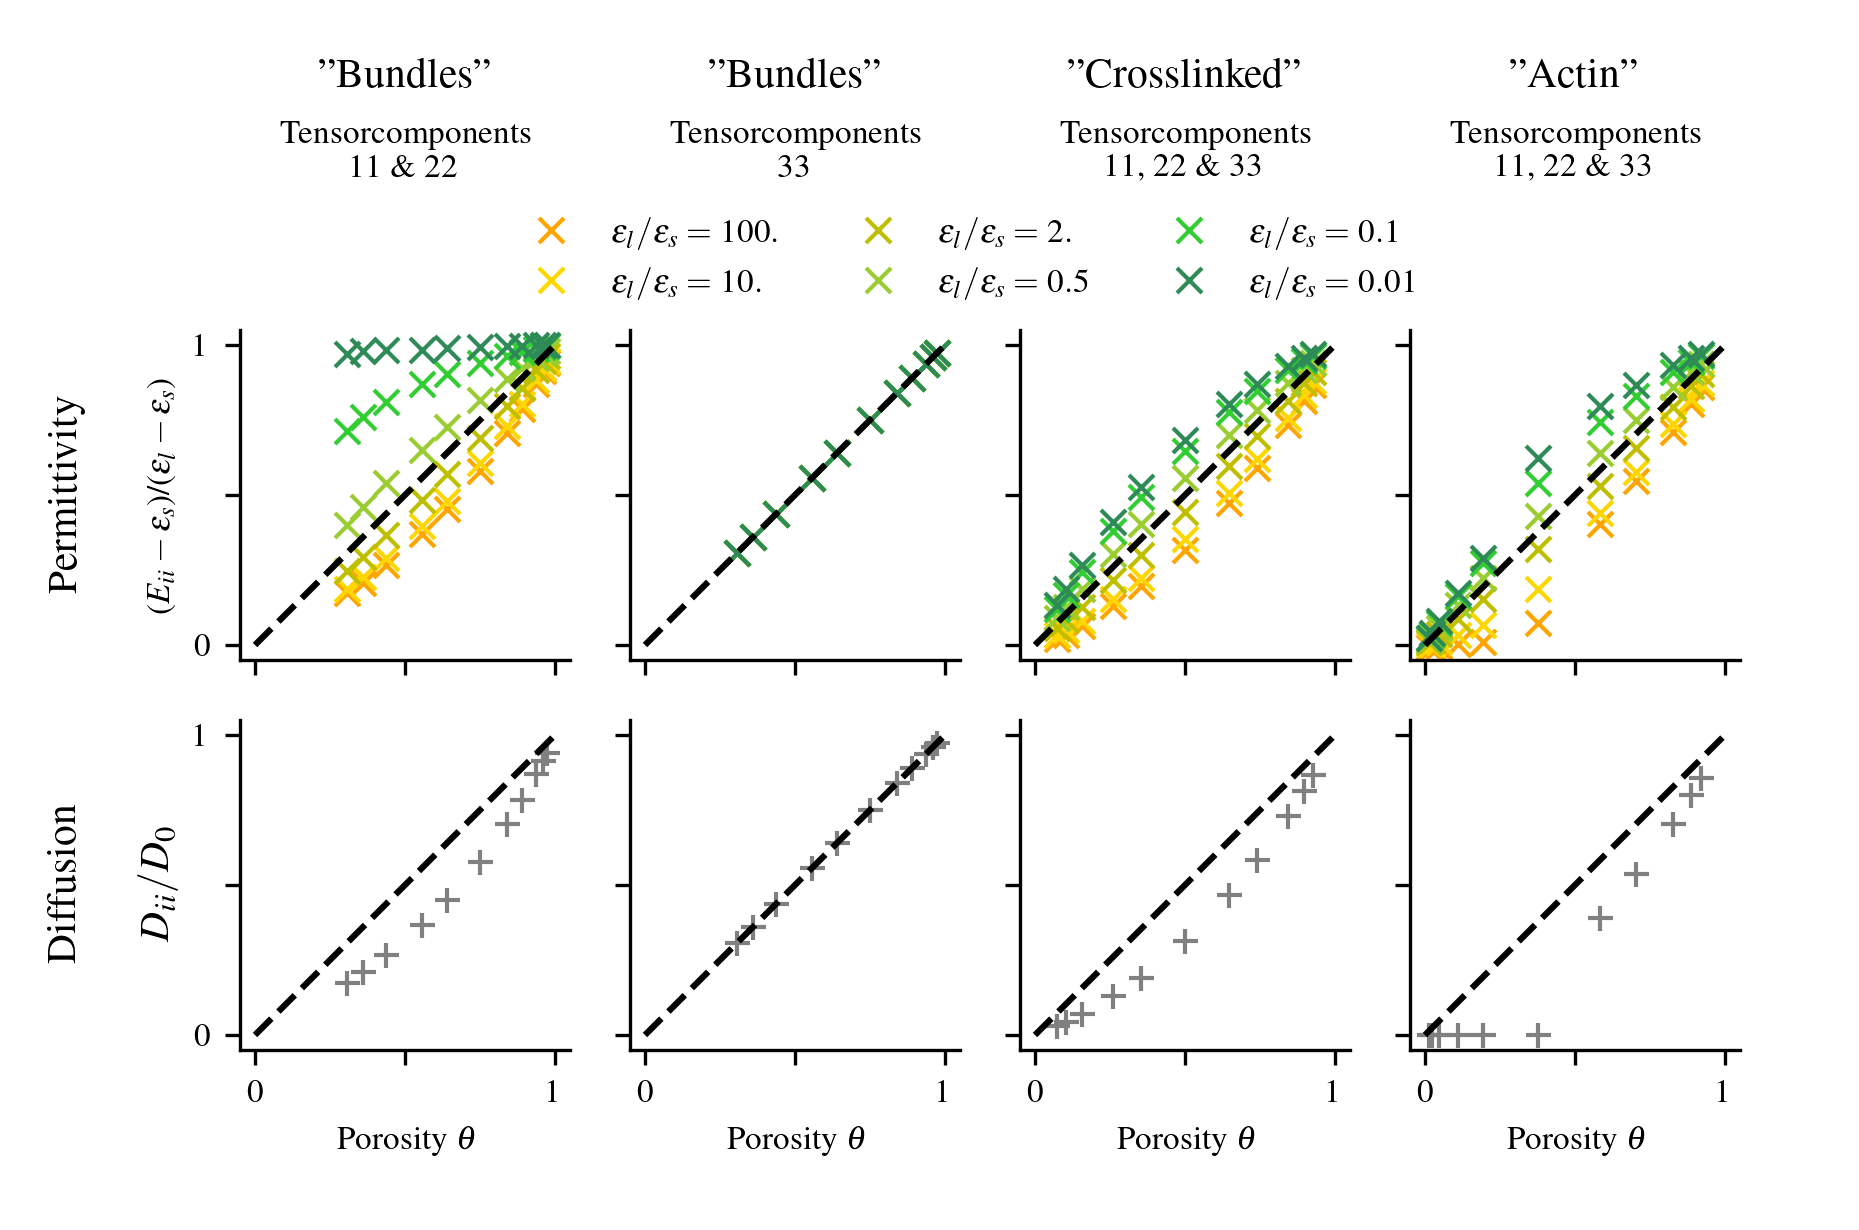

In [3]:
importlib.reload(pf)

colors = [ 'orange', 'gold','y', 'yellowgreen', 'limegreen', 'seagreen']


fig_width = 6.


margin_left = 0.7
margin_right = 0.3
margin_top = 1.0 
margin_bottom = 0.5
margin_c = 0.2 
margin_l = 0.2 

dx_abs = (fig_width - 3 * margin_c - margin_left - margin_right) / 4
dy_abs = dx_abs # (fig_height - margin_top - margin_bottom - margin_l)  / 2

fig_height = margin_bottom + margin_top + margin_l + 2 * dy_abs

x1 = margin_left / fig_width
x2 = (margin_left + margin_c + dx_abs) / fig_width
x3 = (margin_left + 2 * margin_c + 2 * dx_abs) / fig_width
x4 = (margin_left + 3 * margin_c + 3 * dx_abs) / fig_width
y1 = (margin_bottom + margin_l + dy_abs) / fig_height 
y2 = margin_bottom / fig_height
dx = dx_abs / fig_width
dy = dy_abs / fig_height
print(dx, dy)
fig_results = plt.figure(dpi=300, figsize=(fig_width, fig_height))




###########################
# bundles D11&22
pos11 = [x1, y2, dx, dy]
pos12 = [x1, y1, dx, dy]
print(pos11, pos12)

gm = 'extended_box_3d'
plot_data = pickle.load(open('./../results/plot_data_extended_box_3d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
#y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors(fig_results, pos11, pos12, 
                                        x_data, y_data_1, x_data, y_data_2, 
                                       colors=colors,
                                       leg_loc=(0.8, 1.05))

##############################
# bundles D33
pos21 = [x2, y2, dx, dy]
pos22 = [x2, y1, dx, dy]

gm = 'extended_box_3d'
plot_data = pickle.load(open('./../results/plot_data_extended_box_3d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
#y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors(fig_results, pos21, pos22, 
                                        x_data, x_data, x_data, x_data, 
                                       make_ylabel=False, colors=colors,
                                       )
##############################
# Crosslinked 
pos31 = [x3, y2, dx, dy]
pos32 = [x3, y1, dx, dy]

gm = 'crossing_filaments_3d'
plot_data = pickle.load(open('./../results/plot_data_crossing_filaments_3d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
#y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors(fig_results, pos31, pos32, 
                                         x_data, y_data_1, x_data, y_data_2, 
                                      make_ylabel=False, colors=colors,
                                       )
##############################
# Actin
pos41 = [x4, y2, dx, dy]
pos42 = [x4, y1, dx, dy]

gm = 'actin_cytosceleton_3d'
plot_data = pickle.load(open('./../results/plot_data_actin_cytosceleton_3d.pcl', 'rb'))
x_data = plot_data['pourosities']
y_data_1 = plot_data['d']
y_data_2 = plot_data['p']
#y_data_3 = plot_data['m']

pf.plot_pourosity_vs_correction_tensors(fig_results, pos41, pos42, 
                                         x_data, y_data_1, x_data, y_data_2, 
                                      make_ylabel=False, colors=colors,
                                       )


##################
ax_label = fig_results.add_axes([0.,0.,1.,1.])
ax_label.set_facecolor('none')
ax_label.set_xticks([])
ax_label.set_yticks([])
ax_label.spines['top'].set_visible(False)
ax_label.spines['right'].set_visible(False)
ax_label.spines['left'].set_visible(False)
ax_label.spines['bottom'].set_visible(False)

ax_label.text(0.01, (margin_bottom + margin_l + 1.5* dy_abs) / fig_height, 'Permittivity', 
             verticalalignment='center', horizontalalignment='left', rotation=90)

ax_label.text(0.01, (margin_bottom + 0.5* dy_abs) / fig_height, 'Diffusion', 
             verticalalignment='center', horizontalalignment='left', rotation=90)

x_tmp = (margin_left + .5 * dx_abs ) / fig_width
ax_label.text(x_tmp, 1-0.1*margin_top/fig_height, 
              '"Bundles"',
            verticalalignment='top', horizontalalignment='center', fontsize=10 )
ax_label.text(x_tmp, 1-0.3*margin_top/fig_height, 'Tensorcomponents\n 11 \& 22',
            verticalalignment='top', horizontalalignment='center', fontsize=8 )

x_tmp = (margin_left + 1.5 * dx_abs + margin_c) / fig_width
ax_label.text(x_tmp, 1-0.1*margin_top/fig_height, 
              '"Bundles"',
            verticalalignment='top', horizontalalignment='center', fontsize=10 )
ax_label.text(x_tmp, 1-0.3*margin_top/fig_height, 'Tensorcomponents\n 33',
            verticalalignment='top', horizontalalignment='center', fontsize=8 )

x_tmp = (margin_left + 2.5 * dx_abs + 2*margin_c) / fig_width
ax_label.text(x_tmp, 1-0.1*margin_top/fig_height, 
              '"Crosslinked"',
            verticalalignment='top', horizontalalignment='center', fontsize=10 )
ax_label.text(x_tmp, 1-0.3*margin_top/fig_height, 'Tensorcomponents\n 11, 22 \& 33',
            verticalalignment='top', horizontalalignment='center', fontsize=8 )

x_tmp = (margin_left + 3.5 * dx_abs + 3*margin_c) / fig_width
ax_label.text(x_tmp, 1-0.1*margin_top/fig_height, 
              '"Actin"',
            verticalalignment='top', horizontalalignment='center', fontsize=10 )
ax_label.text(x_tmp, 1-0.3*margin_top/fig_height, 'Tensorcomponents\n 11, 22 \& 33',
            verticalalignment='top', horizontalalignment='center', fontsize=8 )



#############

plt.savefig('./../results/paper_resultshomogenization.pdf')
plt.show()



0.9969135802469136 0.01 1.0 0.010639221298059906 0.9993543219211557
0.9969135802469136 0.01 1.0 0.01038503476483095 0.9996110759951196
0.9969135802469136 0.01 1.0 0.010285567731868478 0.9997115477455888
0.9969135802469136 0.01 1.0 0.010233537486033891 0.99976410354945
0.9969135802469136 0.01 1.0 0.010201571713044406 0.9997963922090468
0.9969135802469136 0.01 1.0 0.010179918270453656 0.9998182643733174
0.9969135802469136 0.01 1.0 0.010164267978142655 0.9998340727493665
0.9876543209876543 0.01 1.0 0.011556729487372243 0.9984275459723528
0.9876543209876543 0.01 1.0 0.010943792724751196 0.9990466740154053
0.9876543209876543 0.01 1.0 0.010727008797589038 0.9992656476792029
0.9876543209876543 0.01 1.0 0.010615867269630404 0.9993779118488497
0.9876543209876543 0.01 1.0 0.010548164345412605 0.9994462986409985
0.9876543209876543 0.01 1.0 0.010502559483312456 0.9994923641582839
0.9876543209876543 0.01 1.0 0.01046973605007604 0.9995255191413454
0.9722222222222222 0.01 1.0 0.012643205795780571 0.9

ValueError: x and y must have same first dimension, but have shapes (0,) and (714,)

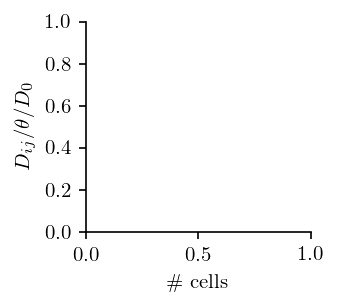

In [9]:
"""
# ANALYZE ACCURACY OF TENSOR ENTRIES DEPENDENT ON RESOLUTION OF GRID
importlib.reload(pf)

pos1 = [0.1, 0.1, 0.2, 0.7]
pos2 = [0.4, 0.1, 0.2, 0.7]
pos3 = [0.7, 0.1, 0.2, 0.7]

gm = 'box_in_a_box_2d'
fig_1_1 = plt.figure(figsize=(7.5,  2.), dpi=150)
res_1 = []
res_2 = []
y_data_1 = [[],[]]
y_data_2 = [[],[]]
for r in results:

    if r[0] == gm and r[-1]=='pourosity_vs_correction_tensors':
        
        eps_l = r[1] 
        eps_s = r[2]
        res = r[3]
        res_y = r[4]
        res_z = r[5]
        D = r[6]
        P = r[7]
        M = r[8]
        pourosity = r[9]
        
        
        num_cells_liquid = (r[3]*r[3]*2*pourosity)
        num_cells = (r[3]*r[3]*2)
        
        #if eps_l == 0.1:
        
        print(pourosity, eps_l, eps_s, P[0,0], M[0,0])
        
        y_data_1[0].append(D[0,0])
        y_data_1[1].append(D[1,1])
        y_data_2[0].append(P[0,0])
        y_data_2[1].append(P[1,1])

print(y_data_1)
        
pf.plot_correction_tensors_vs_number_of_cells(fig_1_1, pos1, pos2,res_1, y_data_1, res_2, y_data_2,
                                              title='Box in a box 2D'+ ' (Pourosity: ' + str(np.round(0,3)) + ')')

plt.show()
"""

[0.97067901 0.9382716  0.90277778 0.86419753 0.82253086 0.77777778
 0.72993827 0.67901235 0.625      0.56790123 0.50771605 0.44444444
 0.37808642 0.30864198 0.23611111 0.16049383 0.08179012]
[0.97067901 0.9382716  0.90277778 0.86419753 0.82253086 0.77777778
 0.72993827 0.67901235 0.625      0.56790123 0.50771605 0.44444444
 0.37808642 0.30864198 0.23611111 0.16049383 0.08179012]
[0.99731897 0.99051875 0.98018368 0.96664828 0.95019176 0.93113765
 0.90988598 0.88694593 0.86291434 0.83841644 0.81403998 0.79024691
 0.76731872 0.74536103 0.72436469 0.70428407 0.68503851]
[0.62943981 0.58830114 0.55085277 0.51599497 0.48332367 0.45266597
 0.42394508 0.39713866 0.37225025 0.34926382 0.32813878 0.30879542
 0.29110699 0.27491868 0.26007053 0.24640162 0.23366747]


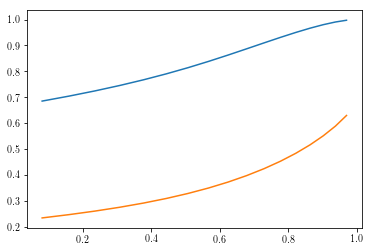

0.5077160493827161 0.4133011602556597 0.8140399752147948
0.5077160493827161 0.16660132435414537 0.3281387786671313


In [41]:
vf_11 = pickle.load(open('./../results/plot_data_vertical_filaments_2d.pcl', 'rb'))
vf_22 = pickle.load(open('./../results/plot_data_vertical_filaments_2d_22.pcl', 'rb'))

spline_vf_11 = interpolate.interp1d(vf_11['pourosities'][0], vf_11['d'][0])
spline_vf_22 = interpolate.interp1d(vf_22['pourosities'][0], vf_22['d'][0])

print(np.array(vf_11['pourosities'][0]))
print(np.array(vf_22['pourosities'][0]))
print(np.array(vf_11['d'][0]) / np.array(vf_11['pourosities'][0]))

print(np.array(vf_22['d'][0]) / np.array(vf_22['pourosities'][0]))

plt.plot(vf_11['pourosities'][0], np.array(vf_11['d'][0]) / np.array(vf_11['pourosities'][0]))
plt.plot(vf_22['pourosities'][0], np.array(vf_22['d'][0]) / np.array(vf_22['pourosities'][0]))
plt.show()

print( vf_11['pourosities'][0][10], np.array(vf_11['d'][0])[10],
(np.array(vf_11['d'][0]) / np.array(vf_11['pourosities'][0]))[10] )
print( vf_22['pourosities'][0][10], np.array(vf_22['d'][0])[10],
(np.array(vf_22['d'][0]) / np.array(vf_22['pourosities'][0]))[10] )

In [42]:
af_3d = pickle.load(open('./../results/plot_data_actin_cytosceleton_3d.pcl', 'rb'))

In [56]:
print(af_3d['pourosities'][0])
print(af_3d['m'][0])
af_3d_diff = interpolate.interp1d(af_3d['pourosities'][0], af_3d['d'][0])
af_3d_p_100 = interpolate.interp1d(af_3d['pourosities'][0], af_3d['p'][0])
af_3d_p_10 = interpolate.interp1d(af_3d['pourosities'][1], af_3d['p'][1])
af_3d_m_100 = interpolate.interp1d(af_3d['pourosities'][0], af_3d['m'][0])
af_3d_m_10 = interpolate.interp1d(af_3d['pourosities'][1], af_3d['m'][1])
print(af_3d_p_100(0.75))
print(af_3d_p_10(0.75))
print(af_3d_m_100(0.75))
print(af_3d_m_10(0.75))


[0.8281249999992497, 0.37500000000052025, 0.04687499999986784, 0.8879999999994066, 0.583999999998045, 0.19199999999963838, 0.023999999999952247, 0.9212962962972615, 0.7037037037073376, 0.11111111111137575, 0.013888888888920495]
[0.7110953131351215, 0.07422675621001608, 6.633287739003403e-06, 0.8032274063164268, 0.40342420638173043, 0.01129279434276676, 5.909216733197263e-06, 0.8591679395332423, 0.5458861477272352, 0.0038622122521610107, 5.363082796727522e-06]
0.6073593873625973
0.6364539747147606
0.6073593255507664
0.6364544160185088
